I worked on project using an online retail dataset, aiming to simulate how data analysis could support executive-level decision-making. The focus was to understand business performance from the perspective of key stakeholders like a CEO or CMO — including revenue trends, operational metrics, and customer behavior.

My goal was to explore the data and generate insights that could help leadership understand what drives revenue, how customers behave over time, and where marketing efforts could be optimized. This included analyzing patterns across time, geography, and customer segments.

I cleaned the dataset by removing return transactions and handling missing values. I then created additional columns such as:

total_revenue (Quantity × UnitPrice)

invoice_mnth (month of invoice)

invoicedayweek (day of the week of purchase)

I performed multiple analyses, including:

Monthly and weekday revenue trends

Country-wise revenue contributions

Customer activity across different months

Patterns in repeat purchase behavior

Demographic-based grouping to simulate customer segmentation

Through this mock project, I was able to simulate how data analysis can support business decisions. For example, I identified which months and customer groups generated the highest revenue, and which days showed strong sales performance. I also analyzed customer retention behavior across months.
These insights would be valuable for leadership to time promotions, understand customer loyalty, and prioritize high-value segments — demonstrating how data can inform strategic decisions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_data' ,engine='python')

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year']=df['InvoiceDate'].dt.year
df1 = df[df['Year'] != 2010]

In [4]:
df1['Year'].unique()

array([2011])

In [5]:
df = df1.copy()

In [6]:
df.head()

InvoiceNo StockCode                Description  Quantity  \
25669     539993     22386    JUMBO BAG PINK POLKADOT        10   
25670     539993     21499         BLUE POLKADOT WRAP        25   
25671     539993     21498        RED RETROSPOT WRAP         25   
25672     539993     22379   RECYCLING BAG RETROSPOT          5   
25673     539993     20718  RED RETROSPOT SHOPPER BAG        10   

              InvoiceDate  UnitPrice  CustomerID         Country  \
25669 2011-01-04 10:00:00       1.95     13313.0  United Kingdom   
25670 2011-01-04 10:00:00       0.42     13313.0  United Kingdom   
25671 2011-01-04 10:00:00       0.42     13313.0  United Kingdom   
25672 2011-01-04 10:00:00       2.10     13313.0  United Kingdom   
25673 2011-01-04 10:00:00       1.25     13313.0  United Kingdom   

       invoice_mnth invoicedayweek  Total_revenue grp_qnty grp_rev  \
25669             1        Tuesday           19.5     1-10  1-1000   
25670             1        Tuesday           10.5    11-50  1-1000   
25671             1        Tuesday           10.5    11-50  1-1000   
25672             1        Tuesday           10.5     1-10  1-1000   
25673             1        Tuesday           12.5     1-10  1-1000   

       InvoiceNo_Alpha InvoiceIdentity  Year  
25669              NaN  Normal_Product  2011  
25670              NaN  Normal_Product  2011  
25671              NaN  Normal_Product  2011  
25672              NaN  Normal_Product  2011  
25673              NaN  Normal_Product  2011

In [7]:
df.shape

(368289, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368289 entries, 25669 to 394215
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        368289 non-null  int64         
 1   StockCode        368289 non-null  object        
 2   Description      368289 non-null  object        
 3   Quantity         368289 non-null  int64         
 4   InvoiceDate      368289 non-null  datetime64[ns]
 5   UnitPrice        368289 non-null  float64       
 6   CustomerID       368289 non-null  float64       
 7   Country          368289 non-null  object        
 8   invoice_mnth     368289 non-null  int64         
 9   invoicedayweek   368289 non-null  object        
 10  Total_revenue    368289 non-null  float64       
 11  grp_qnty         368289 non-null  object        
 12  grp_rev          368289 non-null  object        
 13  InvoiceNo_Alpha  0 non-null       float64       
 14  InvoiceIdentity  3682

In [9]:
data = df.drop(columns = 'InvoiceNo_Alpha')

In [10]:
data.describe()

InvoiceNo       Quantity                    InvoiceDate  \
count  368289.000000  368289.000000                         368289   
mean   562217.649229      12.583849  2011-07-26 00:59:44.545180160   
min    539993.000000       1.000000            2011-01-04 10:00:00   
25%    551817.000000       2.000000            2011-05-04 11:50:00   
50%    563360.000000       6.000000            2011-08-15 15:06:00   
75%    572703.000000      12.000000            2011-10-25 14:35:00   
max    581587.000000   12540.000000            2011-12-09 12:50:00   
std     12057.870996      46.850058                            NaN   

           UnitPrice     CustomerID   invoice_mnth  Total_revenue      Year  
count  368289.000000  368289.000000  368289.000000  368289.000000  368289.0  
mean        2.836088   15285.868215       7.306029      21.218732    2011.0  
min         0.000000   12347.000000       1.000000       0.000000    2011.0  
25%         1.250000   13963.000000       5.000000       4.680000    2011.0  
50%         1.790000   15144.000000       8.000000      11.800000    2011.0  
75%         3.750000   16779.000000      10.000000      19.800000    2011.0  
max       295.000000   18287.000000      12.000000    7144.720000    2011.0  
std         3.779664    1706.481380       3.324063      69.715232       0.0

In [11]:
cat = data.select_dtypes(include = 'object')
num = data.select_dtypes(exclude = 'object')

In [12]:
for col in cat.columns:
    s = data[col].nunique()
    print(f'number of unique values {s} in {col}')
    print("-"*30)

number of unique values 3577 in StockCode
------------------------------
number of unique values 3764 in Description
------------------------------
number of unique values 36 in Country
------------------------------
number of unique values 6 in invoicedayweek
------------------------------
number of unique values 7 in grp_qnty
------------------------------
number of unique values 3 in grp_rev
------------------------------
number of unique values 1 in InvoiceIdentity
------------------------------


In [13]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'grp_qnty', 'grp_rev', 'InvoiceIdentity', 'Year'],
      dtype='object')

In [14]:
data.drop(columns = ['grp_qnty', 'grp_rev'], inplace = True)

In [15]:
df['Quantity_bin'] = pd.cut(df['Quantity'], bins=10)

In [16]:
bins = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 13000]
labels = ['≤1', '1–5', '5–10', '10–50', '50–100', '100–500', '500–1K', '1K–5K', '5K+']
data['Quantity_group'] = pd.cut(data['Quantity'], bins=bins, labels=labels,  include_lowest=True,
    right=True)

In [17]:
data['Total_revenue'].min(),data['Total_revenue'].max()

(0.0, 7144.719999999999)

In [18]:
bins_UP = [0, 1, 5, 10, 50, 100, 200, 300]
labels_UP = ['≤1', '1–5', '5–10', '10–50', '50–100', '100–200', '200+']
data['UniPrice_group'] = pd.cut(
    data['UnitPrice'],
    bins=bins_UP,
    labels=labels_UP,
    include_lowest=True,
    right=True )

In [19]:
bins_TV = [0, 1, 10, 50, 100, 500, 1000, 2000, 5000, 8000]
labels_TV = ['≤1', '1–10', '10–50', '50–100', '100–500', '500–1K', '1K–2K', '2K–5K', '5K+']
data['TotalRevenue_group'] = pd.cut(
    data['Total_revenue'],
    bins=bins_TV,
    labels=labels_TV,
    include_lowest=True,
    right=True
)

In [20]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group'],
      dtype='object')

In [21]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

data['invoice_month_name'] = data['invoice_mnth'].map(month_map)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368289 entries, 25669 to 394215
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           368289 non-null  int64         
 1   StockCode           368289 non-null  object        
 2   Description         368289 non-null  object        
 3   Quantity            368289 non-null  int64         
 4   InvoiceDate         368289 non-null  datetime64[ns]
 5   UnitPrice           368289 non-null  float64       
 6   CustomerID          368289 non-null  float64       
 7   Country             368289 non-null  object        
 8   invoice_mnth        368289 non-null  int64         
 9   invoicedayweek      368289 non-null  object        
 10  Total_revenue       368289 non-null  float64       
 11  InvoiceIdentity     368289 non-null  object        
 12  Year                368289 non-null  int32         
 13  Quantity_group      368289 non

In [23]:
data.describe()

InvoiceNo       Quantity                    InvoiceDate  \
count  368289.000000  368289.000000                         368289   
mean   562217.649229      12.583849  2011-07-26 00:59:44.545180160   
min    539993.000000       1.000000            2011-01-04 10:00:00   
25%    551817.000000       2.000000            2011-05-04 11:50:00   
50%    563360.000000       6.000000            2011-08-15 15:06:00   
75%    572703.000000      12.000000            2011-10-25 14:35:00   
max    581587.000000   12540.000000            2011-12-09 12:50:00   
std     12057.870996      46.850058                            NaN   

           UnitPrice     CustomerID   invoice_mnth  Total_revenue      Year  
count  368289.000000  368289.000000  368289.000000  368289.000000  368289.0  
mean        2.836088   15285.868215       7.306029      21.218732    2011.0  
min         0.000000   12347.000000       1.000000       0.000000    2011.0  
25%         1.250000   13963.000000       5.000000       4.680000    2011.0  
50%         1.790000   15144.000000       8.000000      11.800000    2011.0  
75%         3.750000   16779.000000      10.000000      19.800000    2011.0  
max       295.000000   18287.000000      12.000000    7144.720000    2011.0  
std         3.779664    1706.481380       3.324063      69.715232       0.0

In [24]:
df[df['UnitPrice'] == 0]['CustomerID'].nunique()

20

In [25]:
df[df['UnitPrice'] == 0]['InvoiceNo'].nunique()

22

In [26]:
pd.set_option('display.precision', 10)

In [27]:
data_sales = data[data['UnitPrice'] > 0].copy()
data_promo = data[data['UnitPrice'] == 0]

In [28]:
data_sales['exp'] = data_sales['Quantity'] * data_sales['UnitPrice']

In [29]:
data_sales[['Quantity', 'UnitPrice', 'Total_revenue', 'exp']].head(10)

Quantity  UnitPrice  Total_revenue   exp
25669        10       1.95           19.5  19.5
25670        25       0.42           10.5  10.5
25671        25       0.42           10.5  10.5
25672         5       2.10           10.5  10.5
25673        10       1.25           12.5  12.5
25674        10       1.95           19.5  19.5
25675         6       3.25           19.5  19.5
25676        12       1.45           17.4  17.4
25677         6       2.95           17.7  17.7
25678         8       1.95           15.6  15.6

In [30]:
data_sales['Quantity'] = data_sales['Quantity'].round(2)
data_sales['UnitPrice'] = data_sales['UnitPrice'].round(2)
data_sales['Total_revenue'] = data_sales['Quantity'] * data_sales['UnitPrice']

In [31]:
data_sales.head()

InvoiceNo StockCode                Description  Quantity  \
25669     539993     22386    JUMBO BAG PINK POLKADOT        10   
25670     539993     21499         BLUE POLKADOT WRAP        25   
25671     539993     21498        RED RETROSPOT WRAP         25   
25672     539993     22379   RECYCLING BAG RETROSPOT          5   
25673     539993     20718  RED RETROSPOT SHOPPER BAG        10   

              InvoiceDate  UnitPrice  CustomerID         Country  \
25669 2011-01-04 10:00:00       1.95     13313.0  United Kingdom   
25670 2011-01-04 10:00:00       0.42     13313.0  United Kingdom   
25671 2011-01-04 10:00:00       0.42     13313.0  United Kingdom   
25672 2011-01-04 10:00:00       2.10     13313.0  United Kingdom   
25673 2011-01-04 10:00:00       1.25     13313.0  United Kingdom   

       invoice_mnth invoicedayweek  Total_revenue InvoiceIdentity  Year  \
25669             1        Tuesday           19.5  Normal_Product  2011   
25670             1        Tuesday           10.5  Normal_Product  2011   
25671             1        Tuesday           10.5  Normal_Product  2011   
25672             1        Tuesday           10.5  Normal_Product  2011   
25673             1        Tuesday           12.5  Normal_Product  2011   

      Quantity_group UniPrice_group TotalRevenue_group invoice_month_name  \
25669           5–10            1–5              10–50                Jan   
25670          10–50             ≤1              10–50                Jan   
25671          10–50             ≤1              10–50                Jan   
25672            1–5            1–5              10–50                Jan   
25673           5–10            1–5              10–50                Jan   

        exp  
25669  19.5  
25670  10.5  
25671  10.5  
25672  10.5  
25673  12.5

In [32]:
data_sales.describe()

InvoiceNo           Quantity                    InvoiceDate  \
count  368261.0000000000  368261.0000000000                         368261   
mean   562217.5249564847      12.5471798534  2011-07-26 00:58:20.744797952   
min    539993.0000000000       1.0000000000            2011-01-04 10:00:00   
25%    551817.0000000000       2.0000000000            2011-05-04 11:50:00   
50%    563360.0000000000       6.0000000000            2011-08-15 15:06:00   
75%    572703.0000000000      12.0000000000            2011-10-25 14:35:00   
max    581587.0000000000    4800.0000000000            2011-12-09 12:50:00   
std     12057.8234524173      42.0531373962                            NaN   

               UnitPrice         CustomerID       invoice_mnth  \
count  368261.0000000000  368261.0000000000  368261.0000000000   
mean        2.8363034098   15285.9425027358       7.3059949329   
min         0.0400000000   12347.0000000000       1.0000000000   
25%         1.2500000000   13969.0000000000       5.0000000000   
50%         1.7900000000   15144.0000000000       8.0000000000   
75%         3.7500000000   16779.0000000000      10.0000000000   
max       295.0000000000   18287.0000000000      12.0000000000   
std         3.7797272176    1706.4651445787       3.3240444215   

           Total_revenue      Year                exp  
count  368261.0000000000  368261.0  368261.0000000000  
mean       21.1067050000    2011.0      21.1067050000  
min         0.0600000000    2011.0       0.0600000000  
25%         4.6800000000    2011.0       4.6800000000  
50%        11.7000000000    2011.0      11.7000000000  
75%        19.5000000000    2011.0      19.5000000000  
max      7144.7200000000    2011.0    7144.7200000000  
std        69.3239188763       0.0      69.3239188763

In [33]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_sales['invoice_month_name'] = pd.Categorical(
    data_sales['invoice_month_name'],
    categories=month_order,
    ordered=True
)

In [34]:
total_revenue = data['Total_revenue'].sum()
total_orders = data['InvoiceNo'].nunique()
total_cust = data['CustomerID'].nunique()
print(f"Total Revenue: {total_revenue}, Orders: {total_orders}, Total Customers: {total_cust}")

Total Revenue: 7814625.580000002, Orders: 16891, Total Customers: 4205


In [35]:
country_stats = data_sales.groupby('Country').agg({
    'Total_revenue': 'sum',
    'CustomerID': 'nunique'
}).reset_index().sort_values(by = ['Total_revenue','CustomerID'], ascending = False).rename(columns = {'CustomerID':'customer_cnts'})


In [36]:
country_stats

Country     Total_revenue  customer_cnts
34        United Kingdom  6.3710583300e+06           3801
22           Netherlands  2.7420666000e+05              8
10                  EIRE  2.3772872000e+05              3
14               Germany  1.9034377000e+05             93
13                France  1.7381524000e+05             84
0              Australia  1.3633862000e+05              9
31           Switzerland  5.0697830000e+04             21
29                 Spain  5.0167420000e+04             28
3                Belgium  3.5156880000e+04             25
30                Sweden  3.2744610000e+04              8
19                 Japan  2.9508900000e+04              8
23                Norway  2.8505840000e+04             10
25              Portugal  2.4640030000e+04             17
6        Channel Islands  1.9646610000e+04              8
12               Finland  1.7650740000e+04             12
9                Denmark  1.7039190000e+04              9
18                 Italy  1.4726340000e+04             12
7                 Cyprus  1.1271170000e+04              7
28             Singapore  9.1203900000e+03              1
1                Austria  8.5854800000e+03             10
17                Israel  7.2216900000e+03              3
24                Poland  6.6049800000e+03              6
15                Greece  4.4255200000e+03              4
16               Iceland  3.5982100000e+03              1
5                 Canada  3.1154400000e+03              4
35           Unspecified  2.6670700000e+03              4
21                 Malta  2.1380600000e+03              2
33  United Arab Emirates  1.8647800000e+03              2
32                   USA  1.7309200000e+03              2
20               Lebanon  1.6938800000e+03              1
11    European Community  1.1507500000e+03              1
4                 Brazil  1.1436000000e+03              1
26                   RSA  1.0023100000e+03              1
8         Czech Republic  7.8674000000e+02              1
2                Bahrain  5.4840000000e+02              2
27          Saudi Arabia  1.3117000000e+02              1

In [37]:
revenue_threshold = country_stats['Total_revenue'].quantile(0.75)
customer_threshold = country_stats['customer_cnts'].quantile(0.25)

risky = country_stats[
    (country_stats['Total_revenue'] > revenue_threshold) & 
    (country_stats['customer_cnts'] < customer_threshold)
]

In [38]:
country_stats['RiskLevel'] = country_stats.apply(
    lambda row: 'Risky' if (row['Total_revenue'] > 20000  and row['customer_cnts'] < 11) else 'Safe',
    axis=1
)


In [39]:
safe_countries = country_stats[country_stats['RiskLevel'] == 'Safe']

When i try to find which country have the most contribution in revenue that i found a one thing that is some of countries are with very less customers but having huge revenue that means in that country some customers are HIGH VALUE customers.Then i split the data into two parts SAFE and RISKY, SAFE means that country having good customer count with good revenue or low customer count with low revenue, RISKY means low customer count with high revenue. Why i mentioned that countries are RISKY if that one or two stop buying or suddenly disappeared that is a big loss in that country.

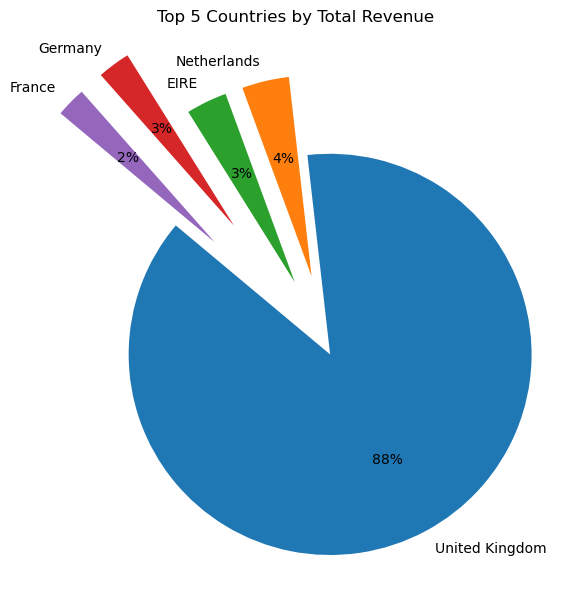

In [40]:
top_5 = country_stats.head(5)

plt.figure(figsize=(6, 6))
plt.pie(
    top_5['Total_revenue'],                        
    labels=top_5['Country'], 
    radius = 0.5,
    autopct = '%.f%%',
    explode = [0,0.2,0.2,0.4,0.4],
    startangle = 140
)
plt.title('Top 5 Countries by Total Revenue')
plt.axis('equal') 
plt.tight_layout()
plt.show()

The above pie chart says United kindgom has big contribution for revenue.

In [41]:
country_stats[country_stats['RiskLevel'] == 'Risky'][['Country', 'customer_cnts', 'Total_revenue']].sort_values(by = 'Total_revenue', ascending = False)

Country  customer_cnts  Total_revenue
22  Netherlands              8      274206.66
10         EIRE              3      237728.72
0     Australia              9      136338.62
30       Sweden              8       32744.61
19        Japan              8       29508.90
23       Norway             10       28505.84

->At the same time some countries Netherlands, EIRE, Australia, Japan, Sweden, Norway these countries are very low in customer counts but very high in Revenue in fact Netherland and EIRE are 3 and 4 percentage of total revenue.


->This might be risky, if one or two customers churn, we lose a big chunk of revenue it’s called revenue concentration risk.


->We having this kind of problem in five countries if 1–2 customers churn in each country, our global revenue dips heavily.

In [42]:
country_stats['avg_revenue_per_customer'] = country_stats['Total_revenue']/country_stats['customer_cnts']

In [43]:
risky_countries_summary = country_stats[country_stats['RiskLevel'] == 'Risky']
risky_countries_summary

Country  Total_revenue  customer_cnts RiskLevel  \
22  Netherlands      274206.66              8     Risky   
10         EIRE      237728.72              3     Risky   
0     Australia      136338.62              9     Risky   
30       Sweden       32744.61              8     Risky   
19        Japan       29508.90              8     Risky   
23       Norway       28505.84             10     Risky   

    avg_revenue_per_customer  
22          34275.8325000000  
10          79242.9066666667  
0           15148.7355555556  
30           4093.0762500000  
19           3688.6125000000  
23           2850.5840000000

In [44]:
country_stats.head()

Country     Total_revenue  customer_cnts RiskLevel  \
34  United Kingdom  6.3710583300e+06           3801      Safe   
22     Netherlands  2.7420666000e+05              8     Risky   
10            EIRE  2.3772872000e+05              3     Risky   
14         Germany  1.9034377000e+05             93      Safe   
13          France  1.7381524000e+05             84      Safe   

    avg_revenue_per_customer  
34           1676.1532044199  
22          34275.8325000000  
10          79242.9066666667  
14           2046.7072043011  
13           2069.2290476190

In [45]:
def get_sum_risky(df, country_name):
    df_country = df[df['Country'] == country_name]
    customer_Revenue = df_country.groupby('CustomerID')['Total_revenue'].sum().reset_index()
    total = customer_Revenue['Total_revenue'].sum()
    customer_Revenue['Percent_Contribution'] = customer_Revenue['Total_revenue'] / total * 100
    return customer_Revenue

In [46]:
def get_rfm(df, country_name):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    snapshot_data = df['InvoiceDate'].max()+pd.Timedelta(days=1)
    rfm_data = df[df['Country'] == country_name]
    rfm = rfm_data.groupby('CustomerID').agg({'InvoiceDate':lambda x: snapshot_data-x.max(),'InvoiceNo': 'nunique',
        'Total_revenue': 'sum'}).reset_index()
    rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
    rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])
    def classify_customer(row):
        if row['F_Score'] in [4, 5] and row['M_Score'] in [4, 5]:
            return 'Loyal and High Value'
        elif row['F_Score'] in [4, 5]:
            return 'Loyal Only'
        elif row['M_Score'] in [4, 5]:
            return 'Bulk Only'
        else:
            return 'Low Engagement'
    rfm['classify_customer'] = rfm.apply(classify_customer, axis = 1)
    return rfm

In [47]:
risky_countries_name = country_stats[country_stats['RiskLevel'] == 'Risky']['Country'].unique().tolist()

In [48]:
risky_countries_data = data_sales[data_sales['Country'].isin(risky_countries_name)]

In [49]:
def get_sum_risky(df):
    customer_Revenue = df.groupby(['CustomerID', 'Country'])['Total_revenue'].sum().reset_index()
    total = customer_Revenue['Total_revenue'].sum()
    customer_Revenue['Percent_Contribution'] = customer_Revenue['Total_revenue'] / total * 100
    return customer_Revenue

In [50]:
import pandas as pd

def get_rfm_risky(df): # Renamed function to reflect refinement
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

    snapshot_data = df['InvoiceDate'].max() + pd.Timedelta(days=1)
    
    rfm = df.groupby(['CustomerID', 'Country']).agg(
        Recency=('InvoiceDate', lambda x: snapshot_data - x.max()),
        Frequency=('InvoiceNo', 'nunique'),
        Monetary=('Total_revenue', 'sum'),
        ActiveMonths=('InvoiceMonth', 'nunique') 
    ).reset_index()
    
    tot = rfm['Monetary'].sum()
    rfm['PCT contribution'] = (rfm['Monetary'] / tot) * 100
    
    rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=[5, 4, 3, 2, 1], duplicates='drop').astype(int)
    rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
    rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
    
    rfm['A_Score'] = pd.qcut(rfm['ActiveMonths'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)

    def classify_customer_refined(row):
        if (row['R_Score'] >= 4 and row['F_Score'] >= 4 and 
            row['M_Score'] >= 4 and row['A_Score'] >= 4):
            return 'True Champions'
        
        elif (row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3):
            return 'Loyal Customers'
        
        elif row['R_Score'] <= 2 and (row['F_Score'] >= 3 or row['M_Score'] >= 3):
            return 'At-Risk Customers'
            
        else:
            return 'Needs Attention'
            
    rfm['classify_customer'] = rfm.apply(classify_customer_refined, axis=1)
    
    return rfm


In [51]:
rfm_risky_countries = get_rfm_risky(risky_countries_data)

In [52]:
rfm_risky_countries['Recency_days'] = rfm_risky_countries['Recency'].dt.days
rfm_risky_countries.head()

CustomerID    Country           Recency  Frequency  Monetary  ActiveMonths  \
0     12350.0     Norway 310 days 18:01:00          1    294.40             1   
1     12352.0     Norway  36 days 19:25:00          6   1265.41             4   
2     12381.0     Norway   4 days 21:18:00          3   1433.46             3   
3     12386.0  Australia 337 days 21:25:00          1    143.00             1   
4     12388.0  Australia  15 days 21:32:00          6   2780.66             6   

   PCT contribution  R_Score  F_Score  M_Score  A_Score classify_customer  \
0      0.0398358207        1        1        2        1   Needs Attention   
1      0.1712250198        3        4        3        4   Loyal Customers   
2      0.1939641831        5        3        3        3   Loyal Customers   
3      0.0193496004        1        1        1        1   Needs Attention   
4      0.3762563624        5        4        4        5    True Champions   

   Recency_days  
0           310  
1            36  
2             4  
3           337  
4            15

In [53]:
rfm_risky_countries.columns

Index(['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary',
       'ActiveMonths', 'PCT contribution', 'R_Score', 'F_Score', 'M_Score',
       'A_Score', 'classify_customer', 'Recency_days'],
      dtype='object')

In [54]:
rfm_risky_countries.groupby('Country').agg({'Recency_days':'median', 'Monetary':'median'}).reset_index()

Country  Recency_days    Monetary
0    Australia          84.0    1582.600
1         EIRE           9.0  116061.260
2        Japan         112.5     790.545
3  Netherlands          35.5     555.945
4       Norway          39.0    1950.155
5       Sweden          31.0     625.355

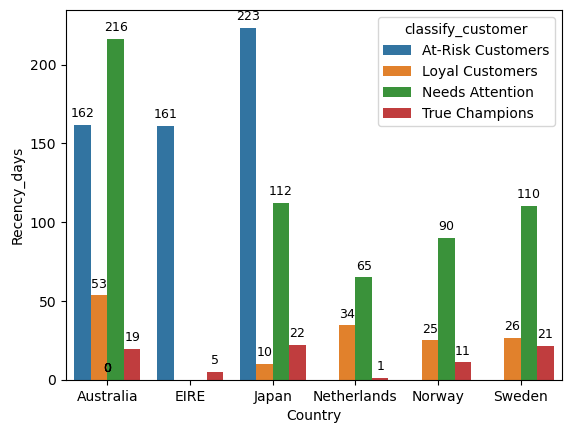

In [55]:
barplot = sns.barplot(data = rfm_risky_countries.groupby(['classify_customer', 'Country']).agg({'Recency_days':'median', 'Monetary':'median'}).reset_index(), x = 'Country', y = 'Recency_days', hue = 'classify_customer')

for p in barplot.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    barplot.annotate(f'{int(height)}', (x, height + 5), ha='center', fontsize=9)

Japan has the highest recency in “Bulk Only” and “Low Engagement” customers (258 and 112 days).

Netherlands, Sweden, and Australia show aging customers with over 100 days of inactivity in "Low Engagement" and "Bulk Only".

“Loyal and High Value” customers show consistently low recency, indicating recent activity.

Countries like Japan, Netherlands, and Sweden are losing touch with many customers. These are the high-risk churn zones.

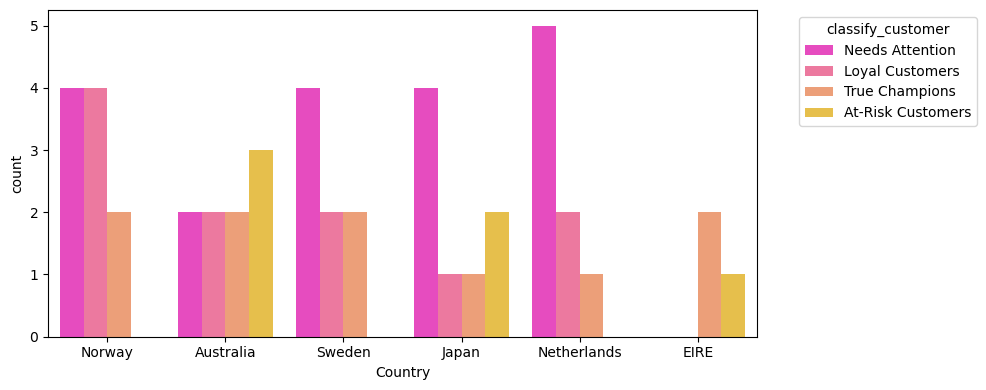

In [56]:
plt.figure(figsize=(10, 4))

sns.countplot(data = rfm_risky_countries, x = 'Country',hue = 'classify_customer', palette = 'spring')

plt.legend(title='classify_customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Low Engagement is the largest segment in all countries.

“Loyal and High Value” customers are underrepresented, suggesting limited VIP retention.

We are overly dependent on a large low-value base. We must convert or reactivate this segment.

Text(0.5, 1.0, 'Which Customers Contribute most')

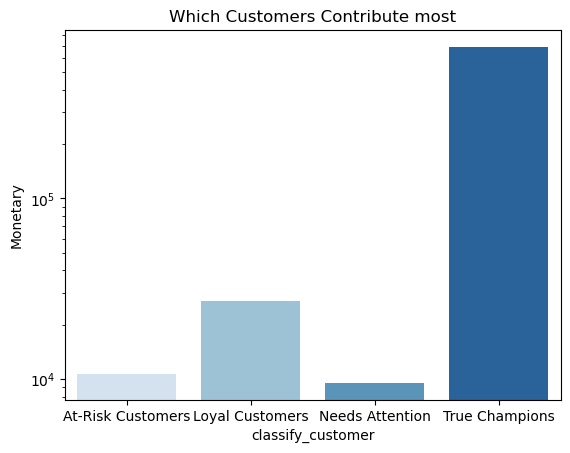

In [57]:
sns.barplot(data = rfm_risky_countries.groupby(['classify_customer'])['Monetary'].sum().reset_index(), x = 'classify_customer', y = 'Monetary', palette = 'Blues')
plt.yscale('log')
plt.title('Which Customers Contribute most')

“Loyal and High Value” customers contribute 10x+ compared to others.

Despite small in number, they are revenue powerhouses.

Focus on retaining and replicating high-value customers is critical for sustainable growth.

A few customers from Netherlands and EIRE contribute up to 35% and 16% of total revenue respectively.

High revenue concentration risk in a few accounts.

These markets are high-value but high-risk. Losing one top customer could severely impact revenue.

Text(0.5, 1.0, 'Customers Contribution by percentage by Country')

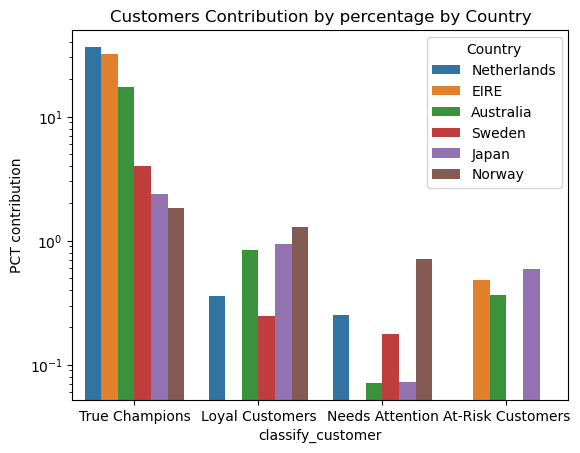

In [58]:
sns.barplot(data = rfm_risky_countries.groupby(['classify_customer', 'Country'])['PCT contribution'].sum().sort_values(ascending = False).reset_index(), 
            x = 'classify_customer', y = 'PCT contribution', hue = 'Country')
plt.yscale('log')
plt.title('Customers Contribution by percentage by Country')

Netherlands and EIRE have the highest contribution from “Loyal and High Value”.

Japan, Sweden, and Norway show lower engagement and contribution.

Growth is coming from few countries; others remain untapped or underperforming.

sns.countplot(data = rfm_risky_countries, x = 'classify_customer', palette = 'Blues')

In [59]:
ex_data = pd.read_excel('Online Retail.xlsx')

In [60]:
returns = ex_data[ex_data['Quantity'] < 0]

In [61]:
risky_return_data = returns[returns['Country'].isin(risky_countries_name)]
risky_return_data.shape

(446, 8)

In [62]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [63]:
rfm_risky_countries.rename(columns={'CustomerId':'CustomerID'}, inplace = True)

In [64]:
risky_des_data = pd.merge(rfm_risky_countries, data_sales, on = ['CustomerID', 'Country'], indicator = True, how = 'left')

In [65]:
print(len(risky_des_data))
print(len(rfm_risky_countries))

11538
46


In [66]:
risky_des_data['_merge'].value_counts()

_merge
both          11538
left_only         0
right_only        0
Name: count, dtype: int64

In [67]:
risky_des_data['CustomerID'].nunique()

46

In [68]:
rfm_risky_countries['CustomerID'].nunique()

46

In [69]:
returns.dropna(inplace = True)

In [70]:
returns.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [71]:
purchase_risky_data = data_sales[data_sales['Country'].isin(risky_countries_name)]

In [72]:
pur_agg = purchase_risky_data.groupby('Country')['Quantity'].sum().reset_index()
ris_agg = risky_return_data.groupby('Country')['Quantity'].sum().abs().reset_index()

In [73]:
return_mer = pd.merge(pur_agg, ris_agg, on = 'Country', suffixes = ('_p', '_r'))
return_mer['return_rate%'] = return_mer['Quantity_r']/ return_mer['Quantity_p']
return_mer

Country  Quantity_p  Quantity_r  return_rate%
0    Australia       82941         556  0.0067035604
1         EIRE      129667        4810  0.0370950203
2        Japan       21841         798  0.0365367886
3  Netherlands      192693         809  0.0041983881
4       Norway       15606          91  0.0058310906
5       Sweden       32037         446  0.0139214034

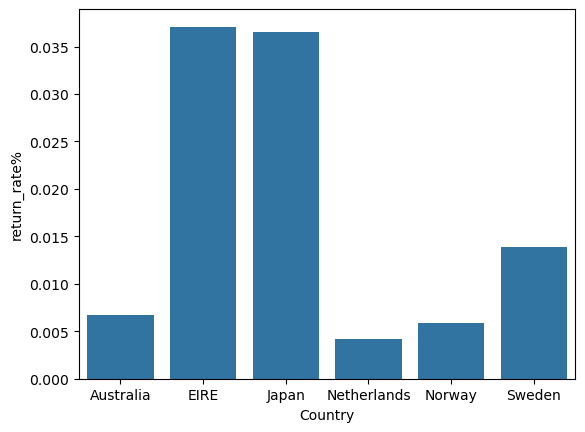

In [74]:
bar = sns.barplot(data = return_mer, x = 'Country', y = 'return_rate%')

for p in barplot.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    barplot.annotate(f'{int(height)}', (x, height + 5), ha='center', fontsize=9)

EIRE and Japan have the highest return rates (>3%).

These countries might have issues in customer satisfaction, product quality, or expectation mismatch.

Monitor return reasons. These returns can kill margins and drive negative word-of-mouth.

###########################################################################################################################

Japan  ->	 High recency + high return rate	Reactivate churned base; Audit return reasons

EIRE  ->	 High return rate, few top contributors	Focus on customer support; Loyalty incentives

Netherlands	-> High value, low base	Expand loyal base; Safeguard top customers

Sweden	-> Low loyalty and high recency	Reactivation campaign + offers

Norway	 -> Balanced but small segment	Nurture loyal customers into “High Value”

Australia  ->	 Healthy loyal & bulk mix	Cross-sell to “Loyal Only” and “Bulk Only”

In [75]:
risky_des_data.columns

Index(['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary',
       'ActiveMonths', 'PCT contribution', 'R_Score', 'F_Score', 'M_Score',
       'A_Score', 'classify_customer', 'Recency_days', 'InvoiceNo',
       'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'invoice_mnth', 'invoicedayweek', 'Total_revenue', 'InvoiceIdentity',
       'Year', 'Quantity_group', 'UniPrice_group', 'TotalRevenue_group',
       'invoice_month_name', 'exp', '_merge'],
      dtype='object')

In [76]:
filt_col_risky_des_data = risky_des_data[['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary',
               'classify_customer', 'Recency_days', 'InvoiceNo', 'StockCode',
               'Description', 'Quantity','InvoiceDate', 'UnitPrice', 'invoice_month_name',
               'invoicedayweek']]

In [77]:
filt_col_risky_des_data.head()

CustomerID Country           Recency  Frequency  Monetary  \
0     12350.0  Norway 310 days 18:01:00          1     294.4   
1     12350.0  Norway 310 days 18:01:00          1     294.4   
2     12350.0  Norway 310 days 18:01:00          1     294.4   
3     12350.0  Norway 310 days 18:01:00          1     294.4   
4     12350.0  Norway 310 days 18:01:00          1     294.4   

  classify_customer  Recency_days  InvoiceNo StockCode  \
0   Needs Attention           310     543037     21908   
1   Needs Attention           310     543037     22412   
2   Needs Attention           310     543037    79066K   
3   Needs Attention           310     543037    79191C   
4   Needs Attention           310     543037     22348   

                       Description  Quantity         InvoiceDate  UnitPrice  \
0    CHOCOLATE THIS WAY METAL SIGN        12 2011-02-02 16:01:00       2.10   
1  METAL SIGN NEIGHBOURHOOD WITCH         12 2011-02-02 16:01:00       2.10   
2                   RETRO MOD TRAY        10 2011-02-02 16:01:00       0.85   
3      RETRO PLASTIC ELEPHANT TRAY        12 2011-02-02 16:01:00       0.85   
4      TEA BAG PLATE RED RETROSPOT        24 2011-02-02 16:01:00       0.85   

  invoice_month_name invoicedayweek  
0                Feb      Wednesday  
1                Feb      Wednesday  
2                Feb      Wednesday  
3                Feb      Wednesday  
4                Feb      Wednesday

In [78]:
crs_risky_ret = pd.crosstab(risky_return_data['Description'], risky_return_data['Country']).reset_index()

In [79]:
crs_risky_ret['tot_ret'] = crs_risky_ret.drop(columns = 'Description', axis= 1).sum(axis = 1)

In [80]:
crs_risky_ret.sort_values('tot_ret', ascending = False, inplace = True)

In [81]:
filt_col_risky_des_data.head()

CustomerID Country           Recency  Frequency  Monetary  \
0     12350.0  Norway 310 days 18:01:00          1     294.4   
1     12350.0  Norway 310 days 18:01:00          1     294.4   
2     12350.0  Norway 310 days 18:01:00          1     294.4   
3     12350.0  Norway 310 days 18:01:00          1     294.4   
4     12350.0  Norway 310 days 18:01:00          1     294.4   

  classify_customer  Recency_days  InvoiceNo StockCode  \
0   Needs Attention           310     543037     21908   
1   Needs Attention           310     543037     22412   
2   Needs Attention           310     543037    79066K   
3   Needs Attention           310     543037    79191C   
4   Needs Attention           310     543037     22348   

                       Description  Quantity         InvoiceDate  UnitPrice  \
0    CHOCOLATE THIS WAY METAL SIGN        12 2011-02-02 16:01:00       2.10   
1  METAL SIGN NEIGHBOURHOOD WITCH         12 2011-02-02 16:01:00       2.10   
2                   RETRO MOD TRAY        10 2011-02-02 16:01:00       0.85   
3      RETRO PLASTIC ELEPHANT TRAY        12 2011-02-02 16:01:00       0.85   
4      TEA BAG PLATE RED RETROSPOT        24 2011-02-02 16:01:00       0.85   

  invoice_month_name invoicedayweek  
0                Feb      Wednesday  
1                Feb      Wednesday  
2                Feb      Wednesday  
3                Feb      Wednesday  
4                Feb      Wednesday

In [82]:
des_cnts_risky = filt_col_risky_des_data.groupby(['classify_customer', 'invoice_month_name', 'Country'])['Description'].nunique().reset_index().sort_values(ascending = False, by = 'Description')

In [83]:
des_cnts_risky.head()

classify_customer invoice_month_name Country  Description
265    True Champions                Sep    EIRE          653
277    True Champions                Nov    EIRE          597
271    True Champions                Oct    EIRE          594
247    True Champions                Jun    EIRE          389
259    True Champions                Aug    EIRE          387

In [84]:
des_cnts_risky[des_cnts_risky['Country'] == 'Netherlands'].groupby('classify_customer')['Description'].sum().reset_index()

classify_customer  Description
0  At-Risk Customers            0
1    Loyal Customers          150
2    Needs Attention          107
3     True Champions         1662

In [85]:
des_cnts_risky = filt_col_risky_des_data.groupby(['Country', 'classify_customer'])['Description'].nunique().reset_index().sort_values(ascending = False, by = 'Description')

In [86]:
cnt = des_cnts_risky['Country'].unique().tolist()

In [87]:
des_cnts_risky[des_cnts_risky['Country'] == 'Netherlands']

Country classify_customer  Description
12  Netherlands    True Champions          703
10  Netherlands   Loyal Customers          122
11  Netherlands   Needs Attention           95

In [88]:
safe_countries_name = country_stats[country_stats['RiskLevel'] == 'Safe']['Country'].unique().tolist()

In [89]:
safe_countries = data_sales[data_sales['Country'].isin(safe_countries_name)]

In [90]:
safe_countries['Country'].nunique()

30

In [91]:
data['Country'].nunique()

36

In [92]:
safe_countries.head()

InvoiceNo StockCode                Description  Quantity  \
25669     539993     22386    JUMBO BAG PINK POLKADOT        10   
25670     539993     21499         BLUE POLKADOT WRAP        25   
25671     539993     21498        RED RETROSPOT WRAP         25   
25672     539993     22379   RECYCLING BAG RETROSPOT          5   
25673     539993     20718  RED RETROSPOT SHOPPER BAG        10   

              InvoiceDate  UnitPrice  CustomerID         Country  \
25669 2011-01-04 10:00:00       1.95     13313.0  United Kingdom   
25670 2011-01-04 10:00:00       0.42     13313.0  United Kingdom   
25671 2011-01-04 10:00:00       0.42     13313.0  United Kingdom   
25672 2011-01-04 10:00:00       2.10     13313.0  United Kingdom   
25673 2011-01-04 10:00:00       1.25     13313.0  United Kingdom   

       invoice_mnth invoicedayweek  Total_revenue InvoiceIdentity  Year  \
25669             1        Tuesday           19.5  Normal_Product  2011   
25670             1        Tuesday           10.5  Normal_Product  2011   
25671             1        Tuesday           10.5  Normal_Product  2011   
25672             1        Tuesday           10.5  Normal_Product  2011   
25673             1        Tuesday           12.5  Normal_Product  2011   

      Quantity_group UniPrice_group TotalRevenue_group invoice_month_name  \
25669           5–10            1–5              10–50                Jan   
25670          10–50             ≤1              10–50                Jan   
25671          10–50             ≤1              10–50                Jan   
25672            1–5            1–5              10–50                Jan   
25673           5–10            1–5              10–50                Jan   

        exp  
25669  19.5  
25670  10.5  
25671  10.5  
25672  10.5  
25673  12.5

In [93]:
safe_countries_data = get_rfm_risky(safe_countries)

In [94]:
safe_countries_data['Recency_days'] = safe_countries_data['Recency'].dt.days
safe_countries_data.head()

CustomerID  Country           Recency  Frequency  Monetary  ActiveMonths  \
0     12347.0  Iceland   2 days 20:58:00          6   3598.21             6   
1     12348.0  Finland  75 days 23:37:00          3    784.44             3   
2     12349.0    Italy  19 days 02:59:00          1   1457.55             1   
3     12353.0  Bahrain 204 days 19:03:00          1     89.00             1   
4     12354.0    Spain 232 days 23:39:00          1   1079.40             1   

   PCT contribution  R_Score  F_Score  M_Score  A_Score  classify_customer  \
0      0.0511564046        5        5        5        5     True Champions   
1      0.0111525259        2        3        3        4  At-Risk Customers   
2      0.0207222529        4        1        4        1    Needs Attention   
3      0.0012653292        1        1        1        1    Needs Attention   
4      0.0153460257        1        1        4        1  At-Risk Customers   

   Recency_days  
0             2  
1            75  
2            19  
3           204  
4           232

In [95]:
safe_countries_data.rename(columns={'CustomerId':'CustomerID'}, inplace = True)
safe_des_data = pd.merge(safe_countries_data, data_sales, on = ['CustomerID', 'Country'], indicator = True, how = 'left')
filt_col_safe_des_data = safe_des_data[['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary',
               'classify_customer', 'Recency_days', 'InvoiceNo', 'StockCode',
               'Description', 'Quantity','InvoiceDate', 'UnitPrice', 'invoice_month_name',
               'invoicedayweek']]

In [96]:
#filt_col_risky_des_data
filt_col_safe_des_data.head()

CustomerID  Country         Recency  Frequency  Monetary classify_customer  \
0     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
1     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
2     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
3     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
4     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   

   Recency_days  InvoiceNo StockCode                          Description  \
0             2     542237    84625A   PINK NEW BAROQUECANDLESTICK CANDLE   
1             2     542237    84625C  BLUE NEW BAROQUE CANDLESTICK CANDLE   
2             2     542237     85116      BLACK CANDELABRA T-LIGHT HOLDER   
3             2     542237     20719               WOODLAND CHARLOTTE BAG   
4             2     542237     22375    AIRLINE BAG VINTAGE JET SET BROWN   

   Quantity         InvoiceDate  UnitPrice invoice_month_name invoicedayweek  
0        24 2011-01-26 14:30:00       0.85                Jan      Wednesday  
1        24 2011-01-26 14:30:00       0.85                Jan      Wednesday  
2         6 2011-01-26 14:30:00       2.10                Jan      Wednesday  
3        10 2011-01-26 14:30:00       0.85                Jan      Wednesday  
4         4 2011-01-26 14:30:00       4.25                Jan      Wednesday

In [97]:
safe_customers = set(safe_countries_data['CustomerID'].unique())
risky_customers = set(rfm_risky_countries['CustomerID'].unique())

common_customers = safe_customers.intersection(risky_customers)
common_customers

{12422.0, 12431.0}

In [98]:
safe_countries_data_cleaned = filt_col_safe_des_data[~filt_col_safe_des_data['CustomerID'].isin(common_customers)]

In [99]:
filt_col_risky_des_data.head()

CustomerID Country           Recency  Frequency  Monetary  \
0     12350.0  Norway 310 days 18:01:00          1     294.4   
1     12350.0  Norway 310 days 18:01:00          1     294.4   
2     12350.0  Norway 310 days 18:01:00          1     294.4   
3     12350.0  Norway 310 days 18:01:00          1     294.4   
4     12350.0  Norway 310 days 18:01:00          1     294.4   

  classify_customer  Recency_days  InvoiceNo StockCode  \
0   Needs Attention           310     543037     21908   
1   Needs Attention           310     543037     22412   
2   Needs Attention           310     543037    79066K   
3   Needs Attention           310     543037    79191C   
4   Needs Attention           310     543037     22348   

                       Description  Quantity         InvoiceDate  UnitPrice  \
0    CHOCOLATE THIS WAY METAL SIGN        12 2011-02-02 16:01:00       2.10   
1  METAL SIGN NEIGHBOURHOOD WITCH         12 2011-02-02 16:01:00       2.10   
2                   RETRO MOD TRAY        10 2011-02-02 16:01:00       0.85   
3      RETRO PLASTIC ELEPHANT TRAY        12 2011-02-02 16:01:00       0.85   
4      TEA BAG PLATE RED RETROSPOT        24 2011-02-02 16:01:00       0.85   

  invoice_month_name invoicedayweek  
0                Feb      Wednesday  
1                Feb      Wednesday  
2                Feb      Wednesday  
3                Feb      Wednesday  
4                Feb      Wednesday

In [100]:
safe_countries_data_cleaned['CustomerID'].nunique()+filt_col_risky_des_data['CustomerID'].nunique()

4204

In [101]:
data_sales['CustomerID'].nunique()

4204

In [102]:
safe_countries_data_cleaned.head()

CustomerID  Country         Recency  Frequency  Monetary classify_customer  \
0     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
1     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
2     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
3     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   
4     12347.0  Iceland 2 days 20:58:00          6   3598.21    True Champions   

   Recency_days  InvoiceNo StockCode                          Description  \
0             2     542237    84625A   PINK NEW BAROQUECANDLESTICK CANDLE   
1             2     542237    84625C  BLUE NEW BAROQUE CANDLESTICK CANDLE   
2             2     542237     85116      BLACK CANDELABRA T-LIGHT HOLDER   
3             2     542237     20719               WOODLAND CHARLOTTE BAG   
4             2     542237     22375    AIRLINE BAG VINTAGE JET SET BROWN   

   Quantity         InvoiceDate  UnitPrice invoice_month_name invoicedayweek  
0        24 2011-01-26 14:30:00       0.85                Jan      Wednesday  
1        24 2011-01-26 14:30:00       0.85                Jan      Wednesday  
2         6 2011-01-26 14:30:00       2.10                Jan      Wednesday  
3        10 2011-01-26 14:30:00       0.85                Jan      Wednesday  
4         4 2011-01-26 14:30:00       4.25                Jan      Wednesday

"Loyal and High Value" Segment Dominates: 
                        United Kingdom, Germany, France, Spain all have ~70% or more of customers in the Loyal and High Value category.
                        These countries are likely to be key markets, as they show a strong loyal and profitable customer base.

"Bulk Only" Dominant Countries:
                        Austria and Denmark have more than 85% of customers in the Bulk Only category.
                        Indicates either business customers or one-time large buyers with no ongoing engagement.

Countries with High Low Engagement %:
                       Finland, Cyprus, and Poland show a large share (25-35%) in the Low Engagement category.
                       Suggests potential for churn or underdeveloped customer relationships.

Very Low "Loyal Only" Presence:
                      In most countries, "Loyal Only" (Green) segment is minimal, indicating that loyal customers often also qualify as high-value.

In [103]:
mon = safe_countries_data_cleaned.groupby(['Country', 'classify_customer'])['Monetary'].sum().reset_index()
mon['Monetary'] = mon['Monetary'].astype(int)
mon.sort_values(by = 'Monetary', inplace = True, ascending = False)

Loyal and High Value Dominates (100%)
Singapore, Iceland, Lithuania: These countries have 100% Loyal and High Value customers but at that same time "Lithuania" has only 35 customers.

Very strong loyalty and profitability in these markets.

Maintain relationship with these customers, possibly business clients or highly engaged premium buyers.

Bulk Only Dominates
USA, UAE, European Community, RSA, Lebanon: Nearly 100% of customers are Bulk Only.

Likely wholesale or corporate buyers.

Focus should be on retention, encouraging repeat purchases, and possibly converting to Loyal segments via loyalty offers or personalization

Low Engagement Dominates
Brazil, Czech Republic, Bahrain, Saudi Arabia: 100% Low Engagement.

At risk of churn. Either the customer base is new, inactive, or disconnected.

Run reactivation campaigns, welcome journeys, or educational content to re-engage them.

Mixed (Low Engagement + Bulk)
Unspecified, Canada, Greece, Malta:

Canada: Mostly Bulk Only with some Low Engagement – possibly new B2B customers or inconsistent purchasers.

Malta: Good spread across Bulk, Low Engagement, and Loyal and High Value – potential to grow.

Strategy: Segment-wise targeted marketing, nurture low engagement, and upsell bulk buyers.

##Important Thing is above all countries are having very low customers also

In [104]:
mon_safe = safe_countries_data_cleaned.groupby(['classify_customer', 'Country'])['Monetary'].sum().reset_index().sort_values(by = 'Monetary', ascending = False)

In [105]:
mon_safe.head()
tot = mon_safe['Monetary'].sum()
mon_safe['PCT_mon'] = (mon_safe['Monetary']/tot)*100
mon_safe.head()

classify_customer         Country          Monetary        PCT_mon
67     True Champions  United Kingdom  2.0906679113e+09  86.5538911836
35    Loyal Customers  United Kingdom  1.4054981887e+08   5.8187786126
21  At-Risk Customers  United Kingdom  5.6811789800e+07   2.3520146101
60     True Champions         Germany  3.0624488820e+07   1.2678573477
59     True Champions          France  2.8023956530e+07   1.1601950128

In [106]:
pd.options.display.float_format = '{:,.0f}'.format

Top 15 Countries are performing well but the bottom countries in safe countries group are mostly low engagement that is not a good sign, Need more focus on those Countries.

In [107]:
safe_countries_data_cleaned['Description'].nunique()

3748

In [108]:
desc_customer = safe_countries_data_cleaned.groupby(['Description', 'classify_customer', 'Country'])['Quantity'].sum().reset_index()

In [109]:
top_buyers = desc_customer.sort_values(['Description', 'Quantity'], ascending=[True, False]).groupby('Description').first().reset_index()

In [110]:
top_buyers_sorted = top_buyers.sort_values(by='Quantity', ascending=False)

In [111]:
main_data = get_rfm_risky(data_sales)

In [112]:
main_data['CustomerID'].nunique()

4204

In [113]:
main_data['Recency_days'] = main_data['Recency'].dt.days
main_data.rename(columns={'CustomerId':'CustomerID'}, inplace = True)
main_des_data = pd.merge(main_data, data_sales, on = ['CustomerID', 'Country'], indicator = True, how = 'left')

In [114]:
main_des_data.columns

Index(['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary',
       'ActiveMonths', 'PCT contribution', 'R_Score', 'F_Score', 'M_Score',
       'A_Score', 'classify_customer', 'Recency_days', 'InvoiceNo',
       'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'invoice_mnth', 'invoicedayweek', 'Total_revenue', 'InvoiceIdentity',
       'Year', 'Quantity_group', 'UniPrice_group', 'TotalRevenue_group',
       'invoice_month_name', 'exp', 'InvoiceMonth', '_merge'],
      dtype='object')

In [115]:
final_main_data = main_des_data[['CustomerID', 'Country', 'Frequency', 'Monetary',
               'classify_customer', 'Recency_days', 'InvoiceNo', 'StockCode', 'Total_revenue',
               'Description', 'Quantity','InvoiceDate', 'UnitPrice', 'invoice_month_name', 'TotalRevenue_group',
               'invoicedayweek']]

In [116]:
final_main_data['classify_customer'].unique()

array(['True Champions', 'At-Risk Customers', 'Needs Attention',
       'Loyal Customers'], dtype=object)

In [117]:
loyal_high_data = final_main_data[final_main_data['classify_customer'] == 'Loyal and High Value']
bulkonly_data = final_main_data[final_main_data['classify_customer'] == 'Bulk Only']
lowengagement_data = final_main_data[final_main_data['classify_customer'] == 'Low Engagement']
loayalonly_main_data = [final_main_data['classify_customer'] == 'Loyal Only']

In [118]:
#safe_countries_data_cleaned filt_col_risky_des_data

In [119]:
safe_countries_data_cleaned.columns

Index(['CustomerID', 'Country', 'Recency', 'Frequency', 'Monetary',
       'classify_customer', 'Recency_days', 'InvoiceNo', 'StockCode',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'invoice_month_name', 'invoicedayweek'],
      dtype='object')

In [120]:
dta = safe_countries_data_cleaned[safe_countries_data_cleaned['Country'] == 'Germany']

In [121]:
#safe_countries_data_cleaned.pivot_table(index='Description', columns='classify_customer', values='InvoiceNo', aggfunc='count')

In [122]:
#filt_col_risky_des_data.pivot_table(index='Description', columns='classify_customer', values='InvoiceNo', aggfunc='count', fill_value = 0).reset_index()

In [123]:
data_sales[data_sales['CustomerID'] == 12347]['Total_revenue'].sum()

3598.2100000000005

In [124]:
cm = main_data[['CustomerID', 'classify_customer', 'Country']]

In [125]:
og = pd.merge(data_sales, cm, on = ['CustomerID', 'Country'], how = 'left', indicator = True)

In [126]:
ris_count = filt_col_risky_des_data['Country'].unique().tolist()

In [127]:
top_countries = og.groupby('Country')['Total_revenue'].sum().reset_index().sort_values(by = 'Total_revenue', ascending = False)

In [128]:
safe_top = top_countries[~(top_countries['Country'].isin(ris_count))].head(5)

In [129]:
risky_top = top_countries[top_countries['Country'].isin(ris_count)]

In [130]:
top_country = pd.concat([safe_top, risky_top])['Country'].tolist()

In [131]:
pre_country_data = og[og['Country'].isin(top_country)]

In [132]:
fre_des = pre_country_data.pivot_table(index = 'Description', columns = 'classify_customer', values = 'InvoiceNo', aggfunc = 'nunique').reset_index()

In [133]:
def get_des(customer_type, palette = 'spring'):
    plt.figure(figsize = (12, 8))
    sns.barplot(data = fre_des[['Description', customer_type]].sort_values(by = customer_type, ascending = False).head(15), x = customer_type, y = 'Description', palette = palette)
    plt.title(f'Most bought description by {customer_type}')

White Hanging Heart T-Light Holder consistently appears as a top seller across all categories, indicating it's a highly popular item.

Regency Cakestand 3 Tier and Assorted Colour Bird Ornament also show strong sales across multiple categories.

Items like Jam Making Set with Jars and Party Bunting perform well in bulk and loyal customer categories but not as much in low engagement.

Lunch Bag Red Retrospot and Natural Slate Heart Chalkboard are less popular across all categories.

This analysis can help in understanding which products are popular among different customer segments and can guide inventory and marketing strategies 
accordingly.

In [134]:
premium_countries = pre_country_data['Country'].unique().tolist()

In [135]:
customer_segmant = pre_country_data['classify_customer'].unique().tolist()

In [136]:
country_segment_analysis = {}

for country in pre_country_data['Country'].unique():
    country_data = pre_country_data[pre_country_data['Country'] == country]
    country_segment_analysis[country] = {}
    for segment in pre_country_data['classify_customer'].unique():
        segment_data = pre_country_data[pre_country_data['classify_customer'] == segment]
        product_counts = segment_data['Description'].value_counts().head()
        country_segment_analysis[country][segment] = product_counts.to_dict()

In [137]:
def create_heatmap_analysis(df, country_col='Country', segment_col='classify_customer', 
                          product_col='Description'):
    
    df_premium = df[df[country_col].isin(premium_countries)].copy()
    
    country_segment_counts = df_premium.groupby([country_col, segment_col]).size().reset_index(name='count')
    
    heatmap_data = country_segment_counts.pivot(index=country_col, columns=segment_col, values='count')
    heatmap_data = heatmap_data.fillna(0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='g', cbar_kws={'label': 'Number of Purchases'})
    plt.title('Purchase Volume by Country and Customer Segment', fontsize=16, fontweight='bold')
    plt.xlabel('Customer Segment', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [138]:
summary = pre_country_data.groupby(['Country', 'classify_customer']).agg({
    'Quantity': 'sum',
    'Total_revenue': 'sum',
    'CustomerID': pd.Series.nunique,
    'InvoiceNo': pd.Series.nunique
}).reset_index()

In [139]:
pre_country_data['Country'].nunique()

11

In [140]:
og['Country_Segment'] = og['Country'] + ' - ' + og['classify_customer']

In [141]:
product_rank = (
    og.groupby(['Country_Segment', 'Description'])['Total_revenue']
    .sum()
    .reset_index()
    .sort_values(['Country_Segment', 'Total_revenue'], ascending=[True, False])
)

In [142]:
top_15_des = product_rank.groupby('Country_Segment').head(15)

In [143]:
binary_matrix = pd.crosstab(
    top_15_des['Country_Segment'],
    top_15_des['Description']
)

In [144]:
weighted_matrix = top_15_des.pivot_table(
    index='Country_Segment',
    columns='Description',
    values='Total_revenue',
    fill_value=0
)

In [145]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = pd.DataFrame(
    cosine_similarity(weighted_matrix),
    index=weighted_matrix.index,
    columns=weighted_matrix.index
)

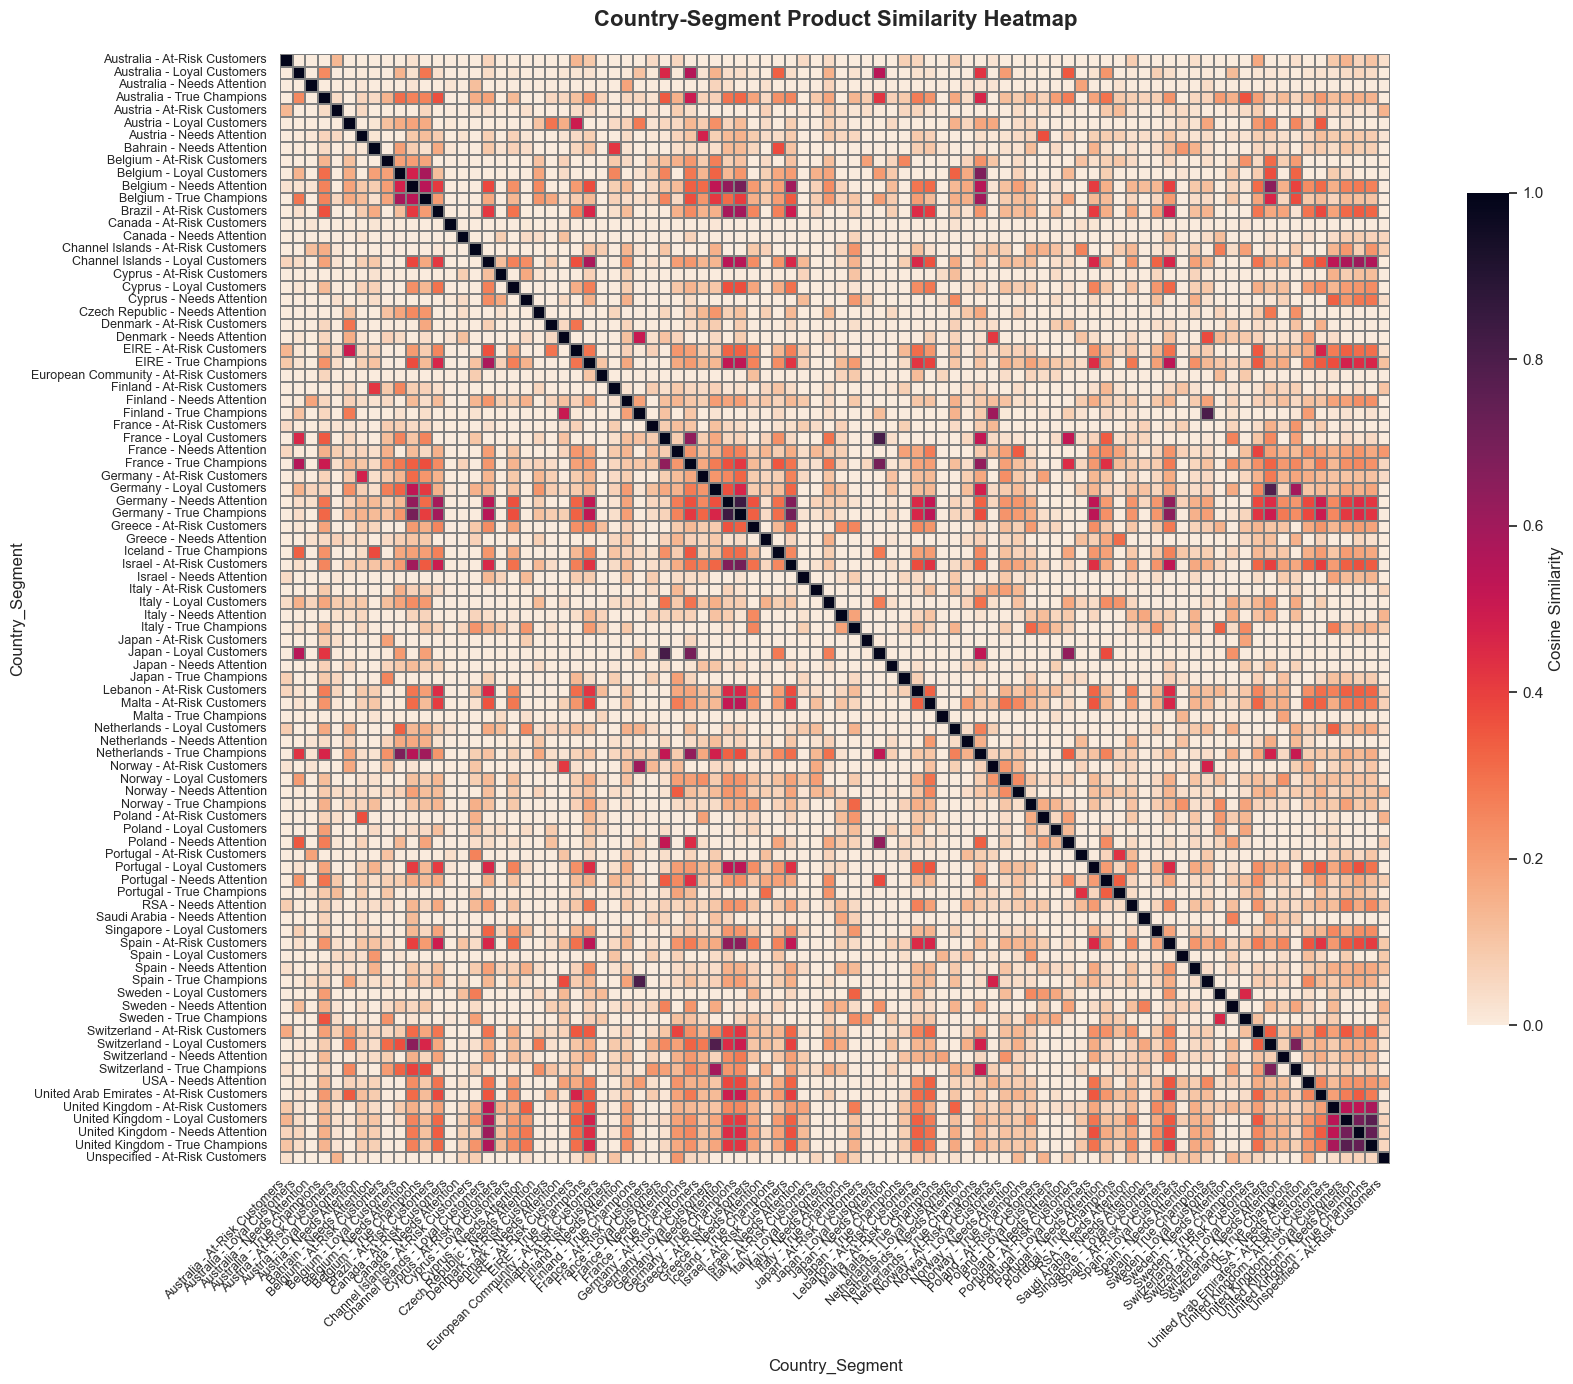

In [146]:

plt.figure(figsize=(18, 14))
sns.set(style="whitegrid")

sns.heatmap(
    similarity, 
    cmap='rocket_r',  
    linewidths=0.3,  
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.75, 'label': 'Cosine Similarity'},
    xticklabels=True,
    yticklabels=True
)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)

# Title and layout
plt.title('Country-Segment Product Similarity Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

plt.show()


Cluster A – Loyal & High Value Buyers (Very Similar Patterns)

Belgium – Loyal and High Value

Singapore – Loyal and High Value

Spain – Loyal and High Value

Norway – Loyal and High Value

Malta – Loyal and High Value

These customers across different regions consistently purchase similar top products → you can target them together with similar VIP campaigns, luxury bundles, or cross-country promotions

Cluster B – Bulk Only Segments (Very Aligned Behavior)

Australia – Bulk Only

United Arab Emirates – Bulk Only

Cyprus – Bulk Only

Channel Islands – Bulk Only

Italy – Bulk Only

Switzerland – Bulk Only

These countries' “bulk buyers” are highly aligned. Perfect candidates for wholesale pricing, B2B packaging offers, and shared logistics models.



In [147]:
def get_monthly_spend_(country_name):
    v = og[og['Country'] == country_name]
    segmants = og['classify_customer'].unique().tolist()
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
    axs = axs.flatten()
    
    for i, col in enumerate(segmants):
        seg_data = v[v['classify_customer'] == col]
        grp_data = seg_data.groupby(['invoice_month_name'])['Total_revenue'].sum().reset_index()
        top_mnths = grp_data.sort_values(by = 'Total_revenue', ascending = False)['invoice_month_name'].head().tolist()
        
        sns.barplot(data = grp_data, 
                    x = 'Total_revenue', y = 'invoice_month_name', ax = axs[i])
        axs[i].set_title(f'{col} revenue by month')
    plt.tight_layout()
    plt.show()

========================================================================================================================================================

In [148]:
top_products = og.groupby('Description')['Total_revenue'].sum().sort_values(ascending=False).head(15).reset_index()

top_countries = og.groupby('Country')['Total_revenue'].sum().sort_values(ascending=False).reset_index()

top_segments = og.groupby('classify_customer')['Total_revenue'].sum().sort_values(ascending=False).reset_index()

monthly = og.groupby('invoice_month_name')['Total_revenue'].sum().sort_values(ascending=False).reset_index()

top_qnt = og.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(15).reset_index()

<Axes: xlabel='Quantity', ylabel='Description'>

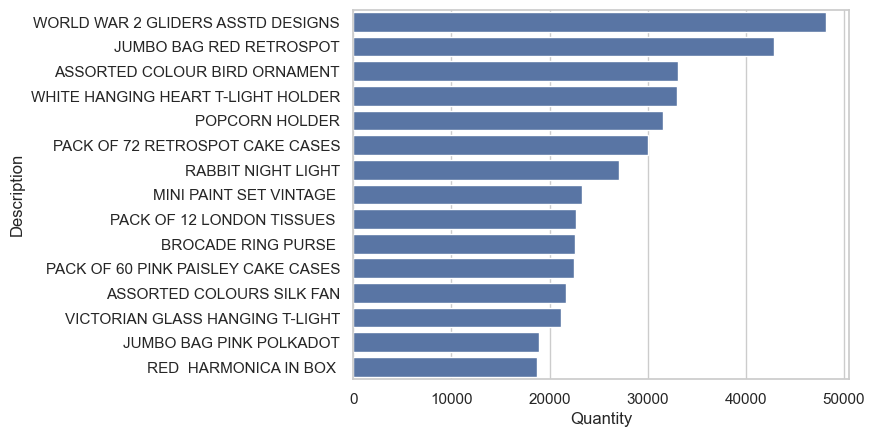

In [149]:
sns.barplot(data = top_qnt, y = 'Description', x = 'Quantity')

<Axes: xlabel='Total_revenue', ylabel='Description'>

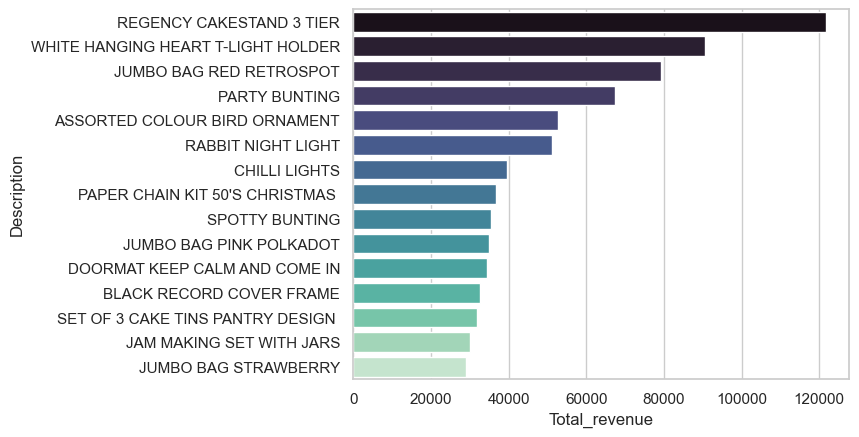

In [150]:
sns.barplot(data = top_products, x = 'Total_revenue', y = 'Description', palette = 'mako')

<Axes: xlabel='classify_customer', ylabel='Total_revenue'>

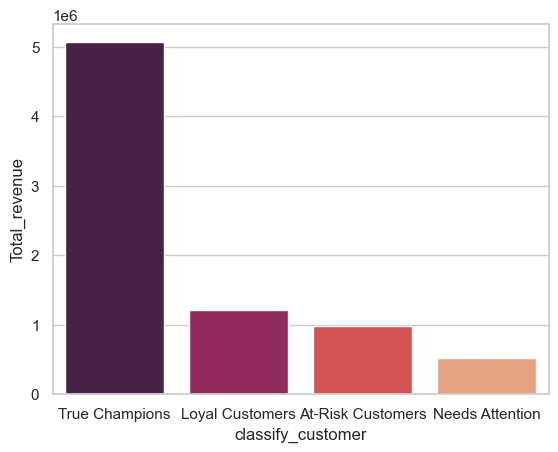

In [151]:
sns.barplot(data = top_segments, x = 'classify_customer', y = 'Total_revenue', palette = 'rocket')

<Axes: xlabel='invoice_month_name', ylabel='Total_revenue'>

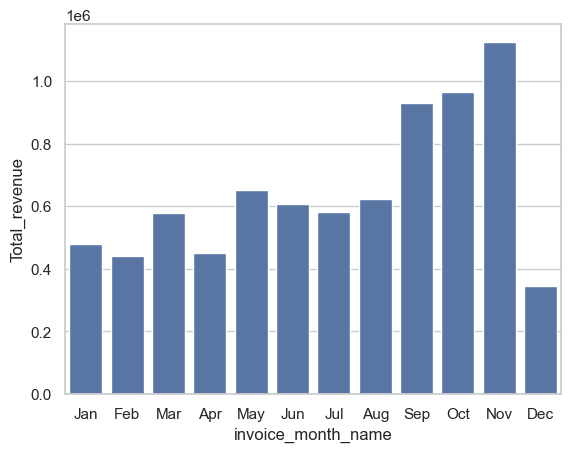

In [152]:
sns.barplot(data = monthly, x = 'invoice_month_name', y = 'Total_revenue')

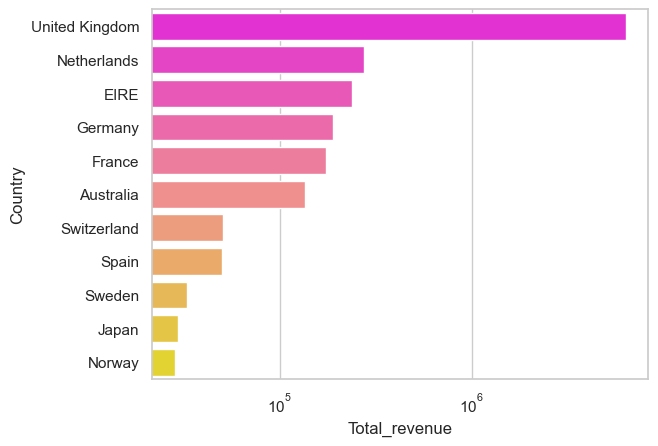

In [153]:
sns.barplot(data = og[og['Country'].isin(premium_countries)].groupby('Country')['Total_revenue'].sum().sort_values(ascending = False).reset_index(), 
        x = 'Total_revenue', y = 'Country', palette = 'spring')
plt.xscale('log')

In [154]:
og.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name', 'exp',
       'InvoiceMonth', 'classify_customer', '_merge', 'Country_Segment'],
      dtype='object')

In [155]:
uk = og[og['Country'] == 'United Kingdom']

In [156]:
og[og['Country'] == 'United Kingdom'].groupby('CustomerID')['Total_revenue'].sum().reset_index().sort_values(by = 'Total_revenue', ascending = False).head()

CustomerID  Total_revenue
3669      18,102        231,823
3225      17,450        190,591
3265      17,511         79,704
2692      16,684         63,388
606       13,694         61,020

In [157]:
og['Country'].nunique()

36

In [158]:
def country_overall(country_name):

    print(country_name)
    
    mn_data = og[og['Country'] == country_name]
    
    sales_by_month = mn_data.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()
    
    hvc = mn_data.groupby('CustomerID')['Total_revenue'].sum().reset_index().sort_values(ascending = False, by = 'Total_revenue').head()
    
    top_des = mn_data.groupby('Description')['Total_revenue'].sum().sort_values(ascending = False).reset_index().head(15)
    
    seg = mn_data.groupby('classify_customer').size().reset_index()
    
    seg_rev = mn_data.groupby('classify_customer')['Total_revenue'].sum().reset_index()

    top_qn = mn_data.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(15).reset_index()
    
    plt.figure(figsize=(10, 8))
    
    sns.barplot(data = sales_by_month, x = 'invoice_month_name', y = 'Total_revenue')
    plt.show()
    sns.barplot(data = hvc, x = 'CustomerID', y = 'Total_revenue' , order = hvc['CustomerID'])
    plt.show()
    sns.countplot(data = mn_data, x = 'classify_customer')
    plt.show()
    sns.barplot(data = seg_rev, x = 'classify_customer', y = 'Total_revenue')
    plt.show()
    sns.barplot(data = top_des, x = 'Total_revenue', y = 'Description')
    plt.show()
    sns.barplot(data = top_qn, y = 'Description', x = 'Quantity')
    plt.show()
    print(top_des)

In [159]:
def month_analysis1(country_name):
    mn_data = og[og['Country'] == country_name]
    months = mn_data['invoice_month_name'].unique().tolist()
    heat = final_main_data[final_main_data['Country'] == country_name]
    fig, axs = plt.subplots(nrows=len(months), ncols=2, figsize=(16, 5 * len(months)))

    for i, val in enumerate(months):
        per_month = mn_data[mn_data['invoice_month_name'] == val]

        grp = (
            per_month.groupby('Description')['Total_revenue']
            .sum()
            .reset_index()
            .sort_values(by='Total_revenue', ascending=False)
            .head(15)
        )
        
        heat_data = heat[heat['invoice_month_name'] == val]
        heat_map = heat_data[['Frequency', 'Monetary','Recency_days', 'Total_revenue',
                'Quantity', 'UnitPrice']].corr()
        print(val)
        print(grp)

In [160]:
def segment_des(country_name):
    mn_data = og[og['Country'] == country_name]
    segments = mn_data['classify_customer'].unique().tolist()

    for i, col in enumerate(segments):
        seg_data = mn_data[mn_data['classify_customer'] == col]

        des_data = seg_data.groupby('Description')['Total_revenue'].sum().reset_index().sort_values(by='Total_revenue', ascending=False).head(15)
        des_fre = seg_data.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(15)

        fig, axs = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f"Top Products for '{col}' Segment in {country_name}", fontsize=14)

        sns.barplot(data=des_data, x='Total_revenue', y='Description', ax=axs[0])
        axs[0].set_title("Top 15 by Revenue")

        sns.barplot(data=des_fre, x='Quantity', y='Description', ax=axs[1])
        axs[1].set_title("Top 15 by Quantity")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

In [161]:
def month_analysis(country_name):
    mn_data = og[og['Country'] == country_name]
    months = mn_data['invoice_month_name'].unique().tolist()
    heat = final_main_data[final_main_data['Country'] == country_name]
    fig, axs = plt.subplots(nrows=len(months), ncols=2, figsize=(16, 5 * len(months)))

    for i, val in enumerate(months):
        per_month = mn_data[mn_data['invoice_month_name'] == val]

        grp = (
            per_month.groupby('Description')['Total_revenue']
            .sum()
            .reset_index()
            .sort_values(by='Total_revenue', ascending=False)
            .head(15)
        )
        
        top_products = grp['Description'].unique()

        top_qn = per_month[per_month['Description'].isin(top_products)]
        top_sales = top_qn['UniPrice_group'].value_counts().reset_index()
        top_sales.columns = ['UnitPrice_range', 'Count']
        top_sales = top_sales.sort_values(by='UnitPrice_range')
        
        sns.barplot(data=grp, x='Total_revenue', y='Description', ax=axs[i][0])
        axs[i][0].set_title(f'{val} - Top 15 Descriptions')
        axs[i][0].set_xlabel('Total Revenue')
        axs[i][0].set_ylabel('Description')

        sns.barplot(data = top_sales, x = 'Count', y = 'UnitPrice_range', ax=axs[i][1])
        axs[i][1].set_title(f'{val} - Unit Price Range')
        axs[i][1].set_xlabel('')
        axs[i][1].set_ylabel('')
        
    plt.tight_layout()
    plt.suptitle(f'{country_name} - Month-wise Description & Segment Analysis', fontsize=18, y=1.02)
    plt.show()

In [162]:
og.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name', 'exp',
       'InvoiceMonth', 'classify_customer', '_merge', 'Country_Segment'],
      dtype='object')

In [163]:
def prev_curr_des_sum(month):
    curr_des = set(uk[uk['invoice_mnth'] == month]['Description'].unique())
    prev_des = set(uk[uk['invoice_mnth'] == month-1]['Description'].unique())
    
    common_desc = curr_des & prev_des
    
    curr_data = uk[(uk['invoice_mnth'] == month) & (uk['Description'].isin(common_desc))]
    prev_data = uk[(uk['invoice_mnth'] == month-1) & (uk['Description'].isin(common_desc))]
    
    curr_sum = oct_data.groupby('Description').agg({
        'UnitPrice': ['nunique', 'min', 'max'],
        'Total_revenue': 'sum',
        'Quantity': 'sum'
    }).reset_index()
    
    prev_sum = nov_data.groupby('Description').agg({
        'UnitPrice': ['nunique', 'min', 'max'],
        'Total_revenue': 'sum',
        'Quantity': 'sum'
    }).reset_index()
    
    final_df = pd.merge(curr_sum, prev_sum, on='Description', how='inner', suffixes=('_curr', '_prev'))
    
    return final_df

In [164]:
result_df = []

for i in range(2, 13):
    curr_mnth = set(uk[uk['invoice_mnth'] == i]['Description'].tolist())
    prev_mnth = set(uk[uk['invoice_mnth'] == i-1]['Description'].tolist())
    
    comm_des = curr_mnth & prev_mnth
    
    curr_mnth_sales = uk[(uk['invoice_mnth'] == i) & (uk['Description'].isin(comm_des))]
    prev_mnth_sales = uk[(uk['invoice_mnth'] == i-1) & (uk['Description'].isin(comm_des))]

    result = {}
    result['month'] = i
    result['curr_sales'] = curr_mnth_sales['Total_revenue'].sum()
    result['prev_sales'] = prev_mnth_sales['Total_revenue'].sum()
    result_df.append(result)
    
final = pd.DataFrame(result_df)



In [165]:
def unitprice_quantity_spend(df, country, segment):
    mn_data = df[(df['Country'] == country) & (df['classify_customer'] == segment)]

    up_counts = mn_data.groupby('invoice_month_name')['UniPrice_group'].value_counts().rename('count').reset_index()
    q_counts = mn_data.groupby('invoice_month_name')['Quantity_group'].value_counts().rename('count').reset_index()

    months = mn_data['invoice_month_name'].drop_duplicates().tolist()
    n_months = len(months)

    fig, axes = plt.subplots(n_months, 2, figsize=(14, 5 * n_months))
    if n_months == 1:
        axes = axes.reshape(1, 2) 
        
    for i, month in enumerate(months):
        sns.barplot(
            data=up_counts[up_counts['invoice_month_name'] == month],
            x='UniPrice_group', y='count', ax=axes[i, 0], palette='Blues_d'
        )
        axes[i, 0].set_title(f"{country} | {segment} | {month} - Unit Price Distribution")
        axes[i, 0].set_xlabel("Unit Price Group")
        axes[i, 0].set_ylabel("Count")

        sns.barplot(
            data=q_counts[q_counts['invoice_month_name'] == month],
            x='Quantity_group', y='count', ax=axes[i, 1], palette='Greens_d'
        )
        axes[i, 1].set_title(f"{country} | {segment} | {month} - Quantity Distribution")
        axes[i, 1].set_xlabel("Quantity Group")
        axes[i, 1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

In [166]:
def product_customer_count(df, country_name):
    products_counts = df[df['Country'] == country_name].groupby('invoice_month_name')['Description'].nunique().sort_values().reset_index()
    customer_count = df[df['Country'] == country_name].groupby('invoice_month_name')['CustomerID'].nunique().sort_values().reset_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  
    
    sns.barplot(data=customer_count, x='invoice_month_name', y='CustomerID', ax=axes[0])
    axes[0].set_title('Customer Count per Month')
    axes[0].tick_params(axis='x', rotation=45)
    
    sns.barplot(data=products_counts, x='invoice_month_name', y='Description', ax=axes[1])
    axes[1].set_title('Top Product Count per Month')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

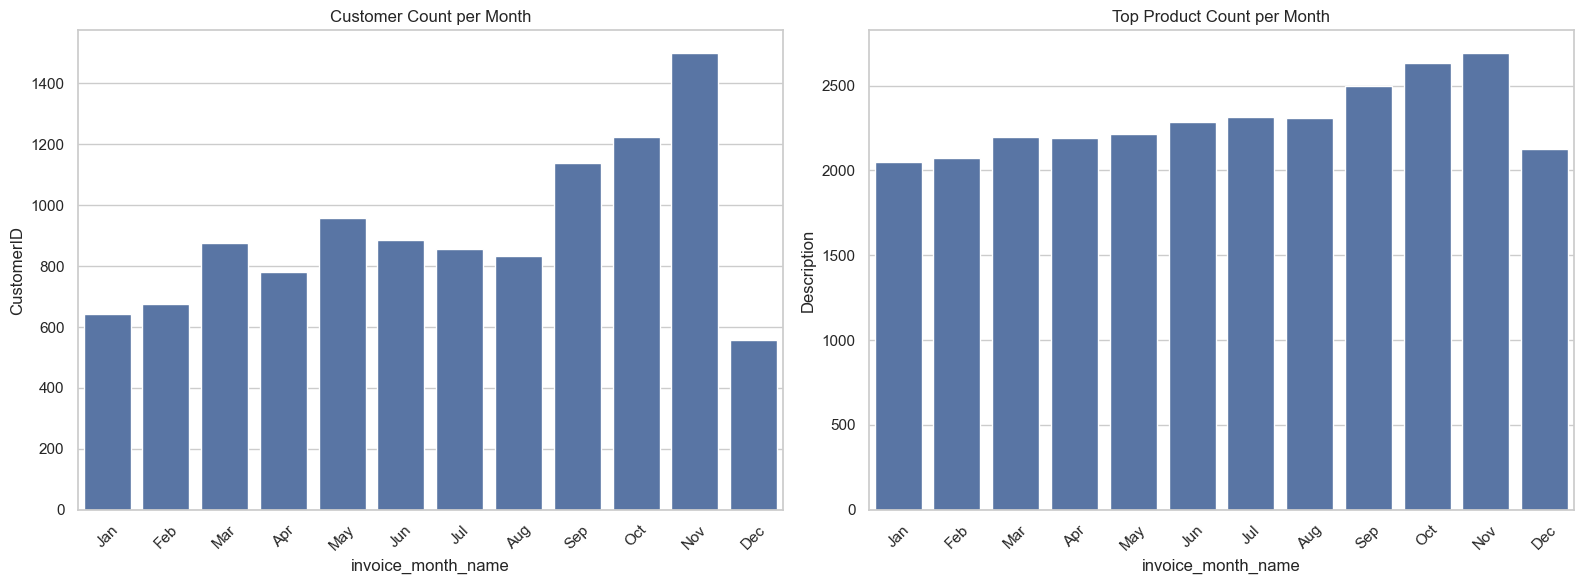

In [167]:
product_customer_count(og, 'United Kingdom')

In [168]:
premium_countries

['United Kingdom',
 'Sweden',
 'France',
 'Australia',
 'Germany',
 'Spain',
 'EIRE',
 'Netherlands',
 'Switzerland',
 'Norway',
 'Japan']

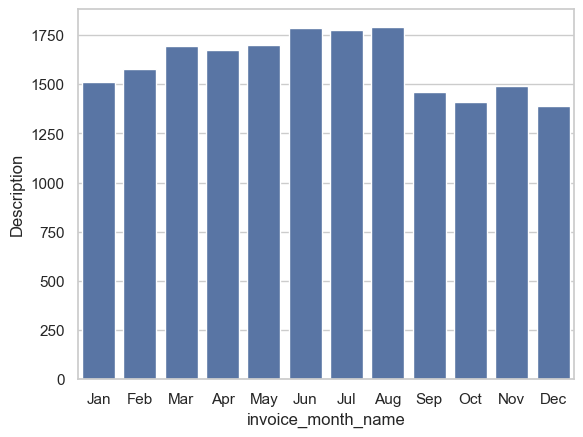

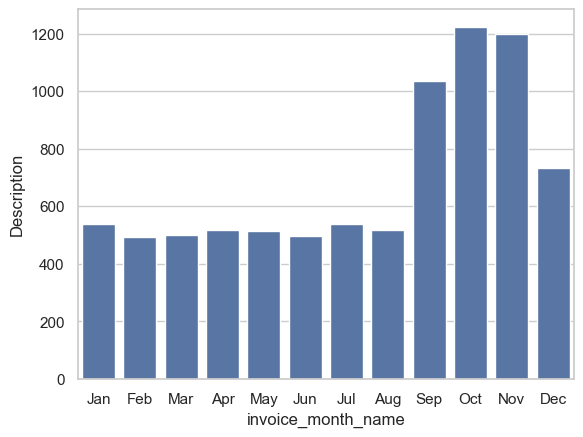

In [169]:
sin = uk.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum', 'Quantity':'sum'}).reset_index().query('UnitPrice == 1')
mul = uk.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum', 'Quantity':'sum'}).reset_index().query('UnitPrice > 1')

sns.barplot(data = sin.groupby('invoice_month_name')['Description'].nunique().reset_index(), x = 'invoice_month_name', y = 'Description')
plt.show()
sns.barplot(data = mul.groupby('invoice_month_name')['Description'].nunique().reset_index(), x = 'invoice_month_name', y = 'Description')
plt.show()

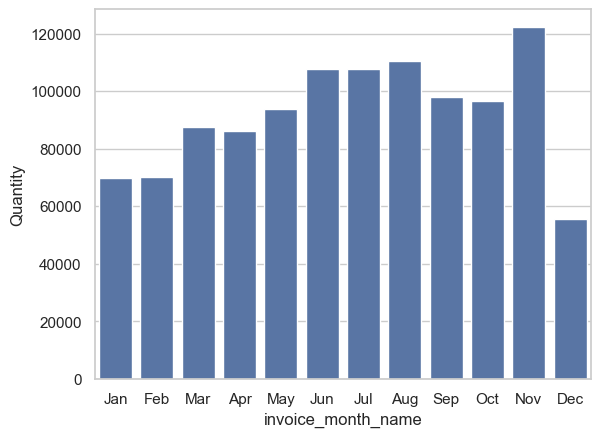

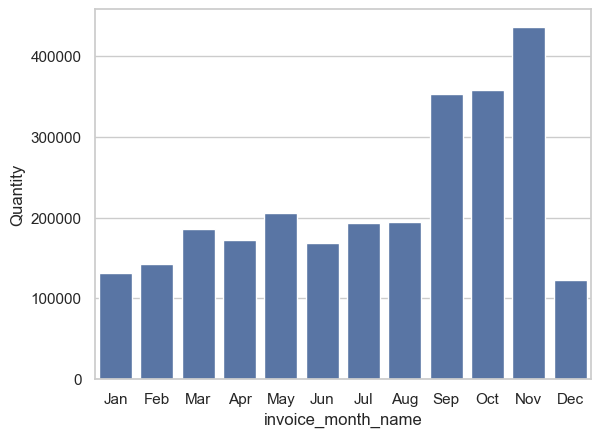

In [170]:
sns.barplot(data = sin.groupby('invoice_month_name')['Quantity'].sum().reset_index(), x = 'invoice_month_name', y = 'Quantity')
plt.show()
sns.barplot(data = mul.groupby('invoice_month_name')['Quantity'].sum().reset_index(), x = 'invoice_month_name', y = 'Quantity')
plt.show()

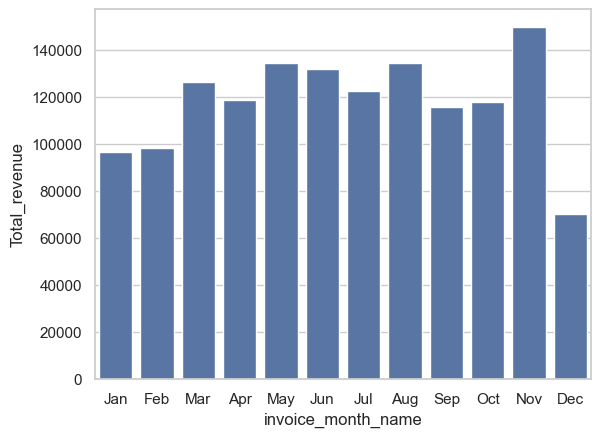

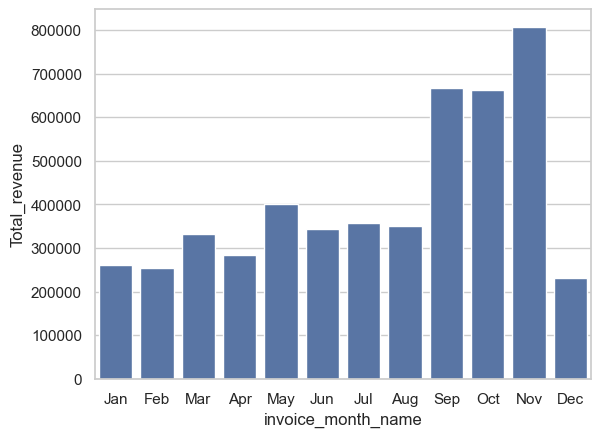

In [171]:
sns.barplot(data = sin.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.show()
sns.barplot(data = mul.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.show()

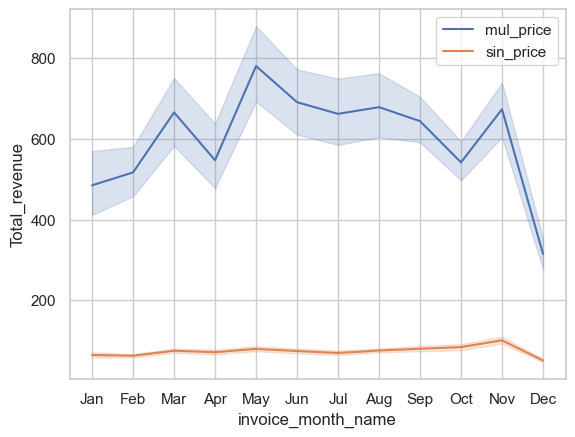

In [172]:
sns.lineplot(data = uk.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice > 1'), x = 'invoice_month_name', y = 'Total_revenue', estimator = 'mean', label = 'mul_price')
sns.lineplot(data = uk.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice == 1'), x = 'invoice_month_name', y = 'Total_revenue', estimator = 'mean', label = 'sin_price')
plt.legend()
plt.show()

United Kingdom


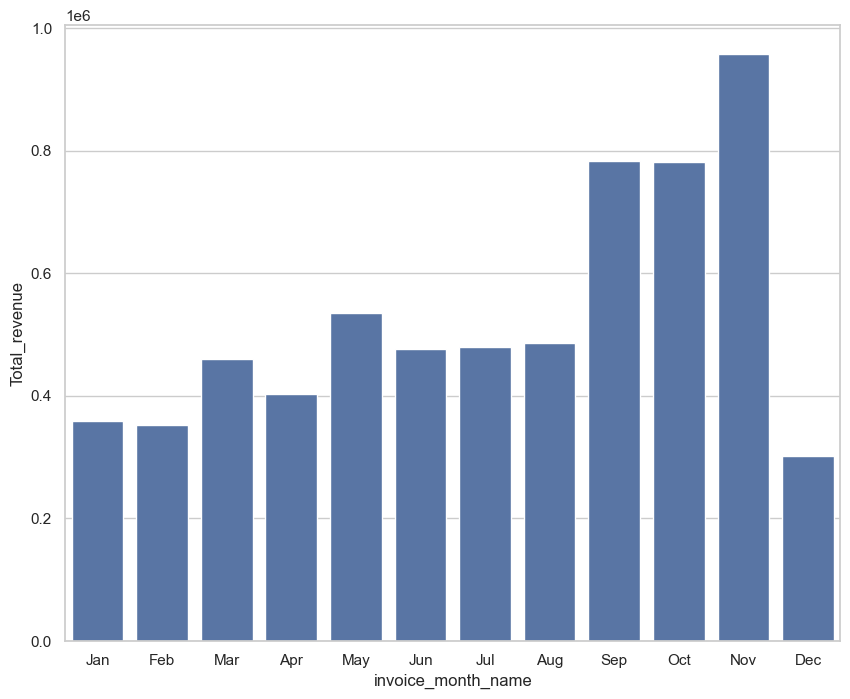

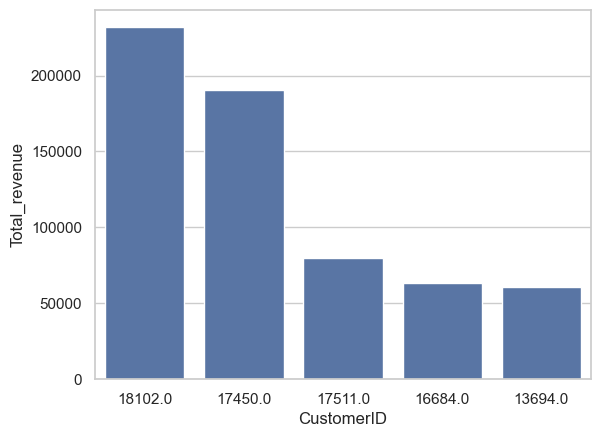

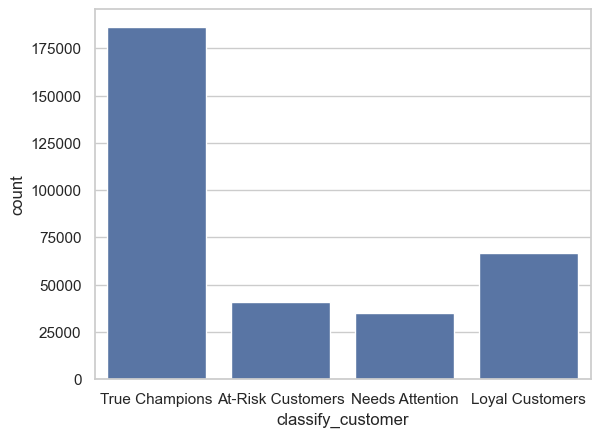

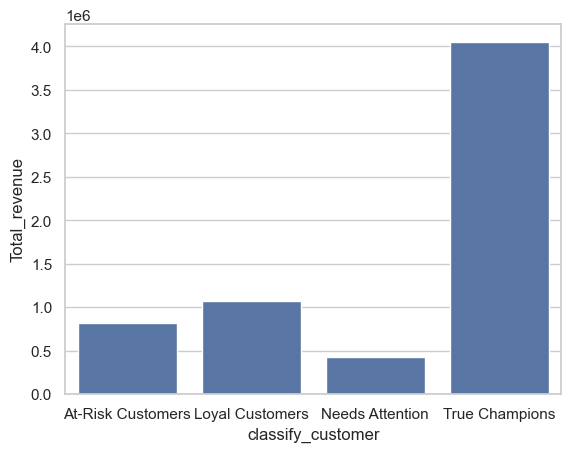

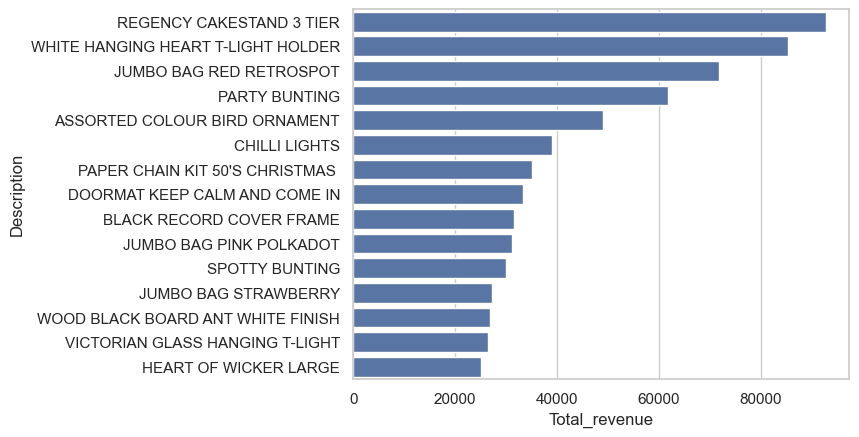

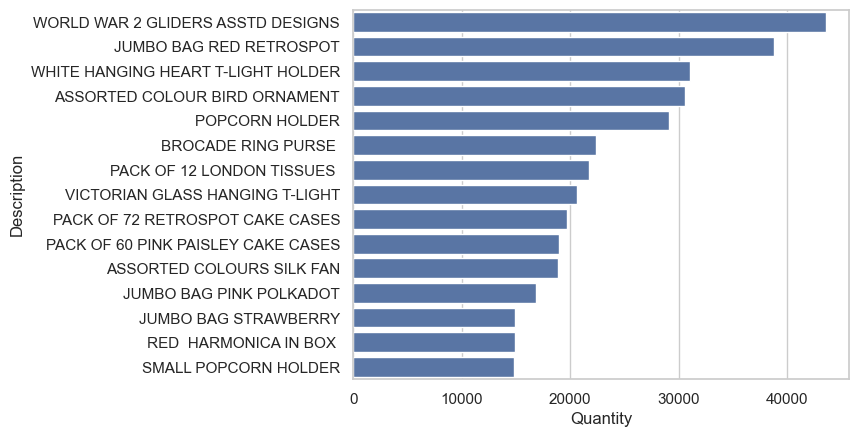

                           Description  Total_revenue
0             REGENCY CAKESTAND 3 TIER         92,702
1   WHITE HANGING HEART T-LIGHT HOLDER         85,323
2              JUMBO BAG RED RETROSPOT         71,724
3                        PARTY BUNTING         61,774
4        ASSORTED COLOUR BIRD ORNAMENT         48,941
5                        CHILLI LIGHTS         38,965
6      PAPER CHAIN KIT 50'S CHRISTMAS          35,141
7        DOORMAT KEEP CALM AND COME IN         33,382
8             BLACK RECORD COVER FRAME         31,587
9              JUMBO BAG PINK POLKADOT         31,197
10                      SPOTTY BUNTING         30,012
11                JUMBO BAG STRAWBERRY         27,297
12   WOOD BLACK BOARD ANT WHITE FINISH         26,841
13     VICTORIAN GLASS HANGING T-LIGHT         26,464
14               HEART OF WICKER LARGE         25,117


In [173]:
country_overall('United Kingdom')

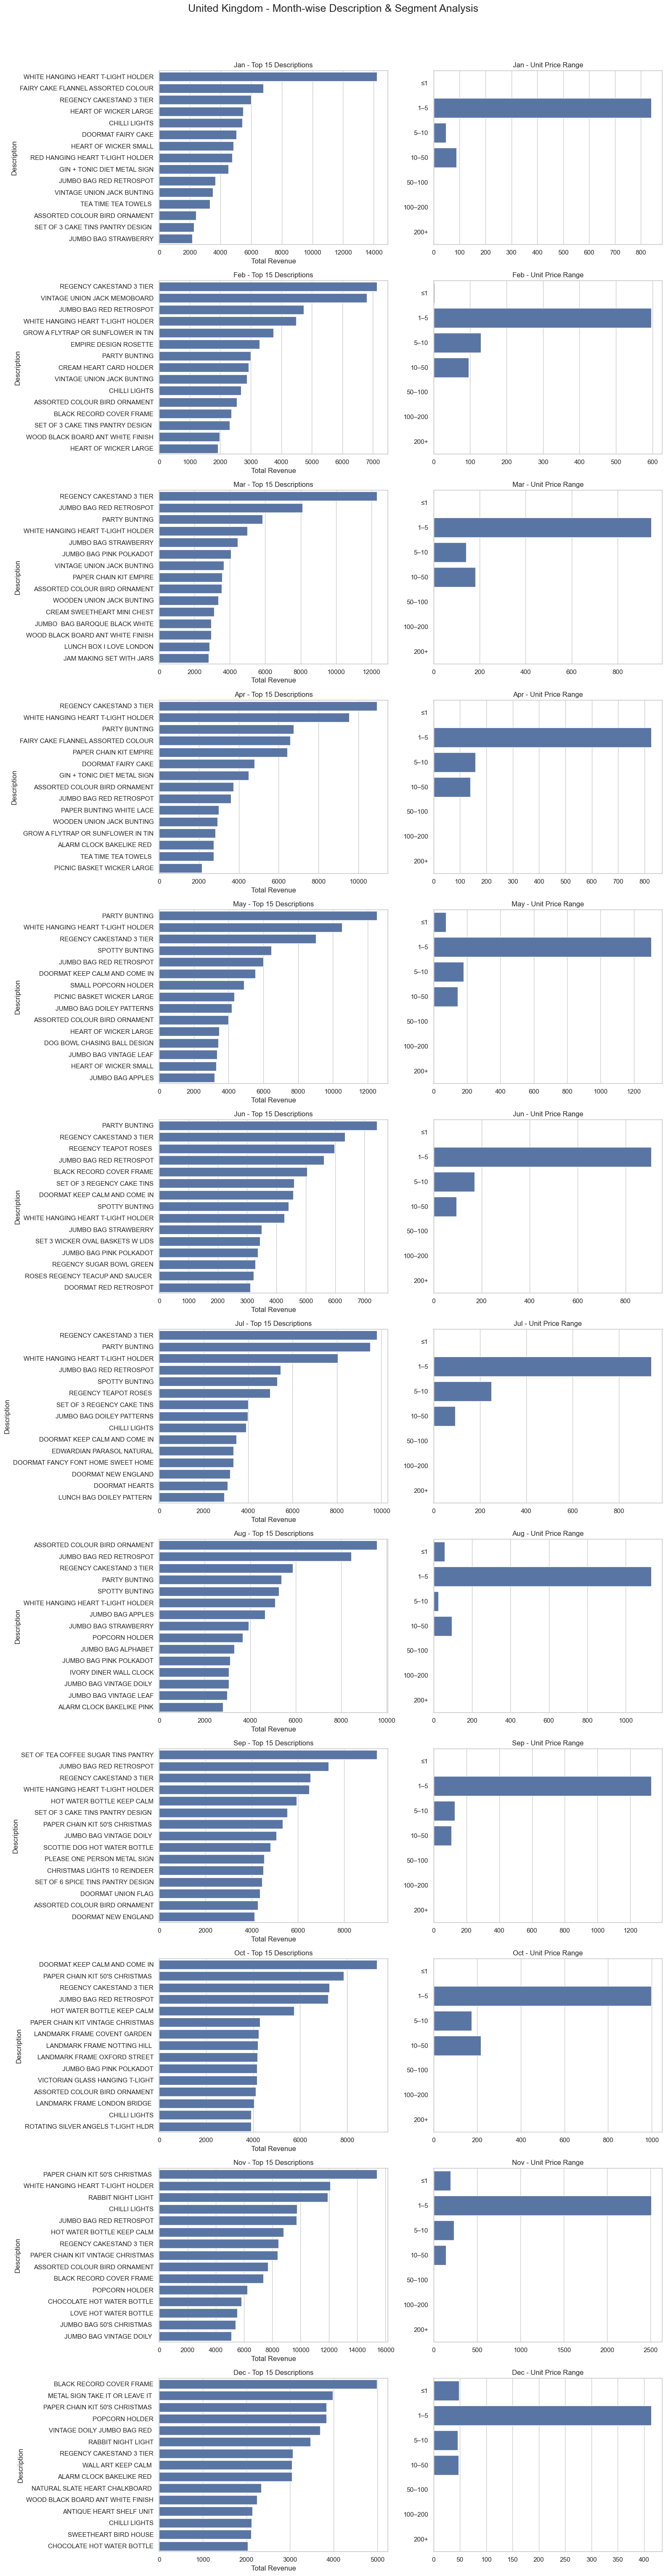

In [174]:
month_analysis('United Kingdom')

In [175]:
og['classify_customer'].unique()

array(['True Champions', 'At-Risk Customers', 'Needs Attention',
       'Loyal Customers'], dtype=object)

In [176]:
#segment_des('United Kingdom')

In [177]:
returns.shape

(8905, 8)

In [178]:
discounts_df = df[df['UnitPrice'] == 0]

In [179]:
discounts_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'grp_qnty', 'grp_rev', 'InvoiceNo_Alpha',
       'InvoiceIdentity', 'Year', 'Quantity_bin'],
      dtype='object')

In [180]:
og['CustomerID'] = og['CustomerID'].astype(str)

In [181]:
og.drop(columns = ['exp', '_merge'],inplace = True)

In [182]:
og.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00          2    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00          0    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00          0    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00          2    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00          1    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday             20  Normal_Product  2011           5–10   
1        Tuesday             10  Normal_Product  2011          10–50   
2        Tuesday             10  Normal_Product  2011          10–50   
3        Tuesday             10  Normal_Product  2011            1–5   
4        Tuesday             12  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment  
0    True Champions  United Kingdom - True Champions  
1    True Champions  United Kingdom - True Champions  
2    True Champions  United Kingdom - True Champions  
3    True Champions  United Kingdom - True Champions  
4    True Champions  United Kingdom - True Champions

In [183]:
customer_data = og.groupby('CustomerID').agg({
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [184]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [185]:
og['CustomerID'] = og['CustomerID'].astype('str')

In [186]:
og['CustomerID'] = og['CustomerID'].astype(str)


In [187]:
def price_range(country_name):
    mn_data = og1[og1['Country'] == country_name]
    mnth_data = mn_data['invoice_month_name'].unique().tolist()
    for i in mnth_data:
        month = mn_data[mn_data['invoice_month_name'] == i]
        qnt = month['UniPrice_group'].value_counts().reset_index()
        sns.barplot(data = qnt, x = 'UniPrice_group', y = 'count')
        plt.title(f'unit price range in {i}')
        plt.show()

In [188]:
def monthly_money_range(df, country_name, month):
    mn = df[df['Country'] == 'United Kingdom']
    mn1 = mn[mn['invoice_month_name'] == month]
    
    segs = mn1['Cluster'].unique().tolist()
    
    n = len(segs)
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(5 * n, 5), sharey=True)
    
    for idx, seg in enumerate(segs):
        filt = mn1[mn1['Cluster'] == seg]
        
        dt = filt.groupby('invoice_month_name')['TotalRevenue_group'].value_counts().sort_values().reset_index(name='count')
        dt_filt = dt[dt['count'] > 0]
        
        sns.barplot(data=dt_filt, x='TotalRevenue_group', y='count', ax=axes[idx])
        axes[idx].set_title(f'{mnth} - {seg}')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.suptitle(f'Unit Price Range by Customer Segment in (UK)', fontsize=16, y=1.05)
    plt.show()

In [189]:
def discount(country_name):
    mn_data = og1[og1['Country'] == country_name]
    price_variation = mn_data.groupby(['invoice_month_name', 'StockCode'])['UnitPrice'].nunique().reset_index()
    pr_vr = price_variation[price_variation['UnitPrice'] > 1]
    fi_price = pr_vr.groupby('invoice_month_name')['StockCode'].nunique().sort_values(ascending = False).reset_index()
    sns.barplot(data = fi_price, x = 'StockCode', y = 'invoice_month_name')
    plt.title(f'No. of discount products in {country_name}')
    plt.show()

In [190]:
def customer_counts(country_name):
    mn_data = og1[og1['Country'] == country_name]
    grp_data = mn_data.groupby(['invoice_month_name', 'classify_customer'])['CustomerID'].nunique().sort_values().reset_index()
    sns.barplot(data = grp_data, x = 'invoice_month_name', y = 'CustomerID', hue = 'classify_customer')
    plt.title(f'customer counts by month and segment in {country_name}')
    plt.xlabel('Month')
    plt.ylabel('customer_counts')
    plt.show()

In [191]:
def ret_rate(og, country_name):
    final = {}
    mn_data = og[og['Country'] == country_name]
    customer_data = mn_data.groupby(['invoice_mnth', 'CustomerID']).agg({
        'Total_revenue' : 'sum',
        'Quantity' : 'sum',
        'InvoiceNo' : 'nunique'
    }).reset_index()
    avg_customer = customer_data.groupby('invoice_mnth').agg({
        'Total_revenue' : ['mean', 'median', 'std', 'count'],
        'Quantity' : ['mean', 'median'],
        'InvoiceNo' : ['mean', 'median']
    }).round(2)  
    
    retention = {}
    for month in range(1, 13):
        curr_cust = set(mn_data[mn_data['invoice_mnth'] == month]['CustomerID'].unique())
        if month > 1:
            prev_cust = set(mn_data[mn_data['invoice_mnth'] == month - 1]['CustomerID'].unique())
            ret_rate = len(curr_cust.intersection(prev_cust)) / float(len(prev_cust)) if prev_cust else 0
        else:
            ret_rate = np.nan
        retention[month] = ret_rate
    
    retention_df = pd.DataFrame(list(retention.items()), columns=['months', 'ret_rate'])
    
    customer_cycle = mn_data.groupby('CustomerID').agg({'invoice_mnth' : ['min', 'nunique']}).reset_index()
    customer_cycle.columns = ['CustomerID', 'first_month', 'active_month']
    main_withcylce = mn_data.merge(customer_cycle, on = 'CustomerID')
    main_withcylce['isnewcus'] = (main_withcylce['invoice_mnth'] == main_withcylce['first_month'])
    cl_cycle = main_withcylce.drop_duplicates(subset = ['CustomerID', 'invoice_month_name']).copy()
    main_withcylce = mn_data.merge(customer_cycle, on = 'CustomerID')
    main_withcylce['isnewcus'] = (main_withcylce['invoice_mnth'] == main_withcylce['first_month'])
    cl_cycle = main_withcylce.drop_duplicates(subset = ['CustomerID', 'invoice_month_name']).copy()
    agg1 = cl_cycle.groupby('invoice_mnth').agg({
        'isnewcus' : ['sum', 'count'],
        'Total_revenue': lambda x: cl_cycle.loc[x.index[cl_cycle.loc[x.index, 'isnewcus']], 'Total_revenue'].sum()
    }).reset_index()
    agg1.columns = ['invoice_mnth', 'new_customer_cnt', 'tot_cust_cnt', 'revenue_by_newcust']
    
    agg = main_withcylce.groupby('invoice_mnth').agg({
        'isnewcus' : ['sum', 'count'],
        'Total_revenue': lambda x: main_withcylce.loc[x.index[main_withcylce.loc[x.index, 'isnewcus']], 'Total_revenue'].sum()
    }).reset_index()
    agg.columns = ['invoice_mnth', 'new_customer_cnt', 'tot_cust_cnt', 'revenue_by_newcust']
    
    merged = pd.merge(agg, agg1, on = 'invoice_mnth', suffixes = ('_uncl','_cl'))
    merged_cl = merged.drop(columns = ['new_customer_cnt_uncl', 'tot_cust_cnt_uncl', 'revenue_by_newcust_cl'], axis = 1)
    merged_cl.columns = ['invoice_mnth', 'revenue_by_newcust', 'new_customer_cnt', 'tot_cust_cnt']
    
    new_order = ['invoice_mnth', 'new_customer_cnt', 'tot_cust_cnt', 'revenue_by_newcust']
    new_vs_returning = merged_cl[new_order]
    
    final['customer_cycle'] = customer_cycle
    final['retention_rate'] = retention_df
    final['new_vs_returning'] = new_vs_returning
    return final

In [192]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [193]:
cust_behaviour = ret_rate(og, 'United Kingdom')

In [194]:
customer_cycle = cust_behaviour['customer_cycle']

In [195]:
retention_rate = cust_behaviour['retention_rate']
new_vs_returning = cust_behaviour['new_vs_returning']

In [196]:
uk_lowactive = og[og['CustomerID'].isin(customer_cycle[customer_cycle['active_month'] == 1]['CustomerID'].tolist())]

In [197]:
customer_mnth = uk_lowactive.groupby('CustomerID')['invoice_month_name'].unique().reset_index()
customer_mnth['active_months'] = customer_mnth['invoice_month_name'].apply(lambda x : sorted(list(x)))

In [198]:
customer_mnth.head()

CustomerID                                 invoice_month_name active_months
0    12821.0  ['May']
Categories (12, object): ['Jan' < 'Feb...         [May]
1    12822.0  ['Sep']
Categories (12, object): ['Jan' < 'Feb...         [Sep]
2    12824.0  ['Oct']
Categories (12, object): ['Jan' < 'Feb...         [Oct]
3    12829.0  ['Jan']
Categories (12, object): ['Jan' < 'Feb...         [Jan]
4    12831.0  ['Mar']
Categories (12, object): ['Jan' < 'Feb...         [Mar]

In [199]:
retention_rate = cust_behaviour['retention_rate']

In [200]:
uk_lowactive1 = og[og['CustomerID'].isin(customer_cycle[customer_cycle['active_month'] < 5]['CustomerID'].tolist())]

In [201]:
customer_mnth1 = uk_lowactive1.groupby('CustomerID')['invoice_month_name'].unique().reset_index()
customer_mnth1['active_months'] = customer_mnth1['invoice_month_name'].apply(lambda x : sorted(list(x)))

In [202]:
def seasonal_product(df, country_name):
    export_data = {}
    mn_data = df[df['Country'] == country_name]
    mn_data['invoice_month_name'] = mn_data['invoice_month_name'].astype('category')
    mn_data['StockCode'] = mn_data['StockCode'].astype('category')

    grp = mn_data.groupby(['invoice_month_name', 'StockCode']).agg({'Total_revenue' : 'sum', 'Quantity' : 'sum', 'CustomerID' : 'nunique'}).reset_index()
    product_seasonality = {}
    
    for stk in grp['StockCode']:
        stk_data = grp[(grp['StockCode'] == stk) & (grp['Total_revenue'] > 0)]
        uni = stk_data['invoice_month_name'].unique()
        cnt = len(uni)
        
        if len(uni) > 1:
            fi_data = stk_data.groupby('invoice_month_name').agg({'Total_revenue' : 'sum', 'CustomerID' : 'nunique'})
            cv = fi_data['Total_revenue'].std()/ fi_data['Total_revenue'].mean() if fi_data['Total_revenue'].mean() > 0 else 0
            peak_month = fi_data.idxmax() if not fi_data.empty else None
            product_seasonality[stk] = {
                'coefficient_variation' : cv,
                'peak_month' : peak_month,
                'Total_revenue' : fi_data['Total_revenue'].sum(),
                'customer_cnt' : fi_data['CustomerID'].sum(),
                'months_active' : cnt
            }
            
    seasonality_df = pd.DataFrame.from_dict(product_seasonality, orient='index')
    seasonality_df = seasonality_df.sort_values('Total_revenue', ascending=False)

    high_seasonality = seasonality_df[seasonality_df['coefficient_variation'] > seasonality_df['coefficient_variation'].quantile(0.8)]
        
    peak_month_distribution = seasonality_df['peak_month'].value_counts().sort_index()
    
    export_data['seasonality_df'] = seasonality_df
    export_data['high_seasonality'] = high_seasonality
    export_data['peak_month_distribution'] = peak_month_distribution

    return export_data

In [203]:
#season_stk_data = seasonal_product(og1, 'United Kingdom')

In [204]:
def seasonal_product_fast(df, country_name):
    export_data = {}
    
    mn_data = df[df['Country'] == country_name].copy()
    mn_data['invoice_month_name'] = mn_data['invoice_month_name'].astype('category')
    mn_data['StockCode'] = mn_data['StockCode'].astype('category')
    
    grp = mn_data.groupby(['StockCode', 'invoice_month_name']).agg({
        'Total_revenue': 'sum',
        'CustomerID': 'nunique'
    }).reset_index()
    
    pivot_rev = grp.pivot(index='StockCode', columns='invoice_month_name', values='Total_revenue').fillna(0)
    pivot_cust = grp.pivot(index='StockCode', columns='invoice_month_name', values='CustomerID').fillna(0)
    
    total_revenue = pivot_rev.sum(axis=1)
    total_customers = pivot_cust.sum(axis=1)
    months_active = (pivot_rev > 0).sum(axis=1)
    
    mean_revenue = pivot_rev.mean(axis=1)
    std_revenue = pivot_rev.std(axis=1)
    cv = std_revenue / mean_revenue.replace(0, 1)  # avoid div by 0
    
    peak_month = pivot_rev.idxmax(axis=1)
    
    seasonality_df = pd.DataFrame({
        'Total_revenue': total_revenue,
        'customer_cnt': total_customers,
        'months_active': months_active,
        'coefficient_variation': cv,
        'peak_month': peak_month
    })
    
    seasonality_df = seasonality_df.sort_values('Total_revenue', ascending=False)
    
    high_seasonality = seasonality_df[seasonality_df['coefficient_variation'] > seasonality_df['coefficient_variation'].quantile(0.8)]
    
    peak_month_distribution = seasonality_df['peak_month'].value_counts().sort_index()

    export_data['seasonality_df'] = seasonality_df.reset_index()
    export_data['high_seasonality'] = high_seasonality.reset_index()
    export_data['peak_month_distribution'] = peak_month_distribution
    
    return export_data


In [205]:
ses = seasonal_product_fast(og, 'United Kingdom')

In [206]:
seasonality_df = ses['seasonality_df']

In [207]:
high_seasonality = ses['high_seasonality']
peak_month_distribution = ses['peak_month_distribution']

In [208]:
def season_dataframe(df, stock_code):
    stk_filt_data = df[df['StockCode'].isin(stock_code)]
    
    results = []
    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    for stk in stk_filt_data['StockCode'].unique():
        stk_df = stk_filt_data[stk_filt_data['StockCode'] == stk].copy()
    
        stk_df['invoice_month_name'] = pd.Categorical(stk_df['invoice_month_name'], categories=month_order, ordered=True)
        
        month_summary = stk_df.groupby('invoice_month_name').agg({
            'Quantity': 'sum',
            'CustomerID': 'nunique',
            'UnitPrice' : 'unique',
            'Total_revenue' : 'sum'
        }).reset_index().sort_values('invoice_month_name')
    
        active_months = month_summary[month_summary['Quantity'] > 0]['invoice_month_name'].tolist()
        total_qty = month_summary[month_summary['Quantity'] > 0]['Quantity'].tolist()
        cust_count = month_summary[month_summary['Quantity'] > 0]['CustomerID'].tolist()
        unit_price = month_summary[month_summary['Quantity'] > 0]['UnitPrice'].tolist()
        total_revenue = month_summary[month_summary['Quantity'] > 0]['Total_revenue'].tolist()
        
        top_days = []
        for m in active_months:
            day_data = stk_df[stk_df['invoice_month_name'] == m]
            top_day = (
                day_data.groupby('invoicedayweek')['Quantity']
                .sum()
                .sort_values(ascending=False)
                .index[0]
            )
            top_days.append(top_day)
    
        buyer_sets = stk_df.groupby('invoice_month_name')['CustomerID'].apply(set)
        retention = {}
        for i in range(1, len(active_months)):
            prev, curr = active_months[i-1], active_months[i]
            retained = len(buyer_sets.get(prev, set()) & buyer_sets.get(curr, set()))
            total = len(buyer_sets.get(prev, set()))
            retention[f"{prev}→{curr}"] = round(retained / total, 2) if total else 0
    
        results.append({
            'StockCode': stk,
            'Description': stk_df['Description'].unique(),
            'Active_Months': active_months,
            'Total_Quantity_per_Month': total_qty,
            'Total_revnue_per_Month' : total_revenue,
            'unit_price' : unit_price,
            'Unique_Customers_per_Month': cust_count,
            'Top_Selling_Day_per_Month': top_days,
            'Retention_Rates': retention
        })
    
    final_df = pd.DataFrame(results)
    return final_df

In [209]:
low_months = ['Jan', 'Feb', 'Apr', 'Jun', 'Jul', 'Jul', 'Aug']

In [210]:
seasonal_des = high_seasonality[(high_seasonality['months_active'] < 4) & (high_seasonality['customer_cnt'] > 49)]

In [211]:
seasonal_des = seasonal_des.drop_duplicates(subset = 'StockCode')

In [212]:
seasonal_des = og[og['StockCode'].isin(seasonal_des['StockCode'].unique().tolist())]

In [213]:
seasonal = set(seasonal_des['Description'].tolist())
on_mn_ac = set(og[og['CustomerID'].isin(customer_cycle[customer_cycle['active_month'] > 4]['CustomerID'].unique().tolist())]['Description'].tolist())

len(seasonal.intersection(on_mn_ac))

26

In [214]:
#customer_cycle, retention_rate, new_vs_returning

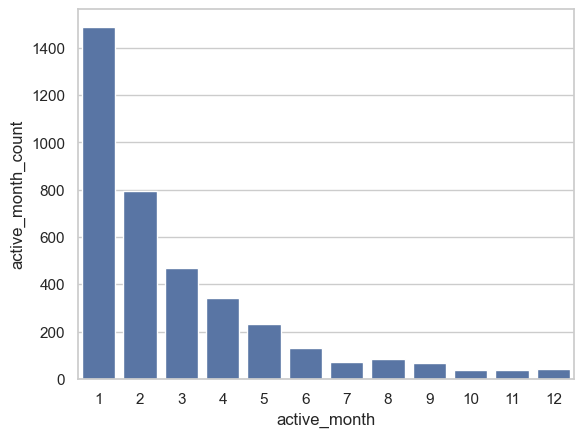

In [215]:
distrubution_act_mnths = customer_cycle['active_month'].value_counts().reset_index().rename(columns = {'count':'active_month_count'})
sns.barplot(data = distrubution_act_mnths, x = 'active_month', y = 'active_month_count')
plt.show()

In [216]:
one_monthactvie = customer_cycle[customer_cycle['active_month'] < 5]['CustomerID'].unique().tolist()
twle_monthactive = customer_cycle[customer_cycle['active_month'] >= 6]['CustomerID'].unique().tolist()

In [217]:
mont1_active = og[og['CustomerID'].isin(one_monthactvie)]
mont12_active = og[og['CustomerID'].isin(twle_monthactive)]

<Axes: xlabel='UniPrice_group', ylabel='count'>

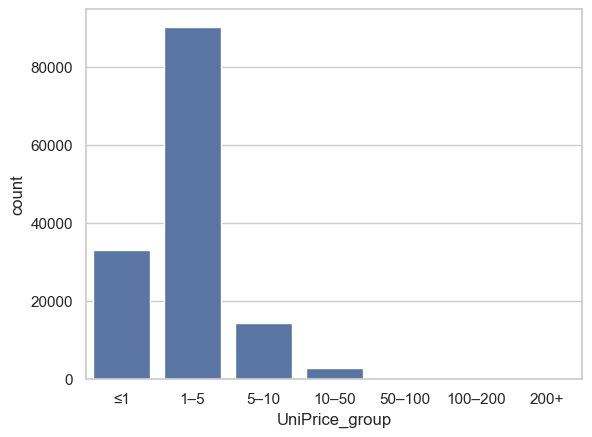

In [218]:

sns.countplot(data = mont12_active, x = 'UniPrice_group')

In [219]:
og.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name',
       'InvoiceMonth', 'classify_customer', 'Country_Segment'],
      dtype='object')

In [220]:
def active_month(df, title):
    mn_data = df.copy()
    top_des = mn_data.groupby(['Description', 'StockCode'])['Total_revenue'].sum().sort_values(ascending = False).reset_index().head(20)
    
    avg_qn_cus = mn_data.groupby('CustomerID')['Quantity'].median().reset_index()
    avg_tr_cus = mn_data.groupby('CustomerID')['Total_revenue'].median().reset_index()
    
    avg_qn_inv = mn_data.groupby('InvoiceNo')['Quantity'].median().reset_index()
    avg_tr_inv = mn_data.groupby('InvoiceNo')['Total_revenue'].median().reset_index()
    
    qn_val_cnts = mn_data['Quantity_group'].value_counts().reset_index()
    qn_val_cnts = qn_val_cnts[qn_val_cnts['count'] > 0]
    
    tr_val_cnts = mn_data['TotalRevenue_group'].value_counts().reset_index()
    tr_val_cnts = tr_val_cnts[tr_val_cnts['count'] > 0]

    month_var = mn_data.drop_duplicates(subset = 'CustomerID')
    month_var = month_var['invoice_month_name'].value_counts()

    fig, axes = plt.subplots(4, 2, figsize=(16, 18))
    axes = axes.flatten()

    # Plot 1: Bottom 20 products by revenue
    sns.barplot(data=top_des, y='Description', x='Total_revenue', ax=axes[0])
    axes[0].set_title("Bottom 20 Products by Total Revenue")

    # Plot 2: Avg quantity per customer
    sns.histplot(avg_qn_cus['Quantity'], kde=True, ax=axes[1])
    axes[1].set_title("Median Quantity per Customer")

    # Plot 3: Avg revenue per customer
    sns.histplot(avg_tr_cus['Total_revenue'], kde=True, ax=axes[2])
    axes[2].set_title("Median Revenue per Customer")

    # Plot 4: Avg quantity per invoice
    sns.histplot(avg_qn_inv['Quantity'], kde=True, ax=axes[3])
    axes[3].set_title("Median Quantity per Invoice")

    # Plot 5: Avg revenue per invoice
    sns.histplot(avg_tr_inv['Total_revenue'], kde=True, ax=axes[4])
    axes[4].set_title("Median Revenue per Invoice")

    # Plot 6: Quantity group distribution
    sns.barplot(data=qn_val_cnts, x='Quantity_group', y='count', ax=axes[5])
    axes[5].set_title("Quantity Group Counts")

    # Plot 7: Revenue group distribution
    sns.barplot(data=tr_val_cnts, x='TotalRevenue_group', y='count', ax=axes[6])
    axes[6].set_title("Revenue Group Counts")

    # Hide unused subplot (axes[7])
    axes[7].axis('off')

    plt.tight_layout()
    plt.suptitle(f'{title}')
    plt.show()

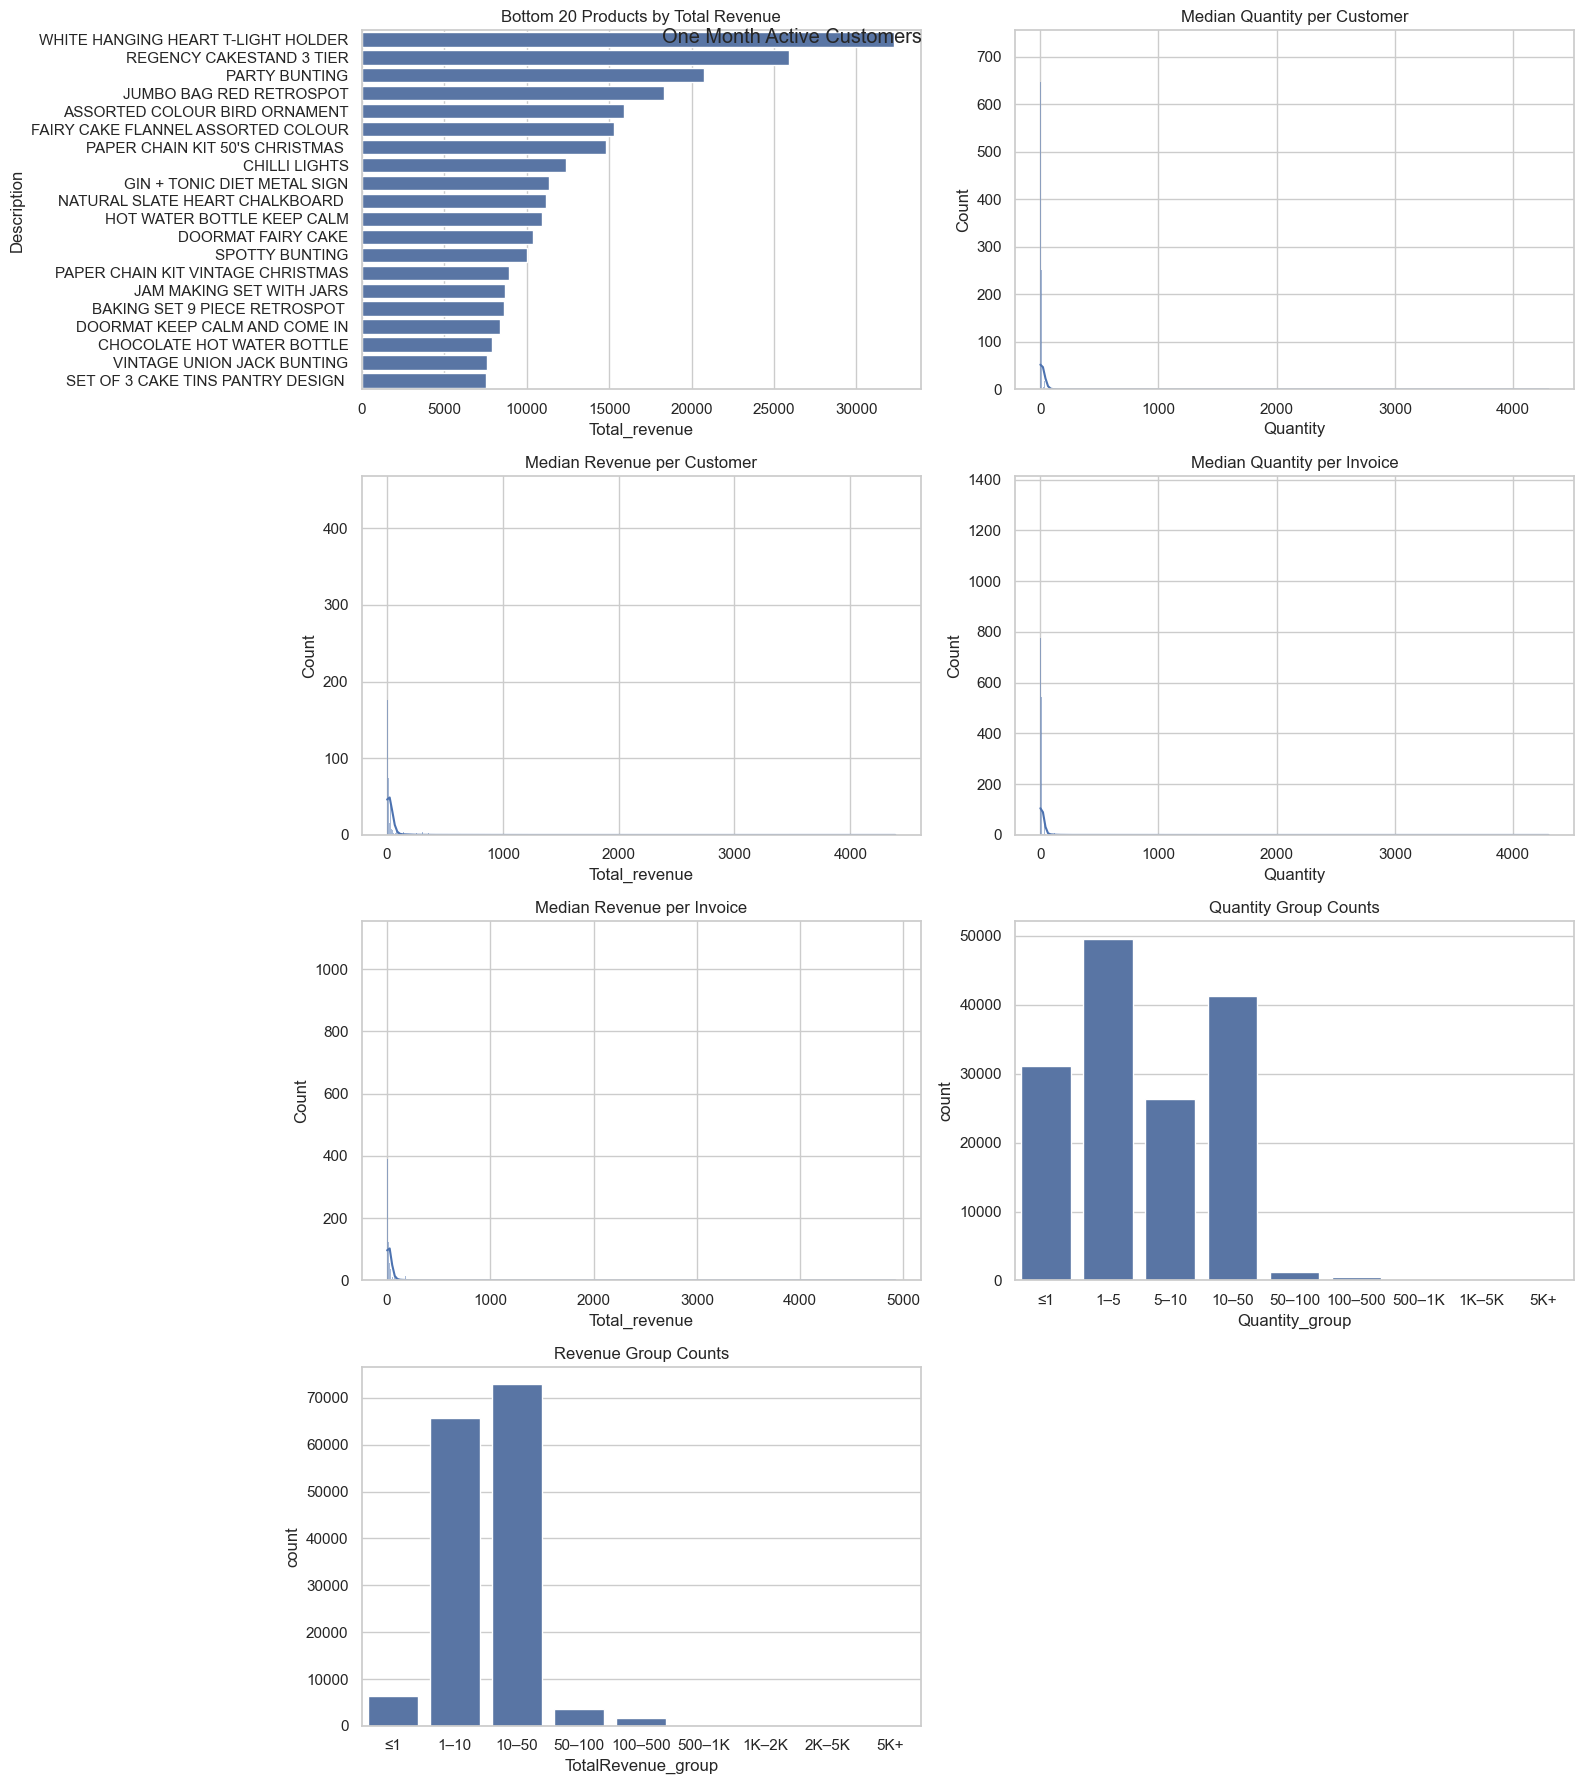

In [221]:
active_month(mont1_active, 'One Month Active Customers')

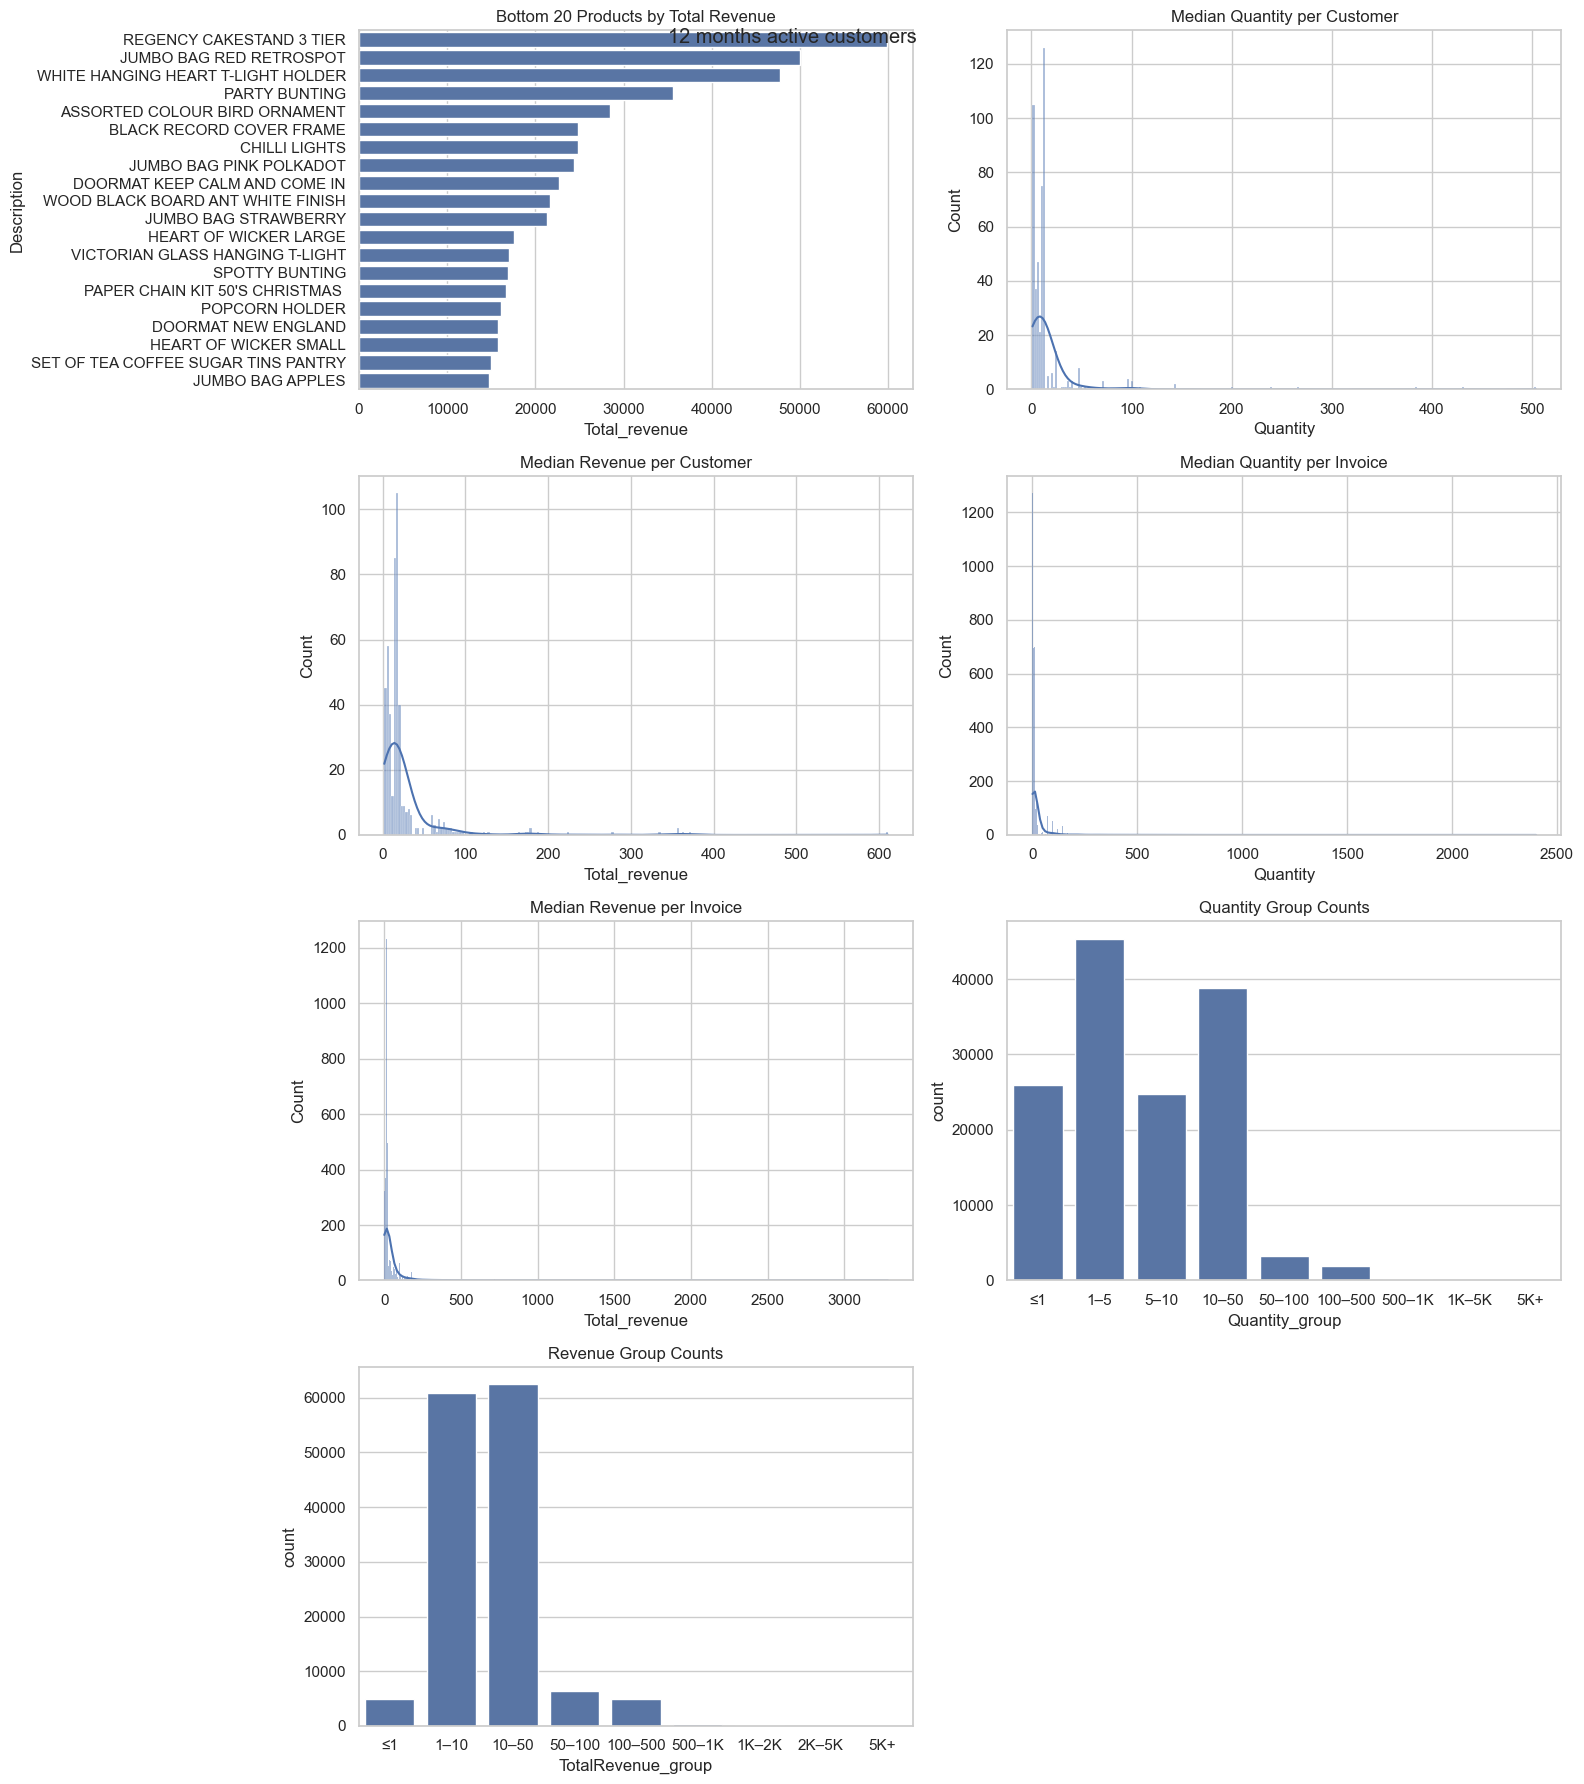

In [222]:
active_month(mont12_active, '12 months active customers')

In [223]:
mont1_active.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment  
0    True Champions  United Kingdom - True Champions  
1    True Champions  United Kingdom - True Champions  
2    True Champions  United Kingdom - True Champions  
3    True Champions  United Kingdom - True Champions  
4    True Champions  United Kingdom - True Champions

In [224]:
customer_summary = mont1_active.groupby('invoice_month_name').agg({
    'Quantity' : 'sum', 'Description' : 'nunique', 'TotalRevenue_group' : 'count', 'Quantity_group' :'count'
}).reset_index()

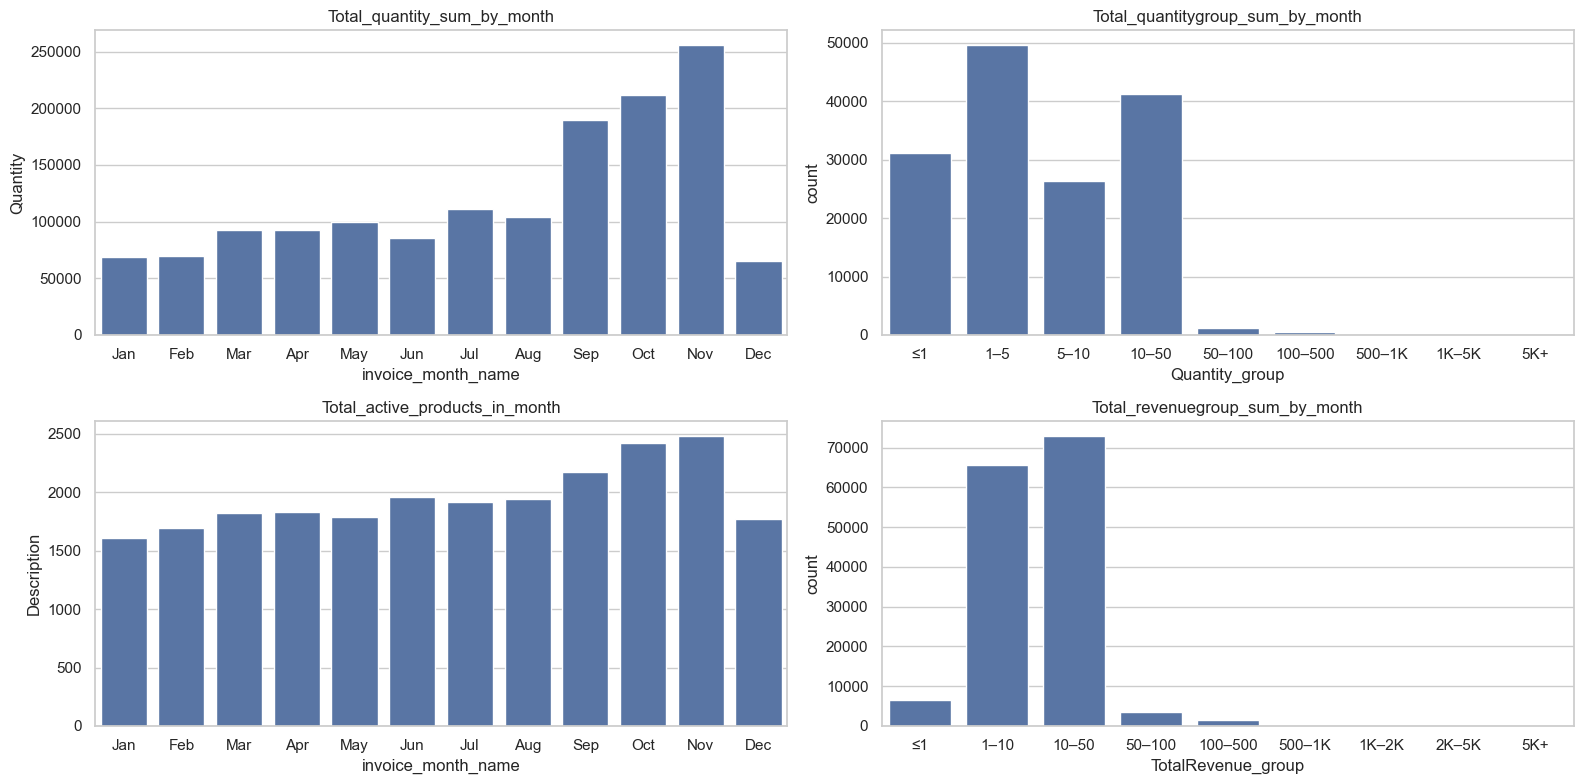

In [225]:
fig, axes = plt.subplots(2, 2, figsize = (16, 8))
axes = axes.flatten()

sns.barplot(data = customer_summary, x = 'invoice_month_name', y = 'Quantity', ax = axes[0])
axes[0].set_title('Total_quantity_sum_by_month')

sns.countplot(data = mont1_active, x = 'Quantity_group', ax = axes[1])
axes[1].set_title('Total_quantitygroup_sum_by_month')

sns.barplot(data = customer_summary, x = 'invoice_month_name', y = 'Description', ax = axes[2])
axes[2].set_title('Total_active_products_in_month')

sns.countplot(data = mont1_active, x = 'TotalRevenue_group', ax = axes[3])
axes[3].set_title('Total_revenuegroup_sum_by_month')

plt.tight_layout()
plt.show()

In [226]:
for i in range(1,13):
    r = mont1_active[mont1_active['invoice_mnth'] == i]
    r_ex = r.groupby('Description')['Total_revenue'].sum().sort_values(ascending = False).reset_index().head(15)
    #sns.barplot(data = r_ex, x = 'Total_revenue', y = 'Description')
    #plt.title(f'{i} month top des')
    #plt.show()

In [227]:
customer_cycle.head()

CustomerID  first_month  active_month
0    12747.0            1             8
1    12748.0            1            12
2    12749.0            5             4
3    12820.0            1             4
4    12821.0            5             1

In [228]:
less_month_active_cust = customer_cycle[customer_cycle['active_month'] < 6]['CustomerID'].unique().tolist()
more_month_active_cust = customer_cycle[customer_cycle['active_month'] >= 6]['CustomerID'].unique().tolist()

In [229]:
uk['month_active'] = uk.apply(
    lambda x: 'less_than_6' if x['CustomerID'] in less_month_active_cust else 'greater_than_6',
    axis=1
)

In [230]:
og.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment  
0    True Champions  United Kingdom - True Champions  
1    True Champions  United Kingdom - True Champions  
2    True Champions  United Kingdom - True Champions  
3    True Champions  United Kingdom - True Champions  
4    True Champions  United Kingdom - True Champions

In [231]:
def compring_less_not(df, customer_list):
    less_mnth_cus = df[df['CustomerID'].isin(customer_list)]
    
    lessmnth_summary = less_mnth_cus.groupby('invoice_month_name').agg({'CustomerID' : 'nunique', 'Quantity' : 'median', 'Total_revenue' : 'median'}).reset_index()
    print(lessmnth_summary.shape)
    
    lessmnth_summary['Quantity'] = lessmnth_summary['Quantity'].round(0).astype(int)
    
    sns.barplot(data = lessmnth_summary, x = 'invoice_month_name', y = 'Quantity')
    plt.show()
    
    sns.barplot(data = lessmnth_summary, x = 'invoice_month_name', y = 'Total_revenue')
    plt.show()
    
    sns.barplot(data = lessmnth_summary, x = 'invoice_month_name', y = 'CustomerID')
    plt.show()

    sns.barplot(data = less_mnth_cus.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
    plt.show()
    
    print(less_mnth_cus.groupby('Description')['Total_revenue'].sum().sort_values(ascending = False).reset_index().head(15))

(12, 4)


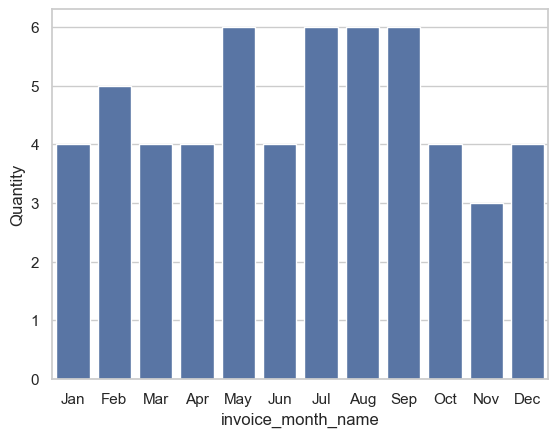

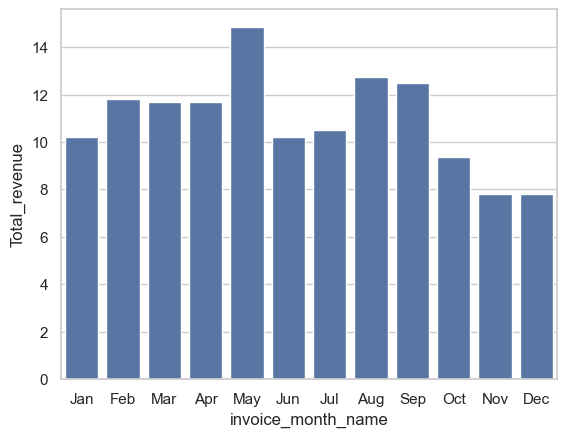

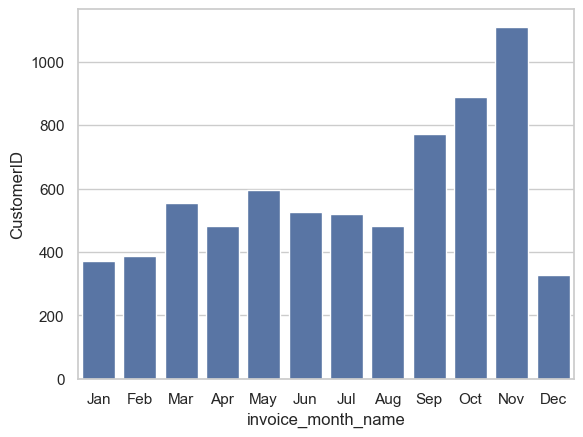

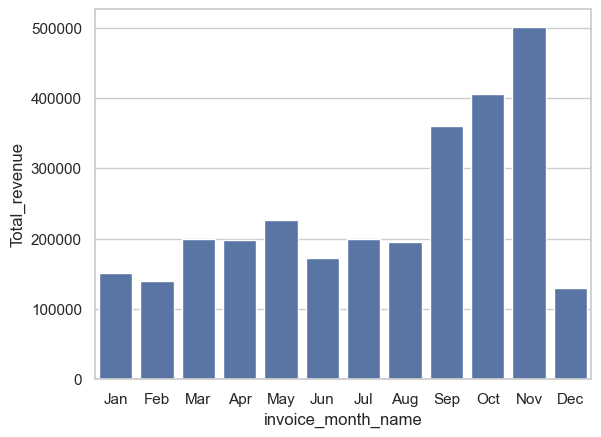

                           Description  Total_revenue
0   WHITE HANGING HEART T-LIGHT HOLDER       37606.11
1             REGENCY CAKESTAND 3 TIER       32865.70
2                        PARTY BUNTING       26128.83
3              JUMBO BAG RED RETROSPOT       21660.91
4        ASSORTED COLOUR BIRD ORNAMENT       20476.13
5      PAPER CHAIN KIT 50'S CHRISTMAS        18503.13
6   FAIRY CAKE FLANNEL ASSORTED COLOUR       15591.87
7                        CHILLI LIGHTS       14127.80
8      NATURAL SLATE HEART CHALKBOARD        13357.37
9                       SPOTTY BUNTING       13156.85
10         GIN + TONIC DIET METAL SIGN       12495.96
11          HOT WATER BOTTLE KEEP CALM       12464.85
12   PAPER CHAIN KIT VINTAGE CHRISTMAS       11624.87
13                  DOORMAT FAIRY CAKE       10747.79
14            JAM MAKING SET WITH JARS       10740.74


In [232]:
compring_less_not(og, less_month_active_cust)

(12, 4)


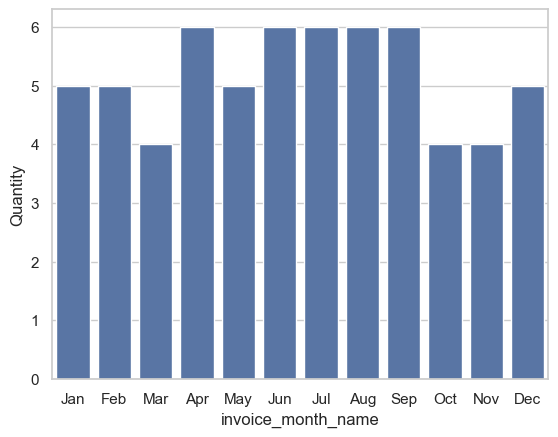

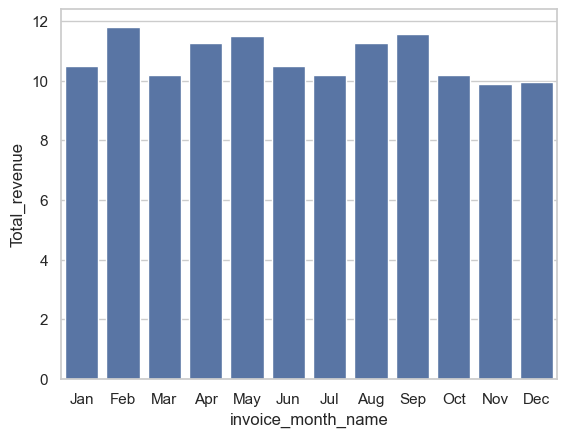

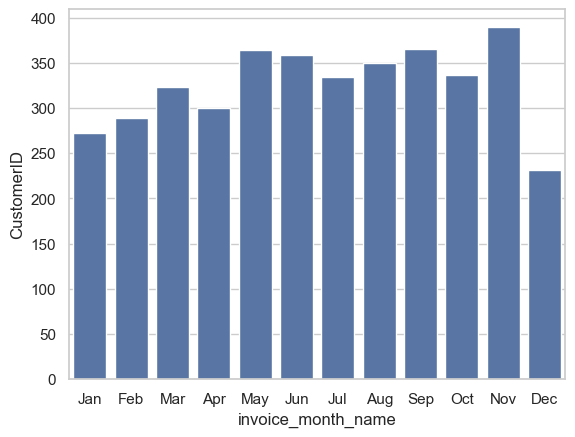

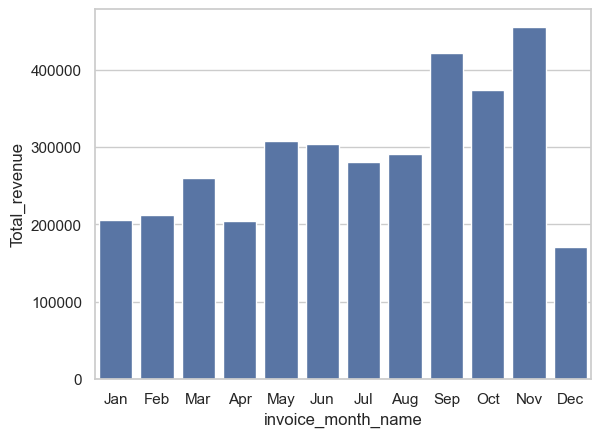

                           Description  Total_revenue
0             REGENCY CAKESTAND 3 TIER       59836.65
1              JUMBO BAG RED RETROSPOT       50063.23
2   WHITE HANGING HEART T-LIGHT HOLDER       47716.79
3                        PARTY BUNTING       35645.15
4        ASSORTED COLOUR BIRD ORNAMENT       28464.99
5             BLACK RECORD COVER FRAME       24879.21
6                        CHILLI LIGHTS       24837.57
7              JUMBO BAG PINK POLKADOT       24422.83
8        DOORMAT KEEP CALM AND COME IN       22688.71
9    WOOD BLACK BOARD ANT WHITE FINISH       21641.22
10                JUMBO BAG STRAWBERRY       21302.32
11               HEART OF WICKER LARGE       17591.86
12     VICTORIAN GLASS HANGING T-LIGHT       17055.87
13                      SPOTTY BUNTING       16854.75
14     PAPER CHAIN KIT 50'S CHRISTMAS        16637.50


In [233]:
compring_less_not(og, more_month_active_cust)

In [234]:
customer_cycle[customer_cycle['active_month'] == 1]['first_month'].value_counts().sort_values(ascending = False).reset_index()

first_month  count
0            11    295
1            10    242
2             9    159
3             3    135
4             4    101
5             5     96
6             6     96
7             7     86
8             2     85
9             1     80
10            8     74
11           12     39

In [235]:
retention_rate.head()

months  ret_rate
0       1       NaN
1       2      0.36
2       3      0.37
3       4      0.31
4       5      0.43

<Axes: xlabel='months', ylabel='ret_rate'>

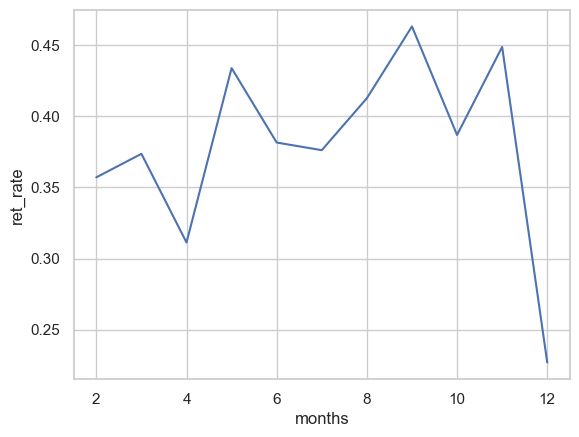

In [236]:
sns.lineplot(data = retention_rate, x = 'months', y = 'ret_rate')

In [237]:
og.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name',
       'InvoiceMonth', 'classify_customer', 'Country_Segment'],
      dtype='object')

In [238]:
retention_rate

months  ret_rate
0        1       NaN
1        2      0.36
2        3      0.37
3        4      0.31
4        5      0.43
5        6      0.38
6        7      0.38
7        8      0.41
8        9      0.46
9       10      0.39
10      11      0.45
11      12      0.23

<Axes: xlabel='invoice_mnth', ylabel='revenue_by_newcust'>

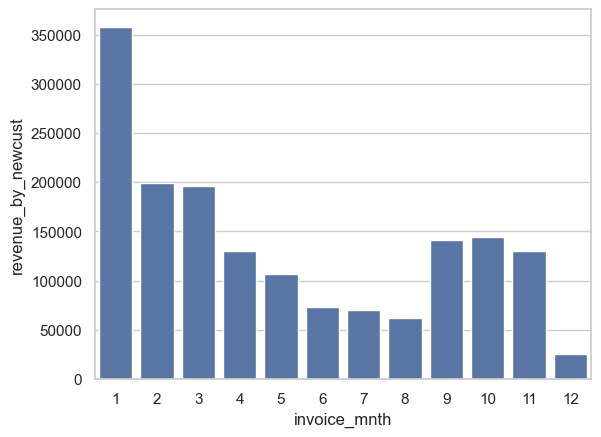

In [239]:
sns.barplot(data = new_vs_returning, x = 'invoice_mnth', y = 'revenue_by_newcust')

In [240]:
from operator import attrgetter
def cohort(df):
    # Assuming df has 'CustomerID', 'InvoiceDate' (or 'invoice_mnth') columns
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # if not already datetime

    # Extract month of invoice and cohort
    df['invoice_month'] = df['InvoiceDate'].dt.to_period('M')
    df['cohort_month'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

    # Calculate cohort index (month offset from acquisition)
    df['cohort_index'] = (df['invoice_month'] - df['cohort_month']).apply(attrgetter('n'))

    # Build cohort counts
    cohort_data = df.groupby(['cohort_month', 'cohort_index'])['CustomerID'].nunique().reset_index()
    cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='CustomerID')

    # Convert to percentage
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap='YlGnBu')
    plt.title('Customer Retention Cohort Heatmap')
    plt.xlabel('Months Since Acquisition')
    plt.ylabel('Cohort Month')
    plt.tight_layout()
    plt.show()


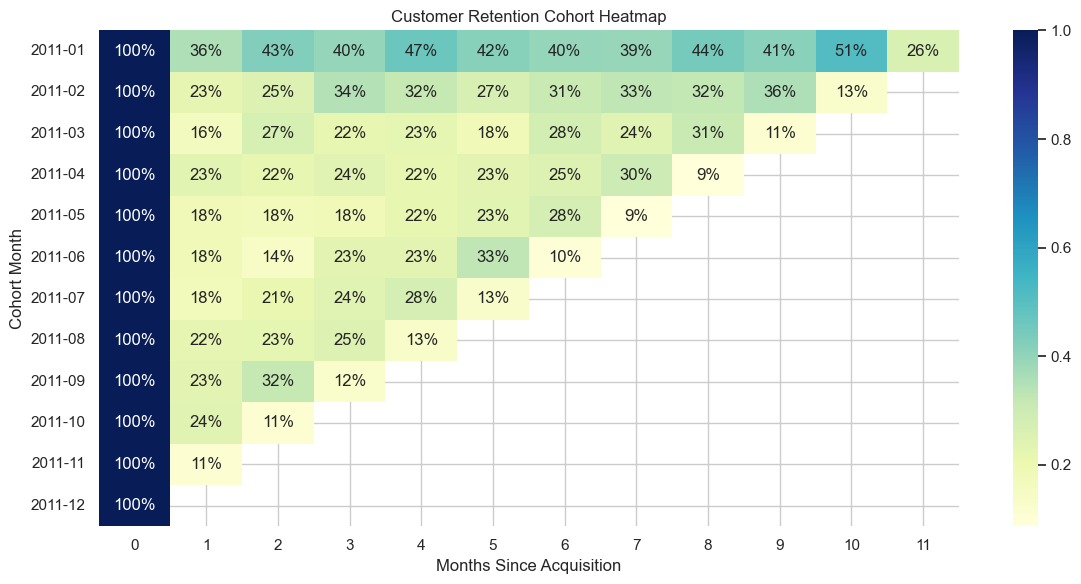

In [241]:
cohort(og[og['Country'] == 'United Kingdom'])

In [243]:
#price variation analysis

price_summary = og.groupby('StockCode')['UnitPrice'].nunique().reset_index()
price_variation = price_summary[price_summary['UnitPrice'] > 1]['StockCode'].tolist()
normal_price = price_summary[price_summary['UnitPrice'] == 1]['StockCode'].tolist()

variation_data = og[og['StockCode'].isin(price_variation)]
nor_price_data = og[og['StockCode'].isin(normal_price)]

In [244]:
#mn_data = og[og['Country'] == 'United Kingdom']
#mn_data = mn_data[mn_data['StockCode'] == '21499']

#variation_data = mn_data.groupby(['invoice_month_name', 'UnitPrice', 'Description']).agg({'Total_revenue':'sum', 'Quantity' : 'sum', 'CustomerID' : 'nunique'}).reset_index()

In [245]:
#variation_data_non_zo = variation_data[variation_data['Quantity'] > 0]

In [246]:
#variation_data_non_zo['unitprice_diff'] = variation_data_non_zo['UnitPrice'].diff()
#variation_data_non_zo['revenue_diff'] = variation_data_non_zo['Total_revenue'].diff()
#variation_data_non_zo['quantity_diff'] = variation_data_non_zo['Quantity'].diff()
#variation_data_non_zo['customer_count_diff'] = variation_data_non_zo['CustomerID'].diff()

In [247]:
#agg_data = data.groupby('invoice_month_name').agg({
#    'UnitPrice': lambda x: (x * data.loc[x.index, 'Quantity']).sum() / data.loc[x.index, 'Quantity'].sum(),
#    'Total_revenue': 'sum',
#    'Quantity': 'sum',
#    'CustomerID': 'nunique'
#}).reset_index()

#month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#agg_data['invoice_month_name'] = pd.Categorical(agg_data['invoice_month_name'], categories=month_order, ordered=True)

#agg_data = agg_data.sort_values(by='invoice_month_name')

In [248]:
#agg_data.rename(columns = {'CustomerID' : 'customer_cnts'}, inplace = True)

In [249]:
#agg_data['unitprice_diff'] = agg_data['UnitPrice'].diff()
#agg_data['revenue_diff'] = agg_data['Total_revenue'].diff()
#agg_data['quantity_diff'] = agg_data['Quantity'].diff()
#agg_data['customer_count_diff'] = agg_data['customer_cnts'].diff()

In [250]:
def flag_product(df_product):
    
    df_product['price_change_direction'] = np.select(
            [df_product['unitprice_diff'] > 0, df_product['unitprice_diff'] < 0, df_product['unitprice_diff'] == 0],
            ['Price_Increased', 'Price_Decreased', 'Price_No_Change'],
            default='N/A')
    
    df_product['revenue_impact'] = np.select(
            [df_product['revenue_diff'] > 0, df_product['revenue_diff'] < 0, df_product['revenue_diff'] == 0],
            ['Revenue_Increased', 'Revenue_Decreased', 'Revenue_No_Change'],
            default='N/A')
    
    df_product['quantity_impact'] = np.select(
            [df_product['quantity_diff'] > 0, df_product['quantity_diff'] < 0, df_product['quantity_diff'] == 0],
            ['Quantity_Increased', 'Quantity_Decreased', 'Quantity_No_Change'],
            default='N/A')
    
    df_product['customer_impact'] = np.select(
            [df_product['customer_count_diff'] > 0, df_product['customer_count_diff'] < 0, df_product['customer_count_diff'] == 0],
            ['customer_count_Increased', 'customer_count_Decreased', 'customer_count_No_Change'],
            default='N/A')
    
    return df_product



In [251]:
#variation_df = flag_product(agg_data.copy())

In [252]:
#variation_data nor_price_data

In [253]:
variation_data.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment  
0    True Champions  United Kingdom - True Champions  
1    True Champions  United Kingdom - True Champions  
2    True Champions  United Kingdom - True Champions  
3    True Champions  United Kingdom - True Champions  
4    True Champions  United Kingdom - True Champions

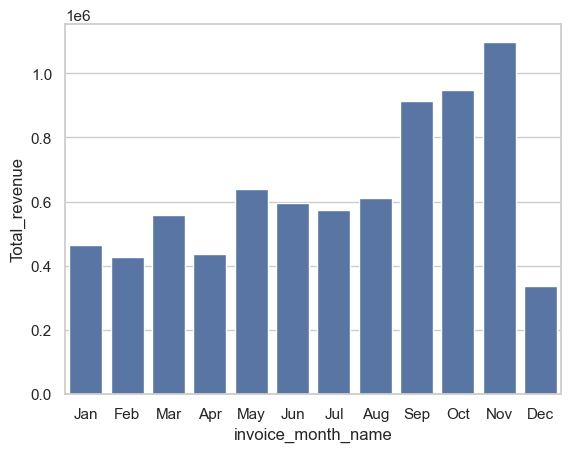

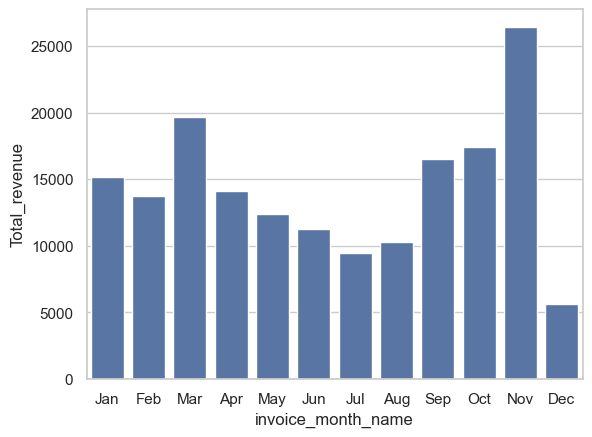

In [254]:
sns.barplot(data = variation_data.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.show()
sns.barplot(data = nor_price_data.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.show()

In [255]:
mn_data = og[og['Country'] == 'United Kingdom']

s = mn_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().reset_index()

In [256]:
d = s.pivot_table(index = 'InvoiceNo', columns = 'Description', values = 'Quantity').fillna(0)

In [257]:
def encode(x):
    if x <= 0:
        return 0
    elif x >= 0:
        return 1

d = d.applymap(encode)

In [258]:
#og.to_csv('og.csv')

In [259]:
retention_rate

months  ret_rate
0        1       NaN
1        2      0.36
2        3      0.37
3        4      0.31
4        5      0.43
5        6      0.38
6        7      0.38
7        8      0.41
8        9      0.46
9       10      0.39
10      11      0.45
11      12      0.23

In [260]:
mn_data = og[og['invoice_mnth'] == 4]
mn_data2 = og[og['invoice_mnth'] == 5]

In [261]:
common_cust = set(mn_data['CustomerID'].unique().tolist()).intersection(set(mn_data2['CustomerID'].unique().tolist()))
common_cust = list(common_cust)
common_customers = og[og['CustomerID'].isin(common_cust)]
len(common_cust)

365

In [262]:
og.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name',
       'InvoiceMonth', 'classify_customer', 'Country_Segment'],
      dtype='object')

In [263]:
common_customers = common_customers[common_customers['invoice_mnth'].isin([4,5])]

In [264]:
common_customers.query("invoice_mnth == 4 & Quantity == 1728.00")

InvoiceNo StockCode                        Description  Quantity  \
77047     549926     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      1728   

              InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
77047 2011-04-13 10:14:00       0.21    16333.0  United Kingdom             4   

      invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
77047      Wednesday         362.88  Normal_Product  2011          1K–5K   

      UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
77047             ≤1            100–500                Apr      2011-04   

      classify_customer                  Country_Segment  
77047    True Champions  United Kingdom - True Champions

In [265]:
mul_price = common_customers.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice > 1')
sing_price = common_customers.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice == 1')

In [266]:
len(set(customer_cycle[customer_cycle['CustomerID'].isin(common_customers['CustomerID'].unique().tolist())].query('first_month == 4')['CustomerID'].tolist()))

78

In [267]:
cm_cust_grp = common_customers.groupby(['CustomerID', 'invoice_month_name'])['InvoiceNo'].nunique().sort_values(ascending = False).reset_index()

In [268]:
common_customers.groupby(['invoice_month_name']).agg({'Total_revenue':'sum', 'Quantity':'sum'}).sort_values(ascending = False, by = 'Quantity').reset_index()

invoice_month_name  Total_revenue  Quantity
0                 May      334104.73    185424
1                 Apr      245712.94    162352
2                 Jan           0.00         0
3                 Feb           0.00         0
4                 Mar           0.00         0
5                 Jun           0.00         0
6                 Jul           0.00         0
7                 Aug           0.00         0
8                 Sep           0.00         0
9                 Oct           0.00         0
10                Nov           0.00         0
11                Dec           0.00         0

In [269]:
common_customers.groupby('invoice_month_name')['Quantity'].mean().sort_values(ascending = False).reset_index()

invoice_month_name  Quantity
0                 May     15.61
1                 Apr     14.93
2                 Jan       NaN
3                 Feb       NaN
4                 Mar       NaN
5                 Jun       NaN
6                 Jul       NaN
7                 Aug       NaN
8                 Sep       NaN
9                 Oct       NaN
10                Nov       NaN
11                Dec       NaN

In [270]:
retention_rate

months  ret_rate
0        1       NaN
1        2      0.36
2        3      0.37
3        4      0.31
4        5      0.43
5        6      0.38
6        7      0.38
7        8      0.41
8        9      0.46
9       10      0.39
10      11      0.45
11      12      0.23

In [271]:
new_vs_returning

invoice_mnth  new_customer_cnt  tot_cust_cnt  revenue_by_newcust
0              1               644           644           357999.95
1              2               447           677           199592.87
2              3               500           877           196525.70
3              4               333           781           129771.14
4              5               290           959           106511.29
5              6               238           885            73110.35
6              7               191           855            70299.45
7              8               157           833            62319.70
8              9               291          1137           141515.32
9             10               340          1225           143893.81
10            11               331          1499           130063.53
11            12                39           557            25448.62

In [272]:
def common_vs_notcommon(df, country):
    monthly_comparison = []
    customers_rec = {}

    res = {}
    
    mn_data = df[df['Country'] == country]
    
    for month in range(1, 13):
        curr_data = mn_data[mn_data['invoice_mnth'] == month]
        curr_customers = set(curr_data['CustomerID'].unique())
    
        if month == 1:
            common_customers = set()
            not_common_customers = curr_customers
        else:
            prev_customers = set(mn_data[mn_data['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
            common_customers = curr_customers.intersection(prev_customers)
            not_common_customers = curr_customers - prev_customers
    
        common_revenue = curr_data[curr_data['CustomerID'].isin(common_customers)]['Total_revenue'].sum()
        not_common_revenue = curr_data[curr_data['CustomerID'].isin(not_common_customers)]['Total_revenue'].sum()
    
        monthly_comparison.append({
            'Month': month,
            'Common_Customers': len(common_customers),
            'Common_Revenue': common_revenue,
            'Not_Common_Customers': len(not_common_customers),
            'Not_Common_Revenue': not_common_revenue
        })

        customers_rec[month] = {
            'common_customers': common_customers,
            'not_common_customers': not_common_customers
        }

    
    month_rev_df = pd.DataFrame(monthly_comparison)
    res['month_rev_df'] = month_rev_df
    res['customer_rec'] = customers_rec
    return res

In [273]:
result = common_vs_notcommon(og, 'United Kingdom')

In [274]:
common_vs_new = result['month_rev_df']

In [275]:
customerIDs = result['customer_rec']

In [276]:
common_vs_new['Total_Customers'] = common_vs_new['Common_Customers'] + common_vs_new['Not_Common_Customers']
common_vs_new['Total_Revenue'] = common_vs_new['Common_Revenue'] + common_vs_new['Not_Common_Revenue']

common_vs_new['revenue_dominant'] = common_vs_new.apply(lambda x: 'common' if x['Common_Revenue'] > x['Not_Common_Revenue'] else 'not_common', axis = 1)
common_vs_new['customer_count_dominant'] = common_vs_new.apply(lambda x: 'common' if x['Common_Customers'] > x['Not_Common_Customers'] else 'not_common', axis = 1)

In [277]:
common_vs_new

Month  Common_Customers  Common_Revenue  Not_Common_Customers  \
0       1                 0            0.00                   644   
1       2               230       152942.99                   447   
2       3               253       197388.33                   624   
3       4               273       183255.50                   508   
4       5               339       277702.04                   620   
5       6               366       287092.91                   519   
6       7               333       256767.78                   522   
7       8               353       251685.07                   480   
8       9               386       426708.89                   751   
9      10               440       387218.31                   785   
10     11               550       508988.94                   949   
11     12               340       212522.05                   217   

    Not_Common_Revenue  Total_Customers  Total_Revenue revenue_dominant  \
0            357999.95              644      357999.95       not_common   
1            199592.87              677      352535.86       not_common   
2            261872.26              877      459260.59       not_common   
3            219110.06              781      402365.56       not_common   
4            257343.66              959      535045.70           common   
5            189165.72              885      476258.63           common   
6            222639.09              855      479406.87           common   
7            234541.21              833      486226.28           common   
8            356514.59             1137      783223.48           common   
9            393409.22             1225      780627.53       not_common   
10           447937.71             1499      956926.65           common   
11            88659.18              557      301181.23           common   

   customer_count_dominant  
0               not_common  
1               not_common  
2               not_common  
3               not_common  
4               not_common  
5               not_common  
6               not_common  
7               not_common  
8               not_common  
9               not_common  
10              not_common  
11                  common

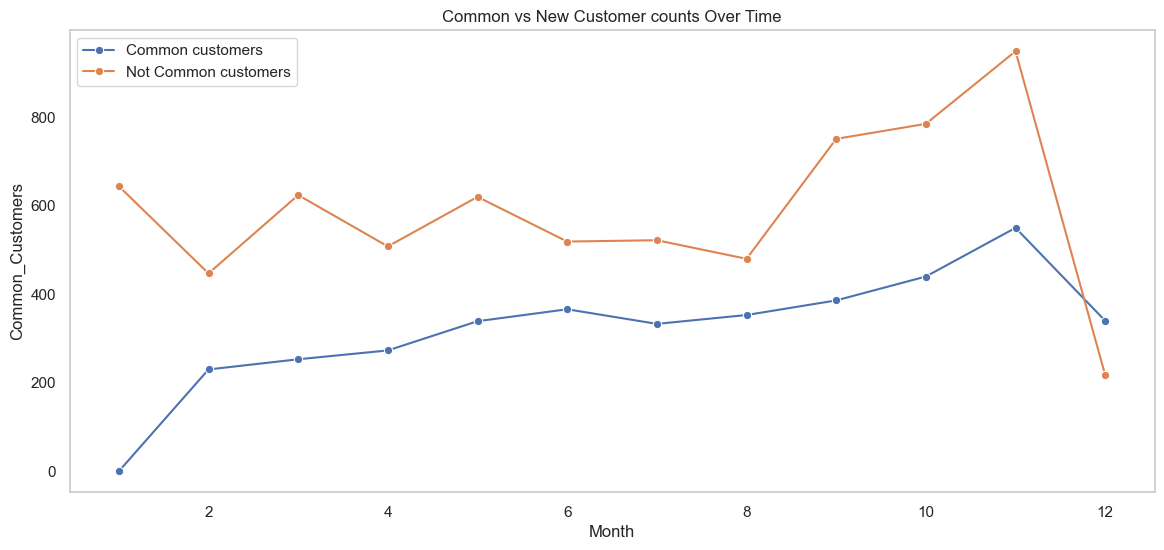

In [278]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=common_vs_new, x='Month', y='Common_Customers', label='Common customers', marker='o')
sns.lineplot(data=common_vs_new, x='Month', y='Not_Common_Customers', label='Not Common customers', marker='o')
plt.title('Common vs New Customer counts Over Time')
plt.legend()
plt.grid()
plt.show()

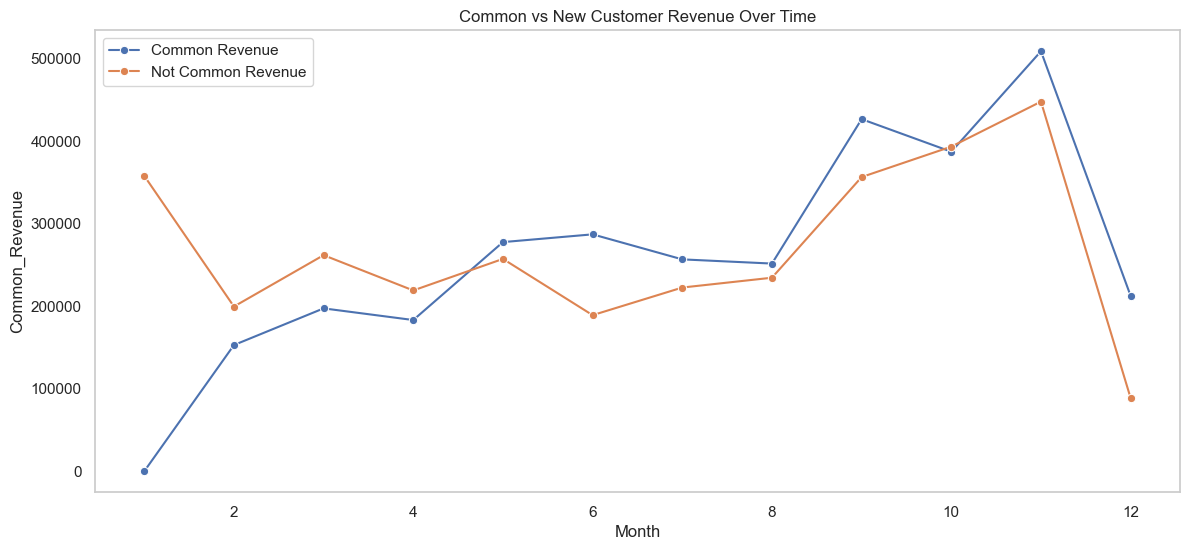

In [279]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=common_vs_new, x='Month', y='Common_Revenue', label='Common Revenue', marker='o')
sns.lineplot(data=common_vs_new, x='Month', y='Not_Common_Revenue', label='Not Common Revenue', marker='o')
plt.title('Common vs New Customer Revenue Over Time')
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='Month'>

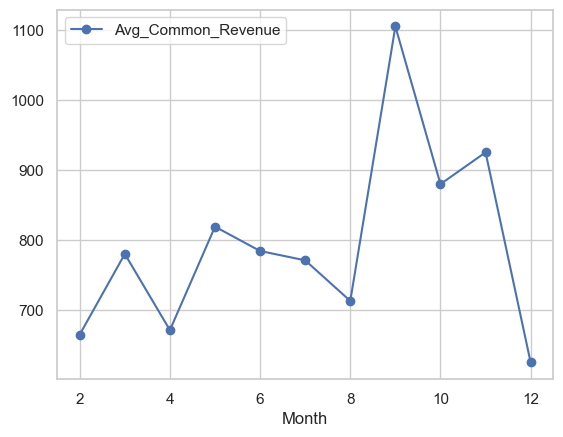

In [280]:
common_vs_new['Avg_Common_Revenue'] = common_vs_new['Common_Revenue'] / common_vs_new['Common_Customers']
common_vs_new[['Month', 'Avg_Common_Revenue']].plot(x='Month', y='Avg_Common_Revenue', marker='o')

In [281]:
unit_price_analysis = []

mn_data = og[og['Country'] == 'United Kingdom']
for month in range(2, 13):  # from Feb to Dec
    prev_cust = set(mn_data[mn_data['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
    curr_cust = set(mn_data[mn_data['invoice_mnth'] == month]['CustomerID'].unique())

    common_cust = curr_cust.intersection(prev_cust)
    not_common_cust = curr_cust - prev_cust

    curr_data = mn_data[mn_data['invoice_mnth'] == month]

    common_unit_price = curr_data[curr_data['CustomerID'].isin(common_cust)].groupby('CustomerID')['UnitPrice'].mean().reset_index()
    not_common_unit_price = curr_data[curr_data['CustomerID'].isin(not_common_cust)].groupby('CustomerID')['UnitPrice'].mean().reset_index()

    unit_price_analysis.append({
        'Month': month,
        'Avg_UnitPrice_Common': common_unit_price['UnitPrice'].mean(),
        'Avg_UnitPrice_NotCommon': not_common_unit_price['UnitPrice'].mean()
    })

unit_price_df = pd.DataFrame(unit_price_analysis)


In [282]:
unit_price_df

Month  Avg_UnitPrice_Common  Avg_UnitPrice_NotCommon
0       2                  4.01                     3.45
1       3                  3.97                     3.77
2       4                  3.28                     3.60
3       5                  3.25                     3.52
4       6                  3.19                     3.27
5       7                  3.10                     3.02
6       8                  2.87                     3.15
7       9                  3.30                     3.10
8      10                  3.10                     2.90
9      11                  2.78                     3.10
10     12                  2.66                     2.93

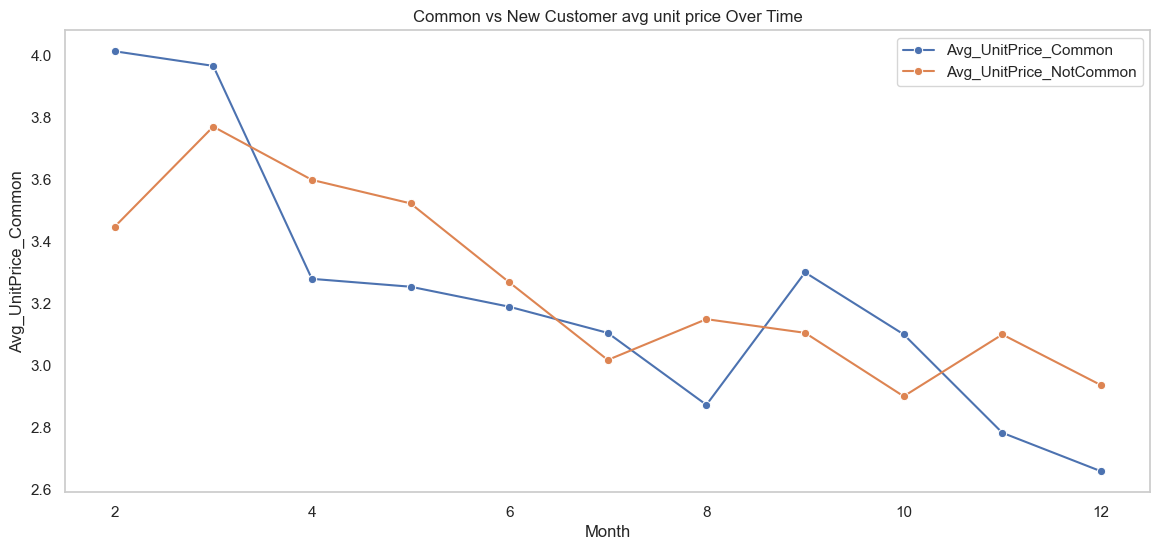

In [283]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=unit_price_df, x='Month', y='Avg_UnitPrice_Common', label='Avg_UnitPrice_Common', marker='o')
sns.lineplot(data=unit_price_df, x='Month', y='Avg_UnitPrice_NotCommon', label='Avg_UnitPrice_NotCommon', marker='o')
plt.title('Common vs New Customer avg unit price Over Time')
plt.legend()
plt.grid()
plt.show()

In [284]:
uk.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name', 'exp',
       'InvoiceMonth', 'classify_customer', '_merge', 'Country_Segment',
       'month_active'],
      dtype='object')

In [288]:
quantity_analysis = []

for month in range(2, 13):
    prev_cust = set(uk[uk['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
    curr_cust = set(uk[uk['invoice_mnth'] == month]['CustomerID'].unique())

    common_cust = curr_cust.intersection(prev_cust)
    not_common_cust = curr_cust - prev_cust

    curr_data = uk[uk['invoice_mnth'] == month]

    # Mean quantity per invoice/customer
    common_qty = curr_data[curr_data['CustomerID'].isin(common_cust)].groupby('CustomerID')['Quantity'].median().reset_index()
    not_common_qty = curr_data[curr_data['CustomerID'].isin(not_common_cust)].groupby('CustomerID')['Quantity'].median().reset_index()

    quantity_analysis.append({
        'Month': month,
        'Avg_Quantity_Common': common_qty['Quantity'].median(),
        'Avg_Quantity_NotCommon': not_common_qty['Quantity'].median()
    })

quantity_analysis_df = pd.DataFrame(quantity_analysis)

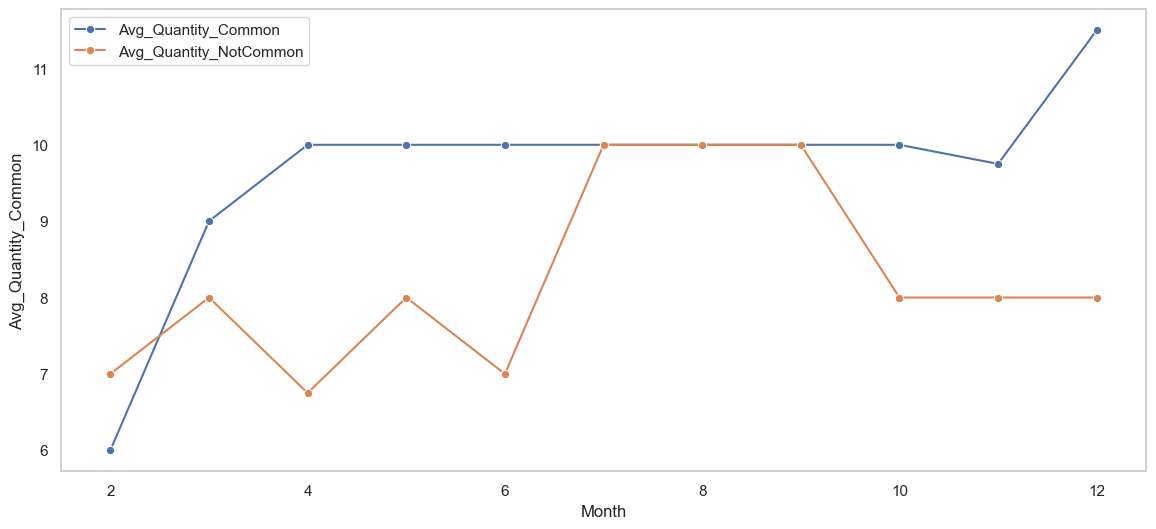

In [289]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = quantity_analysis_df, x = 'Month', y = 'Avg_Quantity_Common', label = 'Avg_Quantity_Common', marker = 'o')
sns.lineplot(data = quantity_analysis_df, x = 'Month', y = 'Avg_Quantity_NotCommon', label = 'Avg_Quantity_NotCommon', marker = 'o')
plt.legend()
plt.grid()
plt.show()

In [348]:
import numpy as np
import pandas as pd

quantity_analysis = []

for month in range(2, 13):
    prev_cust = set(uk[uk['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
    curr_cust = set(uk[uk['invoice_mnth'] == month]['CustomerID'].unique())

    common_cust = curr_cust.intersection(prev_cust)
    not_common_cust = curr_cust - prev_cust

    curr_data = uk[uk['invoice_mnth'] == month]

    # Mode quantity per customer
    common_qty = (
        curr_data[curr_data['CustomerID'].isin(common_cust)]
        .groupby('CustomerID')['Quantity']
        .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        .reset_index()
    )

    not_common_qty = (
        curr_data[curr_data['CustomerID'].isin(not_common_cust)]
        .groupby('CustomerID')['Quantity']
        .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        .reset_index()
    )

    quantity_analysis.append({
        'Month': month,
        'Mode_Quantity_Common': common_qty['Quantity'].median(),
        'Mode_Quantity_NotCommon': not_common_qty['Quantity'].median()
    })

quantity_analysis_df = pd.DataFrame(quantity_analysis)


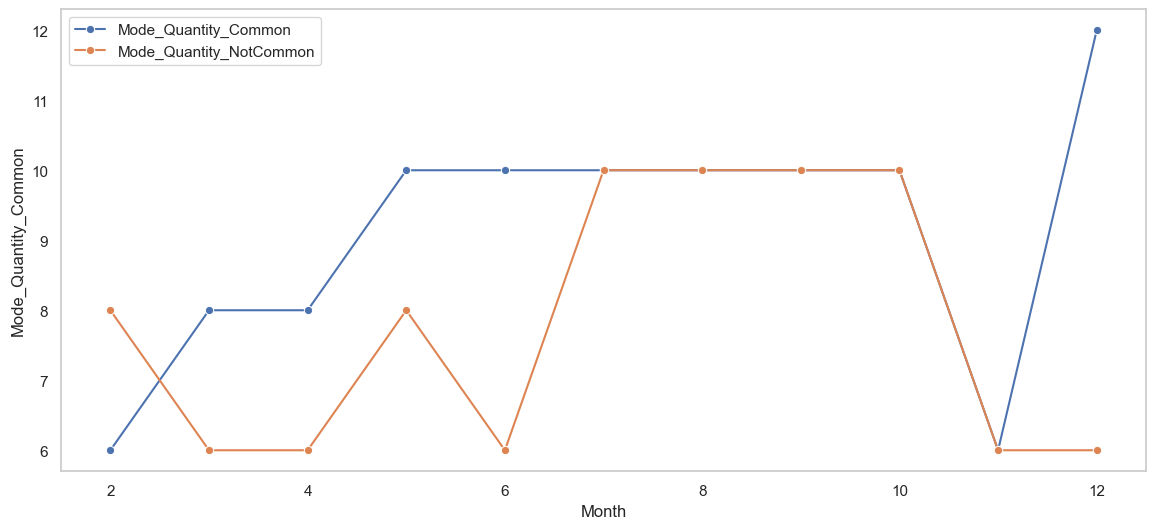

In [350]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = quantity_analysis_df, x = 'Month', y = 'Mode_Quantity_Common', label = 'Mode_Quantity_Common', marker = 'o')
sns.lineplot(data = quantity_analysis_df, x = 'Month', y = 'Mode_Quantity_NotCommon', label = 'Mode_Quantity_NotCommon', marker = 'o')
plt.legend()
plt.grid()
plt.show()

In [290]:
og['CustomerID'] = og['CustomerID'].astype(str)
common_ids = set(map(str, customerIDs[5]['common_customers']))
filtered_df = og[og['CustomerID'].isin(common_ids)]

In [293]:
import scipy.stats as stats

In [294]:
from scipy import stats
import pandas as pd

def price_analysis(country):
    result = []
    
    x = og[og['Country'] == country]

    for description in x['Description'].unique().tolist():
    
        y = x[x['Description'] == description].groupby(
            ['Description', 'invoice_month_name', 'UnitPrice']
        ).agg({'Quantity':'sum', 'Total_revenue':'sum'}).reset_index()

        if len(y) < 20:
            result.append({
                'description': description,
                'status': 'Not enough data',
                'up_vs_tr': None,
                'revenue_p_value': None,
                'up_vs_qn': None,
                'quantity_p_value': None
            })
            continue

        quantity_corr, quantity_p_value = stats.spearmanr(y['UnitPrice'], y['Quantity'])
        revenue_corr, revenue_p_value = stats.spearmanr(y['UnitPrice'], y['Total_revenue'])

        result.append({
            'description': description,
            'status': 'OK',
            'up_vs_tr': revenue_corr,
            'revenue_p_value': revenue_p_value,
            'up_vs_qn': quantity_corr,
            'quantity_p_value': quantity_p_value
        })

    final = pd.DataFrame(result)
    return final

In [295]:
price_sensitive = price_analysis('United Kingdom')
price_sensitive.head()

description status  up_vs_tr  revenue_p_value  up_vs_qn  \
0    JUMBO BAG PINK POLKADOT     OK      0.09             0.42      0.07   
1         BLUE POLKADOT WRAP     OK      0.68             0.00      0.66   
2        RED RETROSPOT WRAP      OK      0.71             0.00      0.69   
3   RECYCLING BAG RETROSPOT      OK     -0.69             0.00     -0.74   
4  RED RETROSPOT SHOPPER BAG     OK     -0.17             0.32     -0.19   

   quantity_p_value  
0              0.53  
1              0.00  
2              0.00  
3              0.00  
4              0.28

In [296]:
def classify_price_behavior(row):
    rev_corr = row['up_vs_tr']
    qn_corr = row['up_vs_qn']
    
    if rev_corr < 0 and qn_corr < 0:
        return 'Price-Sensitive ↓'
    elif rev_corr > 0 and qn_corr <= 0:
        return 'Premium Buyers ↑'
    elif abs(rev_corr) < 0.2 and abs(qn_corr) < 0.2:
        return 'Price-Insensitive'
    elif rev_corr > 0 and qn_corr > 0:
        return 'Demand Driven ↑'
    else:
        return 'Other'

price_sensitive['price_behavior'] = price_sensitive.apply(classify_price_behavior, axis=1)

In [297]:
price_sensitive[(price_sensitive['revenue_p_value'] < 0.05) & (price_sensitive['quantity_p_value'] < 0.05)]

description status  up_vs_tr  revenue_p_value  \
1                      BLUE POLKADOT WRAP     OK      0.68             0.00   
2                     RED RETROSPOT WRAP      OK      0.71             0.00   
3                RECYCLING BAG RETROSPOT      OK     -0.69             0.00   
8                   RECIPE BOX RETROSPOT      OK      0.58             0.00   
9           CHILDRENS APRON APPLES DESIGN     OK     -0.34             0.02   
13     WHITE HANGING HEART T-LIGHT HOLDER     OK     -0.30             0.01   
14        SET OF 6 T-LIGHTS EASTER CHICKS     OK      0.46             0.02   
17       RED HANGING HEART T-LIGHT HOLDER     OK     -0.53             0.00   
18    CERAMIC BOWL WITH LOVE HEART DESIGN     OK     -0.48             0.02   
20              PLACE SETTING WHITE HEART     OK     -0.35             0.03   
24               LOVE HEART POCKET WARMER     OK      0.48             0.00   
25         SWEETHEART CERAMIC TRINKET BOX     OK     -0.49             0.00   
26                     RED KITCHEN SCALES     OK      0.33             0.01   
29             BREAD BIN DINER STYLE RED      OK      0.73             0.00   
30                   IVORY KITCHEN SCALES     OK     -0.35             0.03   
31                ENAMEL FLOWER JUG CREAM     OK     -0.50             0.00   
32          PHOTO FRAME 3 CLASSIC HANGING     OK      0.81             0.00   
33                   RED DINER WALL CLOCK     OK     -0.40             0.02   
34                 IVORY DINER WALL CLOCK     OK      0.71             0.00   
35       SINGLE HEART ZINC T-LIGHT HOLDER     OK     -0.26             0.04   
38       HANGING HEART JAR T-LIGHT HOLDER     OK     -0.66             0.00   
41        NATURAL SLATE HEART CHALKBOARD      OK     -0.44             0.01   
42           HOMEMADE JAM SCENTED CANDLES     OK     -0.40             0.01   
47       ROSES REGENCY TEACUP AND SAUCER      OK     -0.67             0.00   
57          SWEETHEART WIRE MAGAZINE RACK     OK      0.90             0.00   
60    SET/20 RED RETROSPOT PAPER NAPKINS      OK      0.47             0.00   
63           RED RETROSPOT SMALL MILK JUG     OK      0.52             0.01   
66                          CHILLI LIGHTS     OK      0.41             0.00   
71    SET/5 RED RETROSPOT LID GLASS BOWLS     OK     -0.52             0.00   
72                KEY CABINET MA CAMPAGNE     OK      0.89             0.00   
79                KEY FOB , GARAGE DESIGN     OK      0.57             0.00   
80         PLASTERS IN TIN CIRCUS PARADE      OK     -0.89             0.00   
81              PLASTERS IN TIN STRONGMAN     OK     -0.91             0.00   
84           SWEETHEART RECIPE BOOK STAND     OK      0.64             0.00   
91             SEWING SUSAN 21 NEEDLE SET     OK     -0.88             0.00   
95        ANGEL DECORATION STARS ON DRESS     OK      0.50             0.01   
96              SET OF 6 HEART CHOPSTICKS     OK     -0.68             0.00   
97            FELT EGG COSY WHITE RABBIT      OK     -0.50             0.01   
98                  FELT EGG COSY CHICKEN     OK     -0.81             0.00   
101               EDWARDIAN PARASOL BLACK     OK      0.29             0.03   
105           GARLAND WOODEN HAPPY EASTER     OK      0.65             0.00   
106          PENS ASSORTED FUNKY JEWELED      OK     -0.47             0.00   
108      ZINC WILLIE WINKIE  CANDLE STICK     OK     -0.88             0.00   
115            TRIANGULAR POUFFE VINTAGE      OK      0.53             0.01   
117       FLOOR CUSHION ELEPHANT CARNIVAL     OK      0.48             0.02   
118                TOY TIDY PINK POLKADOT     OK     -0.55             0.00   
120              JAZZ HEARTS ADDRESS BOOK     OK     -0.43             0.01   
124   WALL MIRROR RECTANGLE DIAMANTE PINK     OK      0.65             0.00   
125               MA CAMPAGNE CUTLERY BOX     OK      0.55             0.01   
127         FLOWER VINE RAFFIA FOOD COVER     OK     -0.90             0.00   
1

In [298]:
og.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment  
0    True Champions  United Kingdom - True Champions  
1    True Champions  United Kingdom - True Champions  
2    True Champions  United Kingdom - True Champions  
3    True Champions  United Kingdom - True Champions  
4    True Champions  United Kingdom - True Champions

In [299]:
uk = og[og['Country'] == 'United Kingdom']

In [300]:
og.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'invoice_mnth', 'invoicedayweek',
       'Total_revenue', 'InvoiceIdentity', 'Year', 'Quantity_group',
       'UniPrice_group', 'TotalRevenue_group', 'invoice_month_name',
       'InvoiceMonth', 'classify_customer', 'Country_Segment'],
      dtype='object')

In [301]:
jn = price_sensitive[['description', 'price_behavior']]
uk = pd.merge(uk, jn, left_on = 'Description', right_on = 'description', how = 'left')

In [302]:
uk.drop(columns = 'description', inplace = True)

In [303]:
uk.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment     price_behavior  
0    True Champions  United Kingdom - True Champions  Price-Insensitive  
1    True Champions  United Kingdom - True Champions    Demand Driven ↑  
2    True Champions  United Kingdom - True Champions    Demand Driven ↑  
3    True Champions  United Kingdom - True Champions  Price-Sensitive ↓  
4    True Champions  United Kingdom - True Champions  Price-Sensitive ↓

In [304]:
sen_data = uk[uk['Description'].isin(price_sensitive[(price_sensitive['revenue_p_value'] < 0.05) & (price_sensitive['quantity_p_value'] < 0.05)]['description'].unique().tolist())]

In [305]:
pd.crosstab(sen_data['classify_customer'], sen_data['price_behavior'])

price_behavior     Demand Driven ↑  Price-Sensitive ↓
classify_customer                                    
At-Risk Customers             7366               8799
Loyal Customers              11276              12661
Needs Attention               5900               6519
True Champions               32355              37177

In [306]:
x = sen_data[sen_data['price_behavior'] == 'Price-Sensitive ↓'].groupby(['invoice_month_name', 'classify_customer'])['Total_revenue'].sum().reset_index()

<Axes: xlabel='invoice_month_name', ylabel='Total_revenue'>

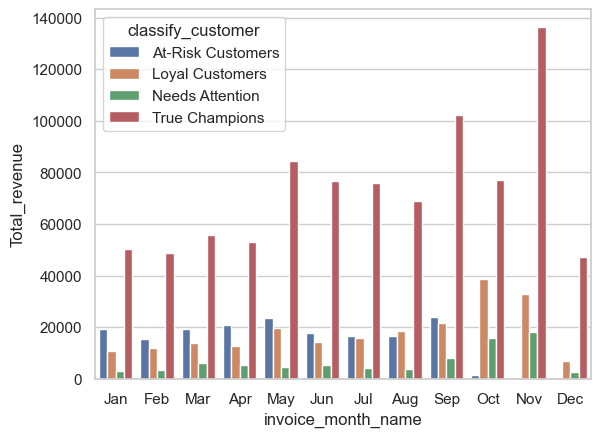

In [307]:
sns.barplot(data = x, x = 'invoice_month_name', y = 'Total_revenue', hue = 'classify_customer')

In [308]:
og['month_active'].unique()

KeyError: 'month_active'

In [ ]:
og.head()

In [ ]:
sns.barplot(data = og[og['Country'] == 'United Kingdom'].groupby(['invoice_month_name', 'month_active'])['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', hue = 'month_active')

In [ ]:
sns.barplot(data = og[og['Country'] == 'United Kingdom'].groupby(['invoice_month_name', 'month_active'])['Quantity'].sum().reset_index(), x = 'invoice_month_name', y = 'Quantity', hue = 'month_active')

In [ ]:
sns.barplot(data = uk.groupby('invoice_month_name')['price_behavior'].value_counts().reset_index(), x = 'invoice_month_name', y = 'count', hue = 'price_behavior')

In [ ]:
price_sensitive_products = uk[uk['price_behavior'] == 'Price-Sensitive ↓']
sns.scatterplot(data=price_sensitive_products, x='UnitPrice', y='Quantity')

In [ ]:
uk['price_behavior'].unique()

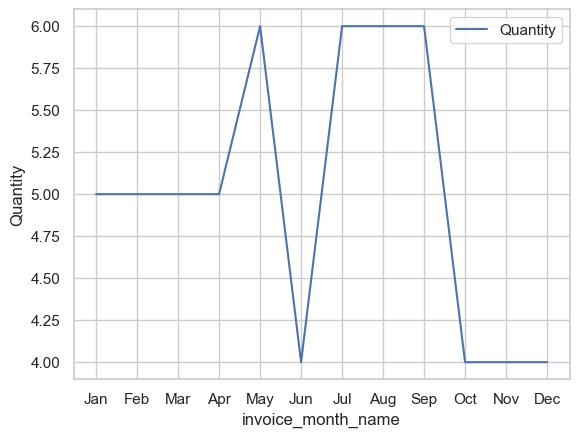

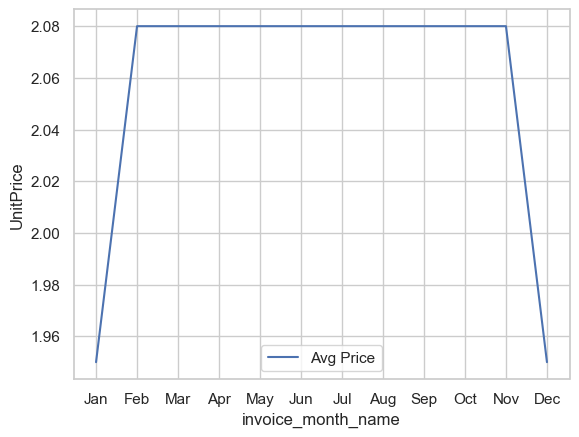

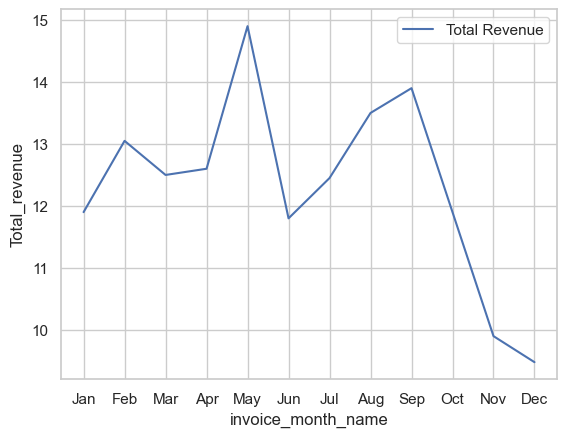

In [309]:
monthly_trend = uk[uk['price_behavior'] == 'Price-Insensitive'].groupby('invoice_month_name').agg({
    'Quantity': 'median',
    'Total_revenue': 'median',
    'UnitPrice': 'median'
}).reset_index()

sns.lineplot(data=monthly_trend, x='invoice_month_name', y='Quantity', label='Quantity')
plt.show()
sns.lineplot(data=monthly_trend, x='invoice_month_name', y='UnitPrice', label='Avg Price')
plt.show()
sns.lineplot(data=monthly_trend, x='invoice_month_name', y='Total_revenue', label='Total Revenue')
plt.show()

In [310]:
uk[uk['Country'] == 'United Kingdom'].groupby('price_behavior')['Total_revenue'].sum().reset_index().sort_values(ascending = False, by = 'Total_revenue')

price_behavior  Total_revenue
4  Price-Sensitive ↓     3052220.15
0    Demand Driven ↑     1662490.76
3  Price-Insensitive     1280641.11
1              Other      228125.48
2   Premium Buyers ↑      147580.83

In [311]:
sens_des = price_sensitive[(price_sensitive['revenue_p_value'] < 0.05) & (price_sensitive['quantity_p_value'] < 0.05)].query("price_behavior == 'Demand Driven ↑'")['description'].unique().tolist()

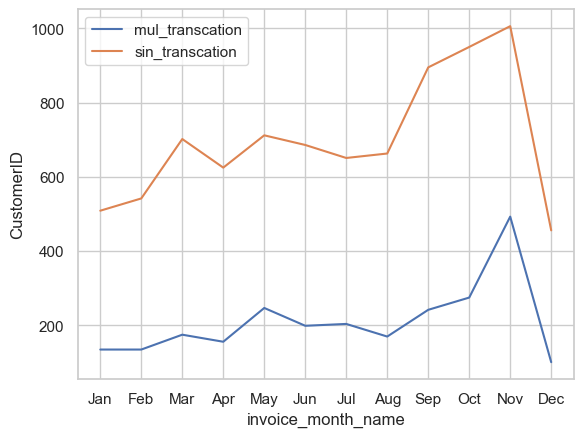

In [312]:
trs_mul_cnt = uk.groupby(['invoice_month_name', 'CustomerID']).agg({'InvoiceNo':'nunique', 'Total_revenue':'sum'}).reset_index().query('InvoiceNo > 1')
trs_sin_cnt = uk.groupby(['invoice_month_name', 'CustomerID']).agg({'InvoiceNo':'nunique', 'Total_revenue':'sum'}).reset_index().query('InvoiceNo == 1')

sns.lineplot(data = trs_mul_cnt.groupby('invoice_month_name')['CustomerID'].nunique().reset_index(), x = 'invoice_month_name', y = 'CustomerID', label = 'mul_transcation')
sns.lineplot(data = trs_sin_cnt.groupby('invoice_month_name')['CustomerID'].nunique().reset_index(), x = 'invoice_month_name', y = 'CustomerID', label = 'sin_transcation')

plt.legend()
plt.show()

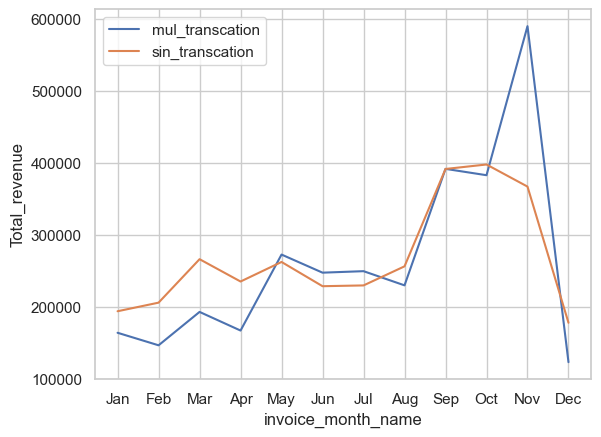

In [313]:
sns.lineplot(data = trs_mul_cnt.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', label = 'mul_transcation')
sns.lineplot(data = trs_sin_cnt.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', label = 'sin_transcation')
plt.legend()
plt.show()

In [314]:
uk['Date'] = uk['InvoiceDate'].dt.date

In [315]:
result = []
for month in uk['invoice_month_name'].unique().tolist():
    res = {}
    one_mnth = uk[uk['invoice_month_name'] == month]
    
    mul_list = one_mnth.groupby('CustomerID').agg({'Date':'nunique'}).reset_index().query('Date > 1')['CustomerID'].tolist()
    
    mul_data = one_mnth[one_mnth['CustomerID'].isin(mul_list)].groupby('CustomerID').agg({'Date':['max', 'min']}).reset_index()
    mul_data.columns = ['CustomerID', 'date_max', 'date_min']
    
    mul_data['date_max'] = pd.to_datetime(mul_data['date_max'], errors='coerce')
    mul_data['date_min'] = pd.to_datetime(mul_data['date_min'], errors='coerce')
    
    mul_data['date_diff'] = mul_data['date_max'] - mul_data['date_min']
    
    mul_data['date_diff'] = mul_data['date_diff'].dt.days

    res['month'] = month
    res['diff_btw_days'] = mul_data['date_diff'].mean()
    result.append(res)
pd.DataFrame(result)

month  diff_btw_days
0    Jan          14.55
1    Feb          14.36
2    Mar          16.29
3    Apr          13.84
4    May          13.11
5    Jun          15.76
6    Jul          15.69
7    Aug          15.78
8    Sep          16.26
9    Oct          15.28
10   Nov          15.41
11   Dec           4.88

In [324]:
mont1_active.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment  
0    True Champions  United Kingdom - True Champions  
1    True Champions  United Kingdom - True Champions  
2    True Champions  United Kingdom - True Champions  
3    True Champions  United Kingdom - True Champions  
4    True Champions  United Kingdom - True Champions

In [329]:
cut_avgup_lessmnth.groupby('invoice_month_name')['CustomerID'].nunique().reset_index()

invoice_month_name  CustomerID
0                 Jan        3091
1                 Feb        3091
2                 Mar        3091
3                 Apr        3091
4                 May        3091
5                 Jun        3091
6                 Jul        3091
7                 Aug        3091
8                 Sep        3091
9                 Oct        3091
10                Nov        3091
11                Dec        3091

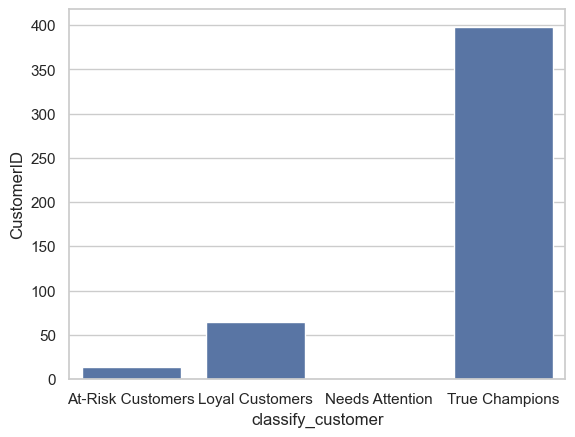

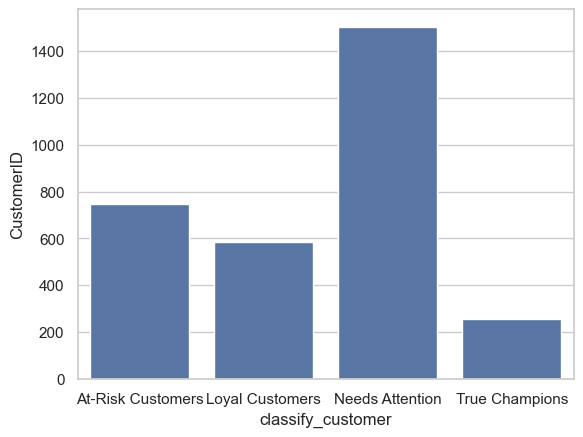

In [374]:
more_month_active = uk[uk['CustomerID'].isin(mont12_active['CustomerID'].unique().tolist())]

sns.barplot(data = more_month_active.groupby(['classify_customer'])['CustomerID'].nunique().reset_index(), x = 'classify_customer', y = 'CustomerID')

less_month_active = uk[uk['CustomerID'].isin(mont1_active['CustomerID'].unique().tolist())]
plt.show()
sns.barplot(data = less_month_active.groupby(['classify_customer'])['CustomerID'].nunique().reset_index(), x = 'classify_customer', y = 'CustomerID')

plt.show()

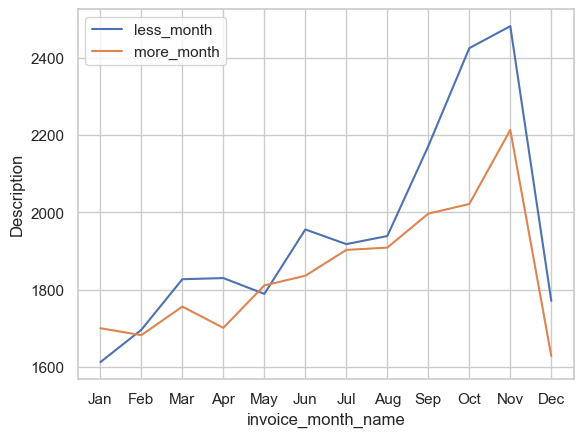

In [376]:
sns.lineplot(data = mont1_active.groupby('invoice_month_name')['Description'].nunique().reset_index(),x = 'invoice_month_name', y = 'Description', label = 'less_month')
sns.lineplot(data = mont12_active.groupby('invoice_month_name')['Description'].nunique().reset_index(),x = 'invoice_month_name', y = 'Description', label = 'more_month')
plt.legend()
plt.show()

In [367]:
cus_cnt_pb = uk.groupby('price_behavior')['Quantity'].mean().sort_values(ascending = False).reset_index()

In [368]:
cus_cnt_pb

price_behavior  Quantity
0   Premium Buyers ↑     20.58
1  Price-Sensitive ↓     11.75
2  Price-Insensitive     11.70
3    Demand Driven ↑     11.36
4              Other      7.57

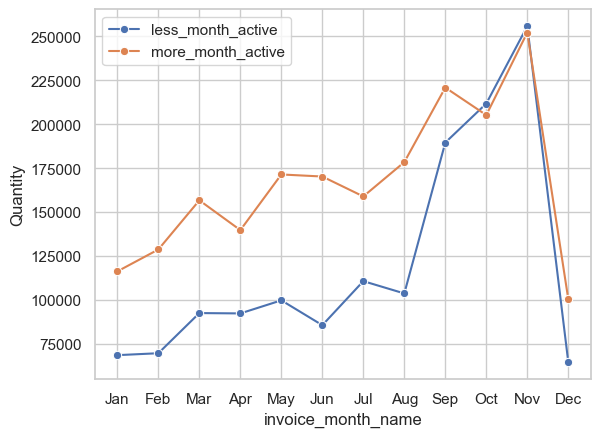

In [339]:
cut_avgup_lessmnth = mont1_active.groupby(['invoice_month_name','CustomerID'])['Quantity'].sum().reset_index()
cut_avgup_greatmnth = mont12_active.groupby(['invoice_month_name','CustomerID'])['Quantity'].sum().reset_index()
sns.lineplot(data = cut_avgup_lessmnth.groupby('invoice_month_name')['Quantity'].sum().reset_index(), x = 'invoice_month_name', y = 'Quantity', marker = 'o', label = 'less_month_active')
sns.lineplot(data = cut_avgup_greatmnth.groupby('invoice_month_name')['Quantity'].sum().reset_index(), x = 'invoice_month_name', y = 'Quantity', marker = 'o', label = 'more_month_active')
plt.legend()
plt.show()

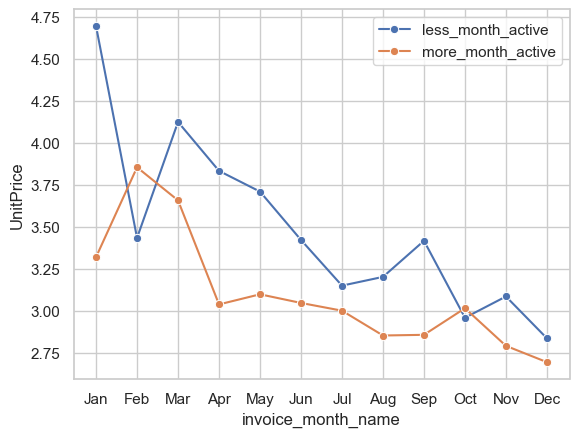

In [338]:
cut_avgup_lessmnth = mont1_active.groupby(['invoice_month_name','CustomerID'])['UnitPrice'].mean().reset_index()
cut_avgup_greatmnth = mont12_active.groupby(['invoice_month_name','CustomerID'])['UnitPrice'].mean().reset_index()
sns.lineplot(data = cut_avgup_lessmnth.groupby('invoice_month_name')['UnitPrice'].mean().reset_index(), x = 'invoice_month_name', y = 'UnitPrice', marker = 'o', label = 'less_month_active')
sns.lineplot(data = cut_avgup_greatmnth.groupby('invoice_month_name')['UnitPrice'].mean().reset_index(), x = 'invoice_month_name', y = 'UnitPrice', marker = 'o', label = 'more_month_active')
plt.show()

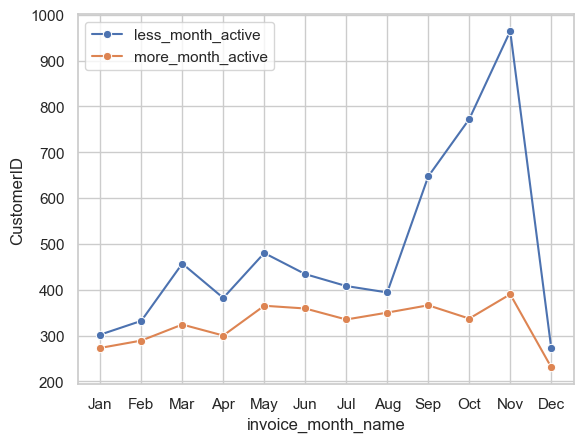

In [341]:
cut_avgup_lessmnth = mont1_active.groupby(['invoice_month_name'])['CustomerID'].nunique().reset_index()
cut_avgup_greatmnth = mont12_active.groupby(['invoice_month_name'])['CustomerID'].nunique().reset_index()
sns.lineplot(data = cut_avgup_lessmnth, x = 'invoice_month_name', y = 'CustomerID', marker = 'o', label = 'less_month_active')
sns.lineplot(data = cut_avgup_greatmnth, x = 'invoice_month_name', y = 'CustomerID', marker = 'o', label = 'more_month_active')
plt.show()

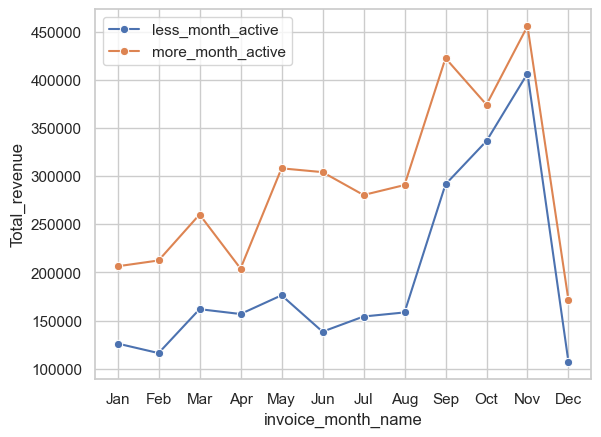

In [342]:
cut_avgup_lessmnth = mont1_active.groupby(['invoice_month_name'])['Total_revenue'].sum().reset_index()
cut_avgup_greatmnth = mont12_active.groupby(['invoice_month_name'])['Total_revenue'].sum().reset_index()
sns.lineplot(data = cut_avgup_lessmnth, x = 'invoice_month_name', y = 'Total_revenue', marker = 'o', label = 'less_month_active')
sns.lineplot(data = cut_avgup_greatmnth, x = 'invoice_month_name', y = 'Total_revenue', marker = 'o', label = 'more_month_active')
plt.show()

In [316]:
returns['invc_mnth'] = returns['InvoiceDate'].dt.month

In [317]:
uk_returns = returns[returns['Country'] == 'United Kingdom']

In [318]:
uk_returns['abs_qn'] = abs(uk_returns['Quantity'])
uk_returns.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  invc_mnth  \
141 2010-12-01 09:41:00      27.50    14527.00  United Kingdom         12   
154 2010-12-01 09:49:00       4.65    15311.00  United Kingdom         12   
235 2010-12-01 10:24:00       1.65    17548.00  United Kingdom         12   
236 2010-12-01 10:24:00       0.29    17548.00  United Kingdom         12   
237 2010-12-01 10:24:00       0.29    17548.00  United Kingdom         12   

     abs_qn  
141       1  
154       1  
235      12  
236      24  
237      24

<Axes: xlabel='invc_mnth', ylabel='abs_qn'>

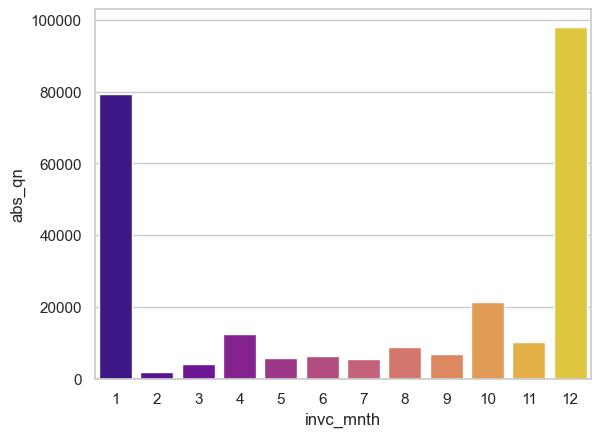

In [319]:
sns.barplot(uk_returns.groupby('invc_mnth')['abs_qn'].sum().sort_values(ascending = False).reset_index(), y = 'abs_qn', x = 'invc_mnth', palette = 'plasma')

<Axes: xlabel='abs_qn', ylabel='Description'>

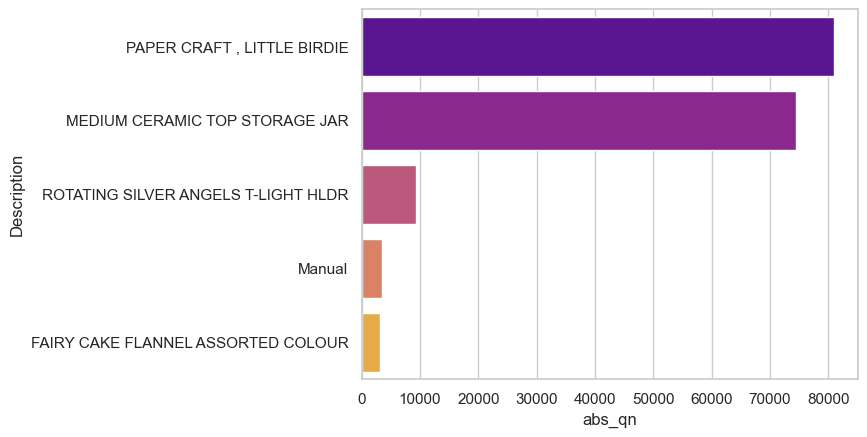

In [320]:
sns.barplot(uk_returns.groupby('Description')['abs_qn'].sum().sort_values(ascending = False).reset_index().head(), x = 'abs_qn', y = 'Description', palette = 'plasma')

In [321]:
uk.head()

InvoiceNo StockCode                Description  Quantity  \
0     539993     22386    JUMBO BAG PINK POLKADOT        10   
1     539993     21499         BLUE POLKADOT WRAP        25   
2     539993     21498        RED RETROSPOT WRAP         25   
3     539993     22379   RECYCLING BAG RETROSPOT          5   
4     539993     20718  RED RETROSPOT SHOPPER BAG        10   

          InvoiceDate  UnitPrice CustomerID         Country  invoice_mnth  \
0 2011-01-04 10:00:00       1.95    13313.0  United Kingdom             1   
1 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
2 2011-01-04 10:00:00       0.42    13313.0  United Kingdom             1   
3 2011-01-04 10:00:00       2.10    13313.0  United Kingdom             1   
4 2011-01-04 10:00:00       1.25    13313.0  United Kingdom             1   

  invoicedayweek  Total_revenue InvoiceIdentity  Year Quantity_group  \
0        Tuesday          19.50  Normal_Product  2011           5–10   
1        Tuesday          10.50  Normal_Product  2011          10–50   
2        Tuesday          10.50  Normal_Product  2011          10–50   
3        Tuesday          10.50  Normal_Product  2011            1–5   
4        Tuesday          12.50  Normal_Product  2011           5–10   

  UniPrice_group TotalRevenue_group invoice_month_name InvoiceMonth  \
0            1–5              10–50                Jan      2011-01   
1             ≤1              10–50                Jan      2011-01   
2             ≤1              10–50                Jan      2011-01   
3            1–5              10–50                Jan      2011-01   
4            1–5              10–50                Jan      2011-01   

  classify_customer                  Country_Segment     price_behavior  \
0    True Champions  United Kingdom - True Champions  Price-Insensitive   
1    True Champions  United Kingdom - True Champions    Demand Driven ↑   
2    True Champions  United Kingdom - True Champions    Demand Driven ↑   
3    True Champions  United Kingdom - True Champions  Price-Sensitive ↓   
4    True Champions  United Kingdom - True Champions  Price-Sensitive ↓   

         Date  
0  2011-01-04  
1  2011-01-04  
2  2011-01-04  
3  2011-01-04  
4  2011-01-04

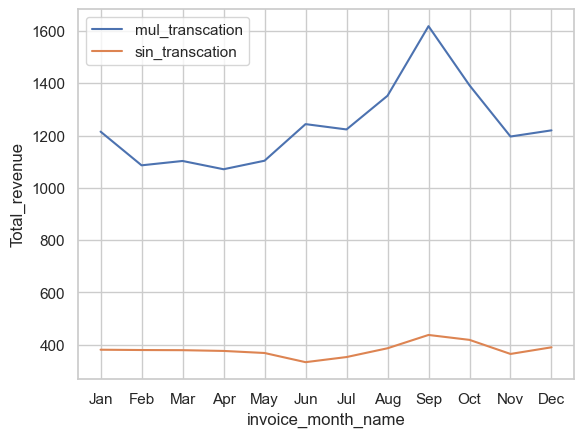

In [322]:
sns.lineplot(data = trs_mul_cnt.groupby('invoice_month_name')['Total_revenue'].mean().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', label = 'mul_transcation')
sns.lineplot(data = trs_sin_cnt.groupby('invoice_month_name')['Total_revenue'].mean().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', label = 'sin_transcation')
plt.legend()
plt.show()

========================================================================================================================================================

In [ ]:
premium_countries

In [ ]:
og[~(og['Country'] == 'United KIngdom')].groupby('Country').agg({'CustomerID':'nunique', 'Total_revenue':'sum'}).reset_index().sort_values(by = 'Total_revenue', ascending = False).head(10)

In [ ]:
product_customer_count(og, 'Germany')

In [ ]:
germany = og[og['Country'] == 'Germany']
r = germany[germany['invoice_month_name'] == 'May'].groupby('CustomerID')['UnitPrice'].mean().reset_index()
s = germany[germany['invoice_month_name'] == 'May'].groupby('CustomerID')['Quantity'].mean().reset_index()
sns.histplot(r['UnitPrice'])
plt.show()
sns.histplot(s['Quantity'])
plt.show()

In [ ]:
country_overall('Germany')

In [ ]:
month_analysis('Germany')

In [ ]:
rr_ger = ret_rate(og, 'Germany')

In [ ]:
ger_cc = rr_ger['customer_cycle']
ger_cc.head()

In [ ]:
active_month_data = ger_cc
active_customers = germany[germany['CustomerID'].isin(
    ger_cc[ger_cc['active_month'] < 6]['CustomerID'].unique().tolist()
)]

monthly_cust = active_customers.groupby('invoice_month_name')['CustomerID'].nunique().reset_index()
monthly_rev = active_customers.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=active_month_data, x='active_month', ax=axs[0])
axs[0].set_title('Customer Count by Active Month')

sns.barplot(data=monthly_cust, x='invoice_month_name', y='CustomerID', ax=axs[1])
axs[1].set_title('Monthly Active Customers (active_month < 6)')
axs[1].set_ylabel('Unique Customers')

sns.barplot(data=monthly_rev, x='invoice_month_name', y='Total_revenue', ax=axs[2])
axs[2].set_title('Monthly Revenue (active_month < 6)')
axs[2].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [ ]:
active_month_data = ger_cc
active_customers = germany[germany['CustomerID'].isin(
    ger_cc[ger_cc['active_month'] > 6]['CustomerID'].unique().tolist()
)]

monthly_cust = active_customers.groupby('invoice_month_name')['CustomerID'].nunique().reset_index()
monthly_rev = active_customers.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=active_month_data, x='active_month', ax=axs[0])
axs[0].set_title('Customer Count by Active Month')

sns.barplot(data=monthly_cust, x='invoice_month_name', y='CustomerID', ax=axs[1])
axs[1].set_title('Monthly Active Customers (active_month > 6)')
axs[1].set_ylabel('Unique Customers')

sns.barplot(data=monthly_rev, x='invoice_month_name', y='Total_revenue', ax=axs[2])
axs[2].set_title('Monthly Revenue (active_month > 6)')
axs[2].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [ ]:
less6_mnth = ger_cc[ger_cc['active_month'] < 6]['CustomerID'].unique().tolist()
great6_mnth = ger_cc[ger_cc['active_month'] >= 6]['CustomerID'].unique().tolist()

In [ ]:
compring_less_not(og, less6_mnth)

In [ ]:
compring_less_not(og, great6_mnth)

In [ ]:
active_month(og[og['CustomerID'].isin(less6_mnth)], 'Less than 6 active')

In [ ]:
active_month(og[og['CustomerID'].isin(great6_mnth)], 'Grest than 6 active')

In [ ]:
gercmnt = common_vs_notcommon(og, 'Germany')

In [ ]:
cm_not_rev = gercmnt['month_rev_df']
cm_not_rev.head()

In [ ]:
sns.lineplot(data = cm_not_rev, x = 'Month', y = 'Common_Revenue', marker = 'o', label = 'common')
sns.lineplot(data = cm_not_rev, x = 'Month', y = 'Not_Common_Revenue', marker = 'o', label = 'not_common')
plt.legend()
plt.show()

In [ ]:
sns.lineplot(data = cm_not_rev, x = 'Month', y = 'Common_Customers', marker = 'o', label = 'common')
sns.lineplot(data = cm_not_rev, x = 'Month', y = 'Not_Common_Customers', marker = 'o', label = 'not_common')
plt.legend()
plt.show()

In [ ]:
germany.columns

In [ ]:
unit_qn_analysis = []

mn_data = df[df['Country'] == 'Germany']

for month in range(2, 13):  # Feb to Dec
    prev_cust = set(germany[germany['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
    curr_cust = set(germany[germany['invoice_mnth'] == month]['CustomerID'].unique())
    
    common_cust = curr_cust.intersection(prev_cust)
    not_common_cust = curr_cust - prev_cust
    
    curr_data = germany[germany['invoice_mnth'] == month]

    # Common customer revenue by price behavior
    common_data = curr_data[curr_data['CustomerID'].isin(common_cust)]
    common_qn = common_data.groupby('price_behavior')['Total_revenue'].sum().reset_index()
    common_qn['Customer_Type'] = 'Common'
    common_qn['Month'] = month

    # Not common customer revenue by price behavior
    not_common_data = curr_data[curr_data['CustomerID'].isin(not_common_cust)]
    not_common_qn = not_common_data.groupby('price_behavior')['Total_revenue'].sum().reset_index()
    not_common_qn['Customer_Type'] = 'Not Common'
    not_common_qn['Month'] = month

    # Combine both
    unit_qn_analysis.extend(pd.concat([common_qn, not_common_qn], ignore_index=True).to_dict('records'))

# Final dataframe
unit_qn_df = pd.DataFrame(unit_qn_analysis)

# Optional: Reorder columns
unit_qn_df = unit_qn_df[['Month', 'price_behavior', 'Customer_Type', 'Total_revenue']]


In [ ]:
unit_qn_df.head()

In [ ]:
sns.barplot(data = unit_qn_df[unit_qn_df['Customer_Type'] == 'Common'], x = 'Month', y = 'Total_revenue', hue = 'price_behavior')
plt.show()

In [ ]:
sns.barplot(data = unit_qn_df[unit_qn_df['Customer_Type'] == 'Not Common'], x = 'Month', y = 'Total_revenue', hue = 'price_behavior')
plt.show()

In [ ]:
unit_qn_analysis = []
    
mn_data = df[df['Country'] == 'Germany']
for month in range(2, 13):  # from Feb to Dec
    prev_cust = set(germany[germany['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
    curr_cust = set(germany[germany['invoice_mnth'] == month]['CustomerID'].unique())
    
    common_cust = curr_cust.intersection(prev_cust)
    not_common_cust = curr_cust - prev_cust
    
    curr_data = germany[germany['invoice_mnth'] == month]

    common_qn = curr_data[curr_data['CustomerID'].isin(common_cust)].groupby('price_behavior')['Total_revenue'].sum().reset_index()
    not_common_qn = curr_data[curr_data['CustomerID'].isin(not_common_cust)].groupby('price_behavior')['Total_revenue'].sum().reset_index()
        
    unit_qn_analysis.append({
        'Month': month,
        'Avg_qn_Common': common_qn,
        'Avg_qn_NotCommon': not_common_qn
    })
    
unit_qn_df = pd.DataFrame(unit_qn_analysis)

In [ ]:
unit_qn_df.head()

In [ ]:
unit_qn_analysis = []
    
mn_data = df[df['Country'] == 'Germany']
for month in range(2, 13):  # from Feb to Dec
    prev_cust = set(mn_data[mn_data['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
    curr_cust = set(mn_data[mn_data['invoice_mnth'] == month]['CustomerID'].unique())
    
    common_cust = curr_cust.intersection(prev_cust)
    not_common_cust = curr_cust - prev_cust
    
    curr_data = mn_data[mn_data['invoice_mnth'] == month]

    common_qn = curr_data[curr_data['CustomerID'].isin(common_cust)].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    not_common_qn = curr_data[curr_data['CustomerID'].isin(not_common_cust)].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
        
    unit_qn_analysis.append({
        'Month': month,
        'Avg_qn_Common': common_qn['InvoiceNo'].sum(),
        'Avg_qn_NotCommon': not_common_qn['InvoiceNo'].sum()
    })
    
unit_qn_df = pd.DataFrame(unit_qn_analysis)

In [ ]:
sns.lineplot(data = unit_qn_df, x = 'Month', y = 'Avg_qn_Common', label = 'avg_qn_cmm')
sns.lineplot(data = unit_qn_df, x = 'Month', y = 'Avg_qn_NotCommon', label = 'Avg_qn_NotCommon')
plt.show()

In [ ]:
def commonvsnot_avg(df, country, metric, x):
    unit_price_analysis = []
    
    mn_data = df[df['Country'] == country]
    for month in range(2, 13):  # from Feb to Dec
        prev_cust = set(mn_data[mn_data['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
        curr_cust = set(mn_data[mn_data['invoice_mnth'] == month]['CustomerID'].unique())
    
        common_cust = curr_cust.intersection(prev_cust)
        not_common_cust = curr_cust - prev_cust
    
        curr_data = mn_data[mn_data['invoice_mnth'] == month]

        if 'mean' == x:
            common_unit_price = curr_data[curr_data['CustomerID'].isin(common_cust)].groupby('CustomerID')[metric].mean().reset_index()
            not_common_unit_price = curr_data[curr_data['CustomerID'].isin(not_common_cust)].groupby('CustomerID')[metric].mean().reset_index()
        else:
            common_unit_price = curr_data[curr_data['CustomerID'].isin(common_cust)][metric].sum()
            not_common_unit_price = curr_data[curr_data['CustomerID'].isin(not_common_cust)][metric].sum()
            
        unit_price_analysis.append({
            'Month': month,
            'Avg_UnitPrice_Common': common_unit_price[metric].mean(),
            'Avg_UnitPrice_NotCommon': not_common_unit_price[metric].mean()
        })
    
    unit_price_df = pd.DataFrame(unit_price_analysis)
    return unit_price_df

In [ ]:
comnot_ger_up = commonvsnot_avg(og, 'Germany', 'UnitPrice', 'mean')
comnot_ger_qn = commonvsnot_avg(og, 'Germany', 'Quantity', 'mean')

In [ ]:
sns.lineplot(data = comnot_ger_qn, x = 'Month', y = 'Avg_UnitPrice_Common', label = 'Avg_UnitPrice_Common')
sns.lineplot(data = comnot_ger_qn, x = 'Month', y = 'Avg_UnitPrice_NotCommon', label = 'Avg_UnitPrice_NotCommon')
plt.legend()
plt.show()

In [ ]:
sns.lineplot(data = comnot_ger_up, x = 'Month', y = 'Avg_UnitPrice_Common', label = 'Avg_UnitPrice_Common')
sns.lineplot(data = comnot_ger_up, x = 'Month', y = 'Avg_UnitPrice_NotCommon', label = 'Avg_UnitPrice_NotCommon')
plt.legend()
plt.show()

In [ ]:
oct_desc = set(germany[germany['invoice_mnth'] == 10]['Description'].unique())
nov_desc = set(germany[germany['invoice_mnth'] == 11]['Description'].unique())

common_desc = oct_desc & nov_desc

oct_data = germany[(germany['invoice_mnth'] == 10) & (germany['Description'].isin(common_desc))]
nov_data = germany[(germany['invoice_mnth'] == 11) & (germany['Description'].isin(common_desc))]

oct_summary = oct_data.groupby('Description').agg({
    'UnitPrice': ['nunique', 'min', 'max'],
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

nov_summary = nov_data.groupby('Description').agg({
    'UnitPrice': ['nunique', 'min', 'max'],
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

final_df = pd.merge(oct_summary, nov_summary, on='Description', how='inner', suffixes=('_oct', '_nov'))

final_df

In [ ]:
final_df.columns = ['Description','up_nunique_oct', 'up_min_oct', 'up_max_oct', 'tot_revenue_oct', 'tot_qun_oct',
                   'up_nunique_nov', 'up_min_nov', 'up_max_nov', 'tot_revenue_nov', 'tot_qun_nov']

final_df.head()

In [ ]:
curr = set(germany[germany['invoice_mnth'] == 11]['CustomerID'].unique().tolist())  # November
prev = set(germany[germany['invoice_mnth'] == 10]['CustomerID'].unique().tolist())  # October

nov_cm = curr.intersection(prev)

nov = curr - prev

new_cus = germany[germany['invoice_month_name'] == 'Nov']
com_cus = new_cus[new_cus['CustomerID'].isin(nov_cm)]
not_new = new_cus[new_cus['CustomerID'].isin(nov)]

# Repeat customers (common in Oct & Nov)
print(len(com_cus.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().query('InvoiceNo > 1')), 'repeat customers with >1 purchase')
print(len(com_cus.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().query('InvoiceNo == 1')), 'repeat customers with 1 purchase')
print()

# New customers (only in Nov)
print(len(not_new.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().query('InvoiceNo > 1')), 'new customers with >1 purchase')
print(len(not_new.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().query('InvoiceNo == 1')), 'new customers with 1 purchase')

In [ ]:
ret_rate(og, 'Germany')['retention_rate']

In [ ]:
x = og[og['Country'] == 'Germany'].groupby(['invoice_month_name', 'Description'])['UnitPrice'].nunique().reset_index().query('UnitPrice > 1')
sns.barplot(data = x.groupby('invoice_month_name')['Description'].nunique().reset_index(), x = 'invoice_month_name', y = 'Description')
plt.show()

In [ ]:
x = og[og['Country'] == 'Germany'].groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice > 1')
sns.barplot(data = x.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')

In [ ]:
germany = og[og['Country'] == 'Germany']

In [ ]:
y = germany[germany['Description'].isin(x['Description'].unique().tolist())]
up = y.groupby('Description').agg({'UnitPrice' : ['min', 'max']}).reset_index()
up.columns = ['Description', 'up_min', 'up_max']
sns.lineplot(data = germany[(germany['Description'].isin(up['Description'].unique().tolist())) & (germany['UnitPrice'].isin(up['up_max'].unique().tolist()))].groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.grid()
plt.show()

In [ ]:
sns.lineplot(data = germany[(germany['Description'].isin(up['Description'].unique().tolist())) & (germany['UnitPrice'].isin(up['up_min'].unique().tolist()))].groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', label = 'min')

In [ ]:
germany.head()

In [ ]:
# Step 1: Filter products of interest
y = germany[germany['Description'].isin(x['Description'].unique().tolist())]

# Step 2: Get min and max UnitPrice per Description
up = y.groupby('Description')['UnitPrice'].agg(['min', 'max']).reset_index()
up.columns = ['Description', 'up_min', 'up_max']

# Step 3: Merge min and max prices into main data
z = pd.merge(y, up, on='Description', how='left')

# Step 4: Filter for min price rows
min_price_data = z[z['UnitPrice'] == z['up_min']]
min_revenue = min_price_data.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()

# Step 5: Filter for max price rows
max_price_data = z[z['UnitPrice'] == z['up_max']]
max_revenue = max_price_data.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()

# Step 6: Plot both
sns.lineplot(data=min_revenue, x='invoice_month_name', y='Total_revenue', label='min')
sns.lineplot(data=max_revenue, x='invoice_month_name', y='Total_revenue', label='max')
plt.legend()
plt.show()


In [ ]:
y = germany[germany['Description'].isin(x['Description'].unique().tolist())]
up = y.groupby('Description').agg({'UnitPrice' : ['min', 'max']}).reset_index()
up.columns = ['Description', 'up_min', 'up_max']
sns.lineplot(data = germany[(germany['Description'].isin(up['Description'].unique().tolist())) & (germany['UnitPrice'].isin(up['up_min'].unique().tolist()))].groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', label = 'min')
sns.lineplot(data = germany[(germany['Description'].isin(up['Description'].unique().tolist())) & (germany['UnitPrice'].isin(up['up_max'].unique().tolist()))].groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.grid()
plt.legend()
plt.show()

In [ ]:
desc_data = og[og['Country'] == 'Germany'].groupby('Description').agg({
    'UnitPrice': 'nunique',
    'Total_revenue': 'sum'
}).reset_index()

sns.scatterplot(data=desc_data, x='UnitPrice', y='Total_revenue')
plt.title('Germany: Price Variation vs Revenue')


In [ ]:
ger_pa = price_analysis('Germany')

In [ ]:
ger_pa.head()

In [ ]:
ger_pa['price_behavior'] = ger_pa.apply(classify_price_behavior, axis = 1)

In [ ]:
sg_pr = ger_pa[(ger_pa['revenue_p_value'] < 0.05) & (ger_pa['quantity_p_value'] < 0.05)]

In [ ]:
ger_pa['price_behavior'].value_counts()

In [ ]:
germany = pd.merge(germany, ger_pa, left_on = 'Description', right_on = 'description', how = 'left')
germany.drop(columns = 'description', inplace = True)

In [ ]:
sns.barplot(data = germany[germany['Description'].isin(sg_pr['description'].unique().tolist())].groupby(['invoice_month_name', 'price_behavior'])['Quantity'].sum().reset_index(), x = 'invoice_month_name', y = 'Quantity', hue = 'price_behavior')

In [ ]:
cohort(germany)

In [ ]:
curr = set(germany[germany['invoice_mnth'] == 5]['CustomerID'].unique())
prev = set(germany[germany['invoice_mnth'] == 4]['CustomerID'].unique())

common = curr & prev
curronly = curr - prev

curr_data = germany[(germany['invoice_mnth'] == 5) & (germany['CustomerID'].isin(curronly))]
common_data = germany[(germany['invoice_mnth'] == 5) & (germany['CustomerID'].isin(common))]

cust_basket_curr = curr_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'InvoiceNo': pd.Series.nunique
}).reset_index()
cust_basket_curr['avg_basket_size'] = cust_basket_curr['Quantity'] / cust_basket_curr['InvoiceNo']
avg_basket_size_per_customer_curr = cust_basket_curr['avg_basket_size'].mean()

cust_basket_common = common_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'InvoiceNo': pd.Series.nunique
}).reset_index()
cust_basket_common['avg_basket_size'] = cust_basket_common['Quantity'] / cust_basket_common['InvoiceNo']
avg_basket_size_per_customer_common = cust_basket_common['avg_basket_size'].mean()

In [ ]:
sns.barplot(data = germany[germany['Description'].isin(germany.groupby('Description')['UnitPrice'].nunique().reset_index().query('UnitPrice > 1')['Description'].tolist())].groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.show()
sns.barplot(data = germany[germany['Description'].isin(germany.groupby('Description')['UnitPrice'].nunique().reset_index().query('UnitPrice == 1')['Description'].tolist())].groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.show()

In [ ]:
cust_basket_curr

=============================================================================================================================================

In [ ]:
france = og[og['Country'] == 'France']
product_customer_count(france, 'France')

In [ ]:
month_analysis('France')

In [ ]:
country_overall('France')

In [ ]:
grp = france.groupby('invoice_month_name').agg({'Total_revenue':'sum', 'CustomerID':'nunique'}).reset_index()
grp['pct'] = grp['Total_revenue'] / grp['CustomerID']
sns.lineplot(data = grp, x = 'invoice_month_name', y = 'pct')
plt.show()

In [ ]:
og.columns

In [ ]:
fr_retention = ret_rate(france, 'France')

In [ ]:
fr_retention['retention_rate']

In [ ]:
fr_cc = fr_retention['customer_cycle']

active_month_data = fr_cc
active_customers = france[france['CustomerID'].isin(
    fr_cc[fr_cc['active_month'] < 6]['CustomerID'].unique().tolist()
)]

monthly_cust = active_customers.groupby('invoice_month_name')['CustomerID'].nunique().reset_index()
monthly_rev = active_customers.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=active_month_data, x='active_month', ax=axs[0])
axs[0].set_title('Customer Count by Active Month')

sns.barplot(data=monthly_cust, x='invoice_month_name', y='CustomerID', ax=axs[1])
axs[1].set_title('Monthly Active Customers (active_month < 6)')
axs[1].set_ylabel('Unique Customers')

sns.barplot(data=monthly_rev, x='invoice_month_name', y='Total_revenue', ax=axs[2])
axs[2].set_title('Monthly Revenue (active_month < 6)')
axs[2].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [ ]:
fr_cc = fr_retention['customer_cycle']

active_month_data = fr_cc
active_customers = france[france['CustomerID'].isin(
    fr_cc[fr_cc['active_month'] >= 6]['CustomerID'].unique().tolist()
)]

monthly_cust = active_customers.groupby('invoice_month_name')['CustomerID'].nunique().reset_index()
monthly_rev = active_customers.groupby('invoice_month_name')['Total_revenue'].sum().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=active_month_data, x='active_month', ax=axs[0])
axs[0].set_title('Customer Count by Active Month')

sns.barplot(data=monthly_cust, x='invoice_month_name', y='CustomerID', ax=axs[1])
axs[1].set_title('Monthly Active Customers (active_month < 6)')
axs[1].set_ylabel('Unique Customers')

sns.barplot(data=monthly_rev, x='invoice_month_name', y='Total_revenue', ax=axs[2])
axs[2].set_title('Monthly Revenue (active_month < 6)')
axs[2].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [ ]:
fr_cmnt = common_vs_notcommon(og, 'France')
fr_cm_nt = fr_cmnt['month_rev_df']


In [ ]:
sns.lineplot(data = fr_cm_nt, x = 'Month', y = 'Common_Customers', label = 'Common_Customers')
sns.lineplot(data = fr_cm_nt, x = 'Month', y = 'Not_Common_Customers', label = 'Not_Common_Customers')
plt.legend()
plt.show()

In [ ]:
sns.lineplot(data = fr_cm_nt, x = 'Month', y = 'Common_Revenue', label = 'Common_Customers')
sns.lineplot(data = fr_cm_nt, x = 'Month', y = 'Not_Common_Revenue', label = 'Not_Common_Customers')
plt.legend()
plt.show()

In [ ]:
common_data = []
not_common_data = []

mn_data = df[df['Country'] == country]

for month in range(2, 13):  # From Feb to Dec
    prev_data = mn_data[mn_data['invoice_mnth'] == (month - 1)]
    curr_data = mn_data[mn_data['invoice_mnth'] == month]

    prev_cust = set(prev_data['CustomerID'].unique())
    curr_cust = set(curr_data['CustomerID'].unique())

    common_cust = curr_cust & prev_cust
    not_common_cust = curr_cust - prev_cust

    curr_des_common = set(curr_data[curr_data['CustomerID'].isin(common_cust)]['Description'].unique())
    prev_des_common = set(prev_data[prev_data['CustomerID'].isin(common_cust)]['Description'].unique())
    comm_des_common = curr_des_common & prev_des_common

    retained_common = len(comm_des_common) / len(prev_des_common) if len(prev_des_common) > 0 else None

    common_data.append({
        'Month': month,
        'Total_Descriptions_PrevMonth': len(prev_des_common),
        'Retained_Descriptions': len(comm_des_common),
        'Retention_Rate': retained_common
    })

    curr_des_not = set(curr_data[curr_data['CustomerID'].isin(not_common_cust)]['Description'].unique())
    prev_des_not = set(prev_data[prev_data['CustomerID'].isin(not_common_cust)]['Description'].unique())
    comm_des_not = curr_des_not & prev_des_not

    retained_not = len(comm_des_not) / len(prev_des_not) if len(prev_des_not) > 0 else None

    not_common_data.append({
        'Month': month,
        'Total_Descriptions_PrevMonth': len(prev_des_not),
        'Retained_Descriptions': len(comm_des_not),
        'Retention_Rate': retained_not
    })

common_retention_df = pd.DataFrame(common_data)
not_common_retention_df = pd.DataFrame(not_common_data)


In [ ]:
def commonvsnot_avg_updated(df, country, metric):
    unit_price_analysis = []
    
    mn_data = df[df['Country'] == country]
    for month in range(2, 13):  # from Feb to Dec
        prev_cust = set(mn_data[mn_data['invoice_mnth'] == (month - 1)]['CustomerID'].unique())
        curr_cust = set(mn_data[mn_data['invoice_mnth'] == month]['CustomerID'].unique())
    
        common_cust = curr_cust.intersection(prev_cust)
        not_common_cust = curr_cust - prev_cust
    
        curr_data = mn_data[mn_data['invoice_mnth'] == month]

        common_unit_price = curr_data[curr_data['CustomerID'].isin(common_cust)][metric].mean()
        not_common_unit_price = curr_data[curr_data['CustomerID'].isin(not_common_cust)][metric].mean()
        
            
        unit_price_analysis.append({
            'Month': month,
            'Avg_UnitPrice_Common': common_unit_price,
            'Avg_UnitPrice_NotCommon': not_common_unit_price
        })
    
    unit_price_df = pd.DataFrame(unit_price_analysis)
    return unit_price_df

In [ ]:
up = commonvsnot_avg_updated(france, 'France', 'UnitPrice')
qn = commonvsnot_avg_updated(france, 'France', 'Quantity')
tr = commonvsnot_avg_updated(france, 'France', 'Total_revenue')

sns.lineplot(data = up, x = 'Month', y = 'Avg_UnitPrice_Common', label = 'Avg_UnitPrice_Common')
sns.lineplot(data = up, x = 'Month', y = 'Avg_UnitPrice_NotCommon', label = 'Avg_UnitPrice_NotCommon')
plt.ylabel('unitprice')
plt.xlabel('months')
plt.title('common vs notcommon unitprice')
plt.show()

sns.lineplot(data = qn, x = 'Month', y = 'Avg_UnitPrice_Common', label = 'Avg_quantity_Common')
sns.lineplot(data = qn, x = 'Month', y = 'Avg_UnitPrice_NotCommon', label = 'Avg_quantity_NotCommon')
plt.ylabel('quantity')
plt.xlabel('months')
plt.title('common vs notcommon quantity')
plt.show()

sns.lineplot(data = tr, x = 'Month', y = 'Avg_UnitPrice_Common', label = 'Avg_revenue_Common')
sns.lineplot(data = tr, x = 'Month', y = 'Avg_UnitPrice_NotCommon', label = 'Avg_revenue_NotCommon')
plt.ylabel('revenue')
plt.xlabel('months')
plt.title('common vs notcommon revenue')
plt.show()

In [ ]:
prev = set(france[france['invoice_mnth'] == 8]['Description'].unique())
curr = set(france[france['invoice_mnth'] == 9]['Description'].unique())

common_desc = curr & prev
not_common = curr - prev

prev = france[(france['invoice_mnth'] == 8) & (france['Description'].isin(common_desc))]
curr = france[(france['invoice_mnth'] == 9) & (france['Description'].isin(common_desc))]

currnot = france[(france['invoice_mnth'] == 9) & (france['Description'].isin(not_common))]


pre_summary = prev.groupby('Description').agg({
    'UnitPrice': ['nunique', 'min', 'max'],
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

curr_summary = curr.groupby('Description').agg({
    'UnitPrice': ['nunique', 'min', 'max'],
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

final_df = pd.merge(oct_summary, nov_summary, on='Description', how='inner', suffixes=('_oct', '_nov'))

final_df

len(currnot), len(curr)

In [ ]:
cohort(france)

In [ ]:
mul_grp = france.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice > 1')
sns.barplot(data = mul_grp.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.title('multiple price revenue')
plt.show()

sns.barplot(data = mul_grp.groupby('invoice_month_name')['Description'].nunique().reset_index(), x = 'invoice_month_name', y = 'Description')
plt.title('multiple price unique products')
plt.show()

sns.lineplot(data = mul_grp.groupby('invoice_month_name')['UnitPrice'].median().reset_index(), x='invoice_month_name', y='UnitPrice', marker='o', label='multiple Unit Price mode')
plt.title('Most Common Unique Unit Prices (Mode)')
plt.show()

In [ ]:
grp = france.groupby(['invoice_month_name', 'Description']).agg({'UnitPrice':'nunique', 'Total_revenue':'sum'}).reset_index().query('UnitPrice == 1')
sns.barplot(data = grp.groupby('invoice_month_name')['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue')
plt.title('single price revenue')
plt.show()
sns.barplot(data = grp.groupby('invoice_month_name')['Description'].nunique().reset_index(), x = 'invoice_month_name', y = 'Description')
plt.title('single price unique products')
plt.show()
sns.lineplot(data = grp.groupby('invoice_month_name')['UnitPrice'].median().reset_index(), 
             x = 'invoice_month_name', y = 'UnitPrice', marker = 'o', label = 'single Unit Price avg')
plt.show()

In [ ]:
oct_desc = set(france[france['invoice_mnth'] == 8]['Description'].unique())
nov_desc = set(france[france['invoice_mnth'] == 9]['Description'].unique())

common_desc = oct_desc & nov_desc
not_common_des = oct_desc - nov_desc

oct_data = france[(france['invoice_mnth'] == 8) & (france['Description'].isin(common_desc))]
nov_data = france[(france['invoice_mnth'] == 9) & (france['Description'].isin(common_desc))]

oct_summary = oct_data.groupby('Description').agg({
    'UnitPrice': ['nunique', 'min', 'max'],
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

nov_summary = nov_data.groupby('Description').agg({
    'UnitPrice': ['nunique', 'min', 'max'],
    'Total_revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

final_df = pd.merge(oct_summary, nov_summary, on='Description', how='inner', suffixes=('_oct', '_nov'))
final_df.head()

In [ ]:
final_df.columns = ['Descrption', 'prev_nuni', 'prev_minup', 'prev_maxup', 'prev_tr', 'prev_qn',
                   'curr_nuni', 'curr_minup', 'curr_maxup', 'curr_tr', 'curr_qn']

In [ ]:
final_df.head()

In [ ]:
final_df[final_df['prev_nuni'] == 2]

In [ ]:
results = []

for month in range(2, 13):
    curr_df = france[france['invoice_mnth'] == month]
    prev_df = france[france['invoice_mnth'] == month - 1]

    curr_desc = set(curr_df['Description'].unique())
    prev_desc = set(prev_df['Description'].unique())

    common_desc = curr_desc & prev_desc
    not_common_desc = curr_desc - prev_desc

    curr_common_df = curr_df[curr_df['Description'].isin(common_desc)]
    curr_not_common_df = curr_df[curr_df['Description'].isin(not_common_desc)]

    results.append({
        'month': month,
        'common_desc_cnt': curr_common_df['Description'].nunique(),
        'not_common_desc_cnt': curr_not_common_df['Description'].nunique(),
        'common_desc_tr': curr_common_df['Total_revenue'].sum(),
        'not_common_desc_tr': curr_not_common_df['Total_revenue'].sum()
    })

result_df = pd.DataFrame(results)


In [ ]:
result_df['better_type'] = result_df.apply(
    lambda row: 'common' if row['common_desc_tr'] > row['not_common_desc_tr'] else 'not_common', axis=1
)
result_df

In [ ]:
fr_seasonal = seasonal_product_fast(og, 'France')

In [ ]:
fr_seasonal.keys()

In [ ]:
pr_analysis_fr = price_analysis('France')

In [ ]:
pr_analysis_fr['price_behavior'] = pr_analysis_fr.apply(classify_price_behavior, axis = 1)

In [ ]:
pr_analysis_fr['price_behavior'].value_counts()

In [ ]:
pr_analysis_fr[(pr_analysis_fr['revenue_p_value'] > 0.5) & (pr_analysis_fr['quantity_p_value'] > 0.5)]['price_behavior'].value_counts()

In [ ]:
pr_analysis_fr.head()

In [ ]:
france = pd.merge(france, pr_analysis_fr, left_on = 'Description', right_on = 'description')
france.drop(columns = 'description', inplace = True)

In [ ]:
france.head()

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data = france.groupby(['invoice_month_name', 'Description'])['price_behavior'].value_counts().reset_index(), x = 'invoice_month_name', y = 'count', hue = 'price_behavior', errorbar = None)
plt.show()

In [ ]:
sns.barplot(data = france.groupby(['invoice_month_name', 'Description'])['price_behavior'].value_counts().reset_index(), x = 'invoice_month_name', y = 'count', hue = 'price_behavior', errorbar = None)

In [ ]:
sns.barplot(data = france.groupby(['invoice_month_name', 'price_behavior'])['Total_revenue'].sum().reset_index(), x = 'invoice_month_name', y = 'Total_revenue', hue = 'price_behavior', palette = 'spring')

In [ ]:
france.head()

In [ ]:
og.head()

In [ ]:
import pandas as pd
import numpy as np

def get_rfm_features_enhanced(df):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df[df['Quantity'] > 0].copy()
    
    df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
    df['InvoiceDay'] = df['InvoiceDate'].dt.date
    df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
    
    snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

    # RFM base
    rfm = df.groupby(['CustomerID', 'Country']).agg(
        Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
        Frequency=('InvoiceNo', 'nunique'),
        Monetary=('TotalRevenue', 'sum'),
        ActiveMonths=('InvoiceMonth', 'nunique'),
        FirstPurchase=('InvoiceDate', 'min')
    ).reset_index()
    
    # Extra: % Contribution
    tot = rfm['Monetary'].sum()
    rfm['PCT contribution'] = (rfm['Monetary'] / tot) * 100
    
    # Customer Age (in months)
    rfm['CustomerAge_months'] = (snapshot_date - rfm['FirstPurchase']).dt.days // 30

    # Recency Bucket
    rfm['RecencyBucket'] = rfm['Recency'].apply(lambda x: 1 if x <= 30 else 0)

    # RFM + A scores
    rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=[5, 4, 3, 2, 1], duplicates='drop').astype(int)
    rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
    rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
    rfm['A_Score'] = pd.qcut(rfm['ActiveMonths'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)

    # Classification
    def classify_customer_refined(row):
        if (row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4 and row['A_Score'] >= 4):
            return 'True Champions'
        elif (row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3):
            return 'Loyal Customers'
        elif row['R_Score'] <= 2 and (row['F_Score'] >= 3 or row['M_Score'] >= 3):
            return 'At-Risk Customers'
        else:
            return 'Needs Attention'
    
    rfm['classify_customer'] = rfm.apply(classify_customer_refined, axis=1)

    # Product Variety
    product_variety = df.groupby('CustomerID')['Description'].nunique().reset_index()
    product_variety.columns = ['CustomerID', 'ProductVariety']

    # Returns (if negative quantities exist)
    returns = df[df['Quantity'] < 0].groupby('CustomerID')['Quantity'].count().reset_index()
    returns.columns = ['CustomerID', 'Returns']
    total_orders = df[df['Quantity'] > 0].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    total_orders.columns = ['CustomerID', 'TotalOrders']
    returns_ratio = pd.merge(total_orders, returns, on='CustomerID', how='left').fillna(0)
    returns_ratio['ReturnRate'] = returns_ratio['Returns'] / returns_ratio['TotalOrders']
    returns_ratio = returns_ratio[['CustomerID', 'ReturnRate']]

    # Revenue Trend (last month vs previous)
    df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
    monthly_revenue = df.groupby(['CustomerID', 'InvoiceMonth'])['TotalRevenue'].sum().reset_index()
    monthly_revenue['RevenueDiff'] = monthly_revenue.groupby('CustomerID')['TotalRevenue'].diff()
    latest_trend = monthly_revenue.sort_values(['CustomerID', 'InvoiceMonth']).groupby('CustomerID').tail(1)
    latest_trend = latest_trend[['CustomerID', 'RevenueDiff']].fillna(0)

    # Engagement: DaysActive + IntervalStd
    daily = df.groupby(['CustomerID', 'InvoiceDay']).size().reset_index()
    daily_count = daily.groupby('CustomerID')['InvoiceDay'].nunique().reset_index()
    daily_count.columns = ['CustomerID', 'DaysActive']

    invoice_dates = df.sort_values(['CustomerID', 'InvoiceDate']).groupby('CustomerID')['InvoiceDate'].apply(list)
    def calc_variance(dates):
        if len(dates) < 2: return 0
        intervals = [(dates[i] - dates[i-1]).days for i in range(1, len(dates))]
        return np.std(intervals)
    interval_std = invoice_dates.apply(calc_variance).reset_index()
    interval_std.columns = ['CustomerID', 'IntervalStd']

    # Merge all features
    final = rfm.merge(product_variety, on='CustomerID', how='left')
    final = final.merge(returns_ratio, on='CustomerID', how='left')
    final = final.merge(latest_trend, on='CustomerID', how='left')
    final = final.merge(daily_count, on='CustomerID', how='left')
    final = final.merge(interval_std, on='CustomerID', how='left')

    # Clean
    final.fillna(0, inplace=True)

    return final


In [ ]:
ml_data = get_rfm_features_enhanced(data_sales)

In [ ]:
ml_data.head()

In [ ]:
data_sales.head()

In [ ]:
data_sales.groupby('invoice_mnth')['CustomerID'].nunique().reset_index()['CustomerID'].sum()

In [ ]:
plt.figure(figsize = (12,4))
sns.barplot(data = data_sales.groupby('customerid_obj')['Total_revenue'].sum().reset_index().sort_values(by = 'Total_revenue', ascending = False).head(10), x = 'customerid_obj', y = 'Total_revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
country_demand = (
    data_sales[data_sales['Country'] != 'United Kingdom']
    .groupby('Country')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)

# Plot
plt.figure(figsize=(14, 8))  # Tall enough to fit all countries
sns.barplot(data=country_demand, y='Country', x='Quantity', palette='Greens_r')

plt.title('Product Demand by Country (excluding UK)', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
data_sales['customerid_obj'] = data_sales['CustomerID'].astype(str)